## ❓ Perguntas e Respostas

---

### 2.a. Qual filme você recomendaria para uma pessoa que você não conhece?

Como não conheço a pessoa nem seus gostos, eu indicar filmes que tenham **notas altas no IMDb** e um **ROI mais equilibrado**, porque isso aumenta as chances de o filme ter qualidade e agradar. Diretores como **Christopher Nolan** costumam manter um padrão de avaliações bem alto, enquanto **Steven Spielberg** consegue unir boa recepção do público com retorno financeiro forte. Já nos gêneros, **Mystery** e **Western** apareceram com as maiores notas médias, então acabam sendo apostas seguras para recomendar de forma geral. No fim, recomendaría obras desses diretores ou desses gêneros, já que unem qualidade, boa aceitação do público e potencial de agradar mesmo sem conhecer seu gosto.

---

### 2.b. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

O estudo mostrou que alguns fatores ajudam a prever se um filme vai ter um faturamento maior:

* **Orçamento**: filmes com mais dinheiro geralmente arrecadam mais, mas produções de baixo custo também podem surpreender.
* **Diretor**: certos diretores, como Spielberg e Clint Eastwood, têm ROI consistente e vários sucessos garantidos.
* **Franquia**: filmes que fazem parte de franquias costumam ter resumos mais detalhados, universos complexos e personagens recorrentes, o que atrai mais público.
* **Gênero**: mesmo que a diferença entre gêneros não seja estatisticamente significativa, filmes de **Família** tiveram retornos médios mais altos e estáveis.

Ou seja, além do dinheiro investido, a escolha do diretor e se o filme é parte de uma franquia ou original também influenciam bastante no desempenho financeiro, embora sempre exista algum risco.

**Se eu tivesse que fazer uma recomendação para um investidor, seria:** Priorize **diretores experientes**, prefira **franquias** ou continuações, mantenha o **orçamento equilibrado** e foque em **filmes de Família** para aumentar a chance de retorno financeiro estável.

---

### 2.c. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

Insights da Coluna Overview

Os resumos dos filmes (Overview) trazem informações valiosas sobre o gênero e o conteúdo da obra:

Cada gênero apresenta vocabulário característico:

- **Ação/Aventura/Animação**: combates, missões, exploração.
- **Drama/Crime/Terror**: relações humanas, conflitos, tensão.
- **Comédia**: situações leves, humor e romance.
- **Biografia**: narrativas de vida e conquistas pessoais.

Inicialmente usamos o modelo TF-IDF + LinearSVC que não superou a baseline de acurácia, mas ao realizar o teste de permutação (p=0,005), ele nos mostrou que há sinais estatisticamente significativos, ou seja, os resumos contêm informação relevante sobre o gênero.

Palavras-chave como *fight*, *mission* e *army* aumentam a probabilidade de um filme ser de ação, enquanto *woman*, *mysterious* e *investigate* reduzem essa chance.

Diferenças sutis entre franquias e originais: resumos de franquias tendem a reforçar enredos épicos e universos complexos, enquanto originais exploram experiências mais pessoais e sociais.

Apesar de as Overviews serem muitas vezes genéricas, combiná-las com técnicas avançadas de NLP (como BERT ou embeddings pré-treinados) e dados estruturados (duração, número de votos, ROI) pode aumentar a precisão na classificação de gênero e na análise de sucesso do filme.

---

O estudo indica que, para maximizar qualidade percebida e retorno financeiro, é estratégico considerar **diretor, gênero, orçamento e franquia**. Os resumos fornecem pistas valiosas sobre o gênero, mas sua análise isolada tem limitações. Modelos de machine learning integrando texto e dados estruturados, como **Random Forest com variáveis selecionadas pela EDA**, se mostraram eficazes para predizer notas no IMDb, oferecendo uma base sólida para decisões de produção e recomendação de filmes.

---

### 3.1. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê?

Para prever a nota do IMDb dos filmes, estamos lidando com um **problema de regressão**, já que o alvo é contínuo, ou seja, queremos estimar o valor numérico da nota de cada filme. O objetivo do modelo é prever a nota usando apenas informações que estariam disponíveis **antes do lançamento**, evitando dados do futuro que poderiam distorcer o aprendizado (problema de *data leakage*).

No pré-processamento, removemos variáveis que poderiam atrapalhar a predição. Por exemplo, **Gross**, **ROI** e **Production Budget** foram excluídos porque são informações financeiras só conhecidas depois que o filme é lançado. Incluir esses dados faria o modelo aprender padrões impossíveis de prever antes do lançamento, resultando em predições irreais. Outras variáveis removidas foram **Overview** e **overview\_clean** (textos completos do resumo), **Series\_Title** e **Released\_Year**, que não ajudavam diretamente na previsão.

Criamos a variável **overview\_len**, que mede o tamanho do resumo do filme. Essa transformação gera um número que indica indiretamente quão detalhado é o roteiro, fornecendo informação útil sem precisar trabalhar com texto bruto, o que exigiria processamento mais complexo de NLP. Para lidar com valores extremos, aplicamos uma transformação logarítmica (*log(1+x)*) e depois escalonamento.

As variáveis numéricas (**Runtime, Meta\_score, No\_of\_Votes e overview\_len**) foram escalonadas, e No\_of\_Votes e overview\_len também receberam log-transformação para reduzir o impacto de valores muito altos. As variáveis categóricas (**Certificate** e **Main\_Genre**) foram transformadas em **One-Hot Encoding**, enquanto **Director** recebeu **Target Encoding**, usando a média das notas do IMDb por diretor.

A variável **is\_franchise**, uma variável externa obtida do TMDb, indica se o filme faz parte de uma franquia ou é original. Transformamos **True/False em 1/0**, tornando-a numérica e pronta para o modelo. Ela pode ajudar a capturar efeitos indiretos, como maior popularidade ou expectativa do público, mas não é decisiva sozinha, funciona como uma variável auxiliar.

No começo, incluímos os atores principais (**Star1-4**) usando Target Encoding, acreditando que atores renomados poderiam influenciar a nota. Porém, ao treinar modelos como **Random Forest, SVM e Decision Tree**, percebemos que isso causava **overfitting**: o modelo aprendia padrões específicos dos atores do conjunto de treino, mas não funcionava bem com novos filmes. Por isso, removemos essas variáveis, focando em informações que realmente ajudam a prever de forma consistente.

Para selecionar as variáveis mais importantes, combinamos três métodos: análise exploratória (EDA), Feature Importance via árvore de decisão e Information Value (IV). As variáveis que mais se destacaram e foram consistentes entre os métodos foram **Runtime, No\_of\_Votes, Meta\_score, Main\_Genre e Director**. Variáveis adicionais como **Certificate, overview\_len e is\_franchise** foram mantidas por poderem melhorar ainda mais a performance do modelo.

| Variável          | EDA | Feature Importances | IV |
| ----------------- | --- | ------------------- | -- |
| **Runtime**       | X   | X                   | X  |
| **No\_of\_Votes** | X   | X                   | X  |
| **Meta\_score**   | X   | X                   | X  |
| **Main\_Genre**   | X   | X                   | X  |
| **Director**      | X   | X                   | X  |
| **is\_franchise** | X   | X                   |    |
| **Certificate**   | X   |                     |    |
| **overview\_len** |     | X                   | X  |

---

### 3.2. Qual tipo de problema estamos resolvendo (regressão, classificação)?

Estamos lidando agora com um problema de **regressão** porque nosso alvo (`y`) é uma variável contínua, a nota do IMDb, e não categorias discretas. Diferente de um problema de classificação, onde preveríamos rótulos como “bom/ruim” ou “alta/baixa nota”, aqui queremos **estimar valores numéricos exatos**, justificando o uso de métricas e modelos específicos para regressão.

---

### 3.3. Qual modelo melhor se aproxima dos dados e quais seus prós e contras?

Testamos quatro modelos de regressão: Random Forest Regressor, SVM (SVR), Ridge Regression e Decision Tree Regressor. O Random Forest se destacou, explicando cerca de 67–72% da variação das notas (R² ~0.729) e mantendo consistência entre os folds da validação cruzada. Este modelo é robusto a outliers, captura relações não lineares e interações complexas, além de fornecer métricas de importância das variáveis. Limitações incluem menor interpretabilidade, necessidade de ajuste de hiperparâmetros, maior tempo de treino e dificuldade em extrapolar valores fora do padrão observado.

| Aspecto            | Prós                                                      | Contras                                                     |
| ------------------ | --------------------------------------------------------- | ----------------------------------------------------------- |
| Acurácia           | Captura relações complexas e não lineares entre variáveis |                                                             |
| Robustez           | Resistente a outliers e ruídos nos dados                  |                                                             |
| Interpretabilidade | Permite avaliar importância das variáveis                 | Difícil de interpretar individualmente (caixa-preta)        |
| Overfitting        | Menor risco que uma árvore única                          |                                                             |
| Desempenho         |                                                           | Treinamento e previsão mais lentos                          |
| Hiperparâmetros    |                                                           | Necessita ajuste de parâmetros para performance ótima       |
| Extrapolação       |                                                           | Não lida bem com valores fora do padrão observado no treino |

---

### 3.4. Qual medida de performance do modelo foi escolhida e por quê?

Para medir performance, utilizamos várias métricas complementares:

- **R²**: mede a proporção da variação da nota do IMDb explicada pelo modelo, mostrando o poder explicativo global.
- **RMSE (Root Mean Squared Error)**: penaliza mais os erros grandes, dando ênfase a previsões muito distantes do valor real.
- **MAE (Mean Absolute Error)**: indica o erro médio absoluto, oferecendo uma medida mais intuitiva do desvio médio das previsões sem exagerar nos outliers.
- **MAPE (Mean Absolute Percentage Error)**: fornece o erro em termos percentuais, útil para comparar a precisão relativa das previsões em diferentes escalas.

A combinação dessas métricas garante que o modelo não apenas explique bem a variação das notas, mas também apresente previsões precisas tanto em termos absolutos quanto relativos. A Random Forest, combinada com a seleção de variáveis via EDA, oferece alto poder explicativo, baixo risco de overfitting e segurança contra data leakage, tornando-se a escolha ideal para prever a nota do IMDb.

| Método de seleção          | R²    | RMSE  | MAE   | MAPE  | Observação/Comentário                                                                            |
| -------------------------- | ----- | ----- | ----- | ----- | ------------------------------------------------------------------------------------------------ |
| **EDA**                    | 0.729 | 0.134 | 0.097 | 1.21% | Resultados obtidos com as variáveis selecionadas via EDA                                         |
| **Feature Importances**    | 0.728 | 0.134 | 0.099 | 1.23% | Desempenho próximo ao da EDA, variáveis importantes do modelo foram usadas                       |
| **IV (Information Value)** | 0.724 | 0.135 | 0.099 | 1.23% | Bom desempenho, quase igual ao da EDA, variáveis escolhidas via IV se mostraram muito relevantes |
| **Melhor resultado**       | 0.729 | 0.134 | 0.097 | 1.21% | Até agora, melhor resultado obtido com EDA  

---

### 4. Supondo um filme com as seguintes características:

{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}


    Qual seria a nota do IMDB?


Para estimar a nota do IMDb desse filme, começamos aplicando **todas as transformações que definimos no nosso modelo**. Isso inclui:

* Transformar a duração (**Runtime**) em número inteiro,
* Criar a variável **overview\_len** a partir do tamanho do resumo (**Overview**) e aplicar log-transformação + escalonamento,
* Escalonar as variáveis numéricas (**Meta\_score, No\_of\_Votes**),
* Transformar variáveis categóricas (**Certificate, Genre** → Main\_Genre, Director) usando One-Hot Encoding ou Target Encoding,
* Adicionar e transformar a variável booleana **is\_franchise** em 0/1,
Em resumoi, foi necessário garantir que todas as variáveis estão no mesmo formato que o modelo espera.

Depois de preparar o filme dessa forma e passá-lo pelo nosso **modelo Random Forest**, ele retornou uma previsão de **nota IMDb igual a 8.7**.

Isso significa que, segundo nosso modelo, **“The Shawshank Redemption” teria uma avaliação muito alta**, alinhada com sua reputação clássica. A previsão leva em conta o diretor, a nota do Meta\_score, o número de votos, o tamanho do resumo e outros fatores que o modelo aprendeu a associar a boas avaliações, sem precisar olhar para dados financeiros ou qualquer informação pós-lançamento.

In [14]:
# pip install thefuzz

In [15]:
# pip install nltk

In [16]:
# pip install spacy

In [17]:
# pip install wordcloud

In [18]:
# pip install category_encoders

In [19]:
# Bibliotecas padrão
import pandas as pd
import numpy as np
import re

# Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Biblioteca para correspondência de strings
from thefuzz import process

# Biblioteca para requisições HTTP
import requests

# Biliotecas estatísticas
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import levene
from scipy.stats import spearmanr
from scipy.stats import ttest_ind

# Bibliotecas de machine learning
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import NMF
from sklearn.svm import LinearSVC
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import permutation_test_score
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.model_selection import GridSearchCV


# Bibliotecas de NLP
import nltk, spacy
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

Vamos fazer a leitura do dataframe

In [20]:
df = pd.read_csv('desafio_indicium_imdb.csv')

In [21]:
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


Iremos adicionar uma variavel externa, a nossa base de dados, sabendo que o Gross (faturamento de bilheteria) por si só pode ser enganoso, pois um filme que arrecada 200 milhões pode até parecer que foi um sucesso, mas se ele custou 180 milhões para ser produzido e ainda teve mais 50 milhões de marketing, o retorno real foi baixo. Já um filme que custou apenas 5 milhões e faturou 50 milhões tem um ROI (Return on Investment) muito mais atrativo.

Mas pq usaremos o ROI?

O ROI na nossa análise será indicadores muito importante, pois conecta custo e retorno, o que acaba permitindo avaliar não apenas o sucesso de bilheteria, mas também a eficiência financeira da produção.


Esse indicador nos permitirá responder perguntas como:

* Quais gêneros trazem maior retorno proporcional?

* Filmes com baixo orçamento são sempre mais rentáveis?

* Blockbusters de alto custo realmente compensam?

Esses dados externos foram encontrados no site The Numbers, onde deixarei o link abaixo:

https://www.the-numbers.com/movie/budgets/all/6701

In [22]:
df1 = pd.read_csv('Box_Office.csv', encoding='latin1')

In [23]:
df1.head()

,Unnamed: 0,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
0,1,16-Dec-15,Star Wars Ep. VII: The Force Awakens,"Ê$533,200,000","Ê$936,662,225","Ê$2,056,046,835"
1,2,23-Apr-19,Avengers: Endgame,"Ê$400,000,000","Ê$858,373,000","Ê$2,717,503,922"
2,3,9-Dec-22,Avatar: The Way of Water,"Ê$400,000,000","Ê$684,075,767","Ê$2,320,250,281"
3,4,17-May-25,Mission: ImpossibleÑThe Final Reckoning,"Ê$400,000,000","Ê$197,413,515","Ê$597,843,604"
4,5,20-May-11,Pirates of the Caribbean: On Stranger Tides,"Ê$379,000,000","Ê$241,071,802","Ê$1,045,713,802"


Como podemos ver no nosso dataframe do orçamento dos filmes, os dados vieram em formato de texto, contendo símbolos como "$", vírgulas ",", e alguns caracteres estranhos resultantes da extração dos dados.
Esses símbolos atrapalham os cálculos, pois impedem a conversão direta para valores numéricos.

Logo iremos transforma a coluna Production Budget de texto sujo em valores numéricos prontos para análise.

# 1 - Análise exploratória dos dados

## 1.1 - Tratamento inicial dos dados e adição de variáveis externas

In [24]:
df_budget = df1[["Movie", "Production Budget"]].copy()

# remover símbolos indesejados (como Ê, $, vírgulas)
df_budget["Production Budget"] = (
    df_budget["Production Budget"]
    .astype(str)
    .str.replace(r"[^\d]", "", regex=True)  # mantém só dígitos
    .astype(int)  # converte para inteiro
)

In [25]:
df_budget.head()

,Movie,Production Budget
0,Star Wars Ep. VII: The Force Awakens,533200000
1,Avengers: Endgame,400000000
2,Avatar: The Way of Water,400000000
3,Mission: ImpossibleÑThe Final Reckoning,400000000
4,Pirates of the Caribbean: On Stranger Tides,379000000


Nos primeiros testes, ao tentar fazer o merge apenas pelos nomes dos filmes, percebi que mais de 50% da coluna Budget ficou sem valores preenchidos. Isso aconteceu porque os nomes apresentavam pequenas diferenças de formatação ou escrita (por exemplo: “Star Wars: Episode VII” e “Star Wars Ep. VII”). Para resolver esse problema, optei por aplicar o fuzzy matching, uma técnica que aumenta a chance de correspondência entre textos semelhantes, garantindo que os orçamentos fossem atribuídos corretamente mesmo quando os títulos não coincidiam exatamente.

In [26]:
# df -> dataset principal (com bilheteria)
# df_budget -> dataset de orçamentos já tratado com colunas renomeadas

# Criamos um dicionário com correspondências fuzzy
def fuzzy_match_budget(movie_name, choices, threshold=90):
    """
    Faz fuzzy matching entre o nome do filme e os disponíveis no dataset de orçamento.
    Retorna o nome mais parecido se a similaridade for maior que o threshold.
    """
    match, score = process.extractOne(movie_name, choices)
    if score >= threshold:
        return match
    return None

In [27]:
# Lista de nomes de filmes do dataset de orçamento
budget_movies = df_budget["Movie"].tolist()

# Criaremos uma nova coluna com o nome encontrado via fuzzy matching
df["Matched_Movie"] = df["Series_Title"].apply(
    lambda x: fuzzy_match_budget(x, budget_movies, threshold=85)  # Usaremos um threshold que só aceita a 
                                                                  # correspondência se a similaridade for maior que 85%.
)

In [28]:
df_final = df.merge(
    df_budget.drop_duplicates(subset="Movie"),  # removerá possíveis duplicatas no budget
    left_on="Matched_Movie",
    right_on="Movie",
    how="left",
    suffixes=("_BoxOffice", "_Budget")
)

Iremos em busca de uma visão geral dos dados, para entendermos a quantidade de linhas e colunas, os tipos de dados (int, float, object), e se há valores faltantes.

In [29]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         999 non-null    int64  
 1   Series_Title       999 non-null    object 
 2   Released_Year      999 non-null    object 
 3   Certificate        898 non-null    object 
 4   Runtime            999 non-null    object 
 5   Genre              999 non-null    object 
 6   IMDB_Rating        999 non-null    float64
 7   Overview           999 non-null    object 
 8   Meta_score         842 non-null    float64
 9   Director           999 non-null    object 
 10  Star1              999 non-null    object 
 11  Star2              999 non-null    object 
 12  Star3              999 non-null    object 
 13  Star4              999 non-null    object 
 14  No_of_Votes        999 non-null    int64  
 15  Gross              830 non-null    object 
 16  Matched_Movie      929 non

A variável "Released_Year" precisa ser transformada em Datetime

In [30]:
df_final[df_final['Released_Year'] == 'PG']

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Matched_Movie,Movie,Production Budget
965,966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933",Apollo 13,Apollo 13,65000000.0


Identificamos um filme com ano de lançamento incompatível, embora tenha sido lançado em 1995, consta como PG. Como se trata de um caso isolado no nosso dataframe, vamos corrigir manualmente. Se fossem vários casos, criaríamos um código para fazer essa alteração automaticamente.


In [31]:
df_final.loc[df_final['Released_Year'] == 'PG', 'Released_Year'] = 1995

Agora, iremos transformar a variável para o formato Datetime

In [32]:
df_final['Released_Year'] = pd.to_datetime(df_final['Released_Year'], format='%Y')

In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         999 non-null    int64         
 1   Series_Title       999 non-null    object        
 2   Released_Year      999 non-null    datetime64[ns]
 3   Certificate        898 non-null    object        
 4   Runtime            999 non-null    object        
 5   Genre              999 non-null    object        
 6   IMDB_Rating        999 non-null    float64       
 7   Overview           999 non-null    object        
 8   Meta_score         842 non-null    float64       
 9   Director           999 non-null    object        
 10  Star1              999 non-null    object        
 11  Star2              999 non-null    object        
 12  Star3              999 non-null    object        
 13  Star4              999 non-null    object        
 14  No_of_Vote

É melhor removermos as colunas Unnamed: 0, Matched_Movie e Movie. Elas não trazem nenhuma informação útil para a nossa análise, servindo apenas como dados internos ou duplicados. As removendo, o nosso conjunto de dados ficará mais limpo e focado no que realmente interessa.

In [34]:
df_final = df_final.drop(columns=['Unnamed: 0', 'Matched_Movie', 'Movie'])

Para que possamos realizar cálculos com a variável Gross, que representa a bilheteria dos filmes, precisamos convertê-la de um tipo de texto (object) para um tipo numérico (int).

In [35]:
# Vamos remover as vírgulas
df_final['Gross'] = df_final['Gross'].str.replace(',', '', regex=False)

# Agora vamos converter a coluna para o tipo de dado int64.
df_final['Gross'] = df_final['Gross'].astype('Int64')

Para garantir que a duração dos filmes possa ser usada em nossas análises, precisamos convertê-la para um tipo de dado inteiro (int). Podemos fazer isso de forma semelhante a como tratamos os valores da bilheteria.

In [36]:
df_final['Runtime'] = df_final['Runtime'].str.replace(' min', '').astype(int)

Agora vamos calcular o ROI de cada filme, ou seja, quanto cada produção rendeu em relação ao que foi gasto. Isso ajuda a ver quais filmes realmente deram retorno, não só olhando para a bilheteria bruta.

In [37]:
# Calculo do ROI
df_final["ROI"] = (df_final["Gross"] - df_final["Production Budget"]) / df_final["Production Budget"]

Agora com o ROI pronto, vamos adicionar uma nova variável externa para enriquecer nossa análise, que será uma variável binária para filmes de franquias, que indica se o filme faz parte de uma franquia (1) ou se é original (0). Isso é útil porque sequências e franquias costumam ter menos risco, já que contam com uma base de fãs, e suas receitas tendem a ser mais previsíveis. Além disso, o ROI médio pode variar entre filmes originais e de franquias, o que abre espaço para hipóteses interessantes, como investigar se filmes de franquias realmente apresentam um ROI maior do que os independentes.

Segue o passo a passo para extrair os dadosusando uma API:

1. Vá até o site The Movie Database (TMDb). https://www.themoviedb.org

2. Crie uma conta gratuita (se ainda não tiver).

3. Depois de logar, vá no menu do usuário (canto superior direito) → Configurações.

4. No menu lateral, clique em API.

5. Preencha o formulário básico.

6. Sua API Key (v3 auth) vai aparecer na tela. Essa é a chave que você usa nas requisições.

*Como não sei por quanto tempo a API ficará disponível, optei por baixar o CSV e carregá-lo. Dessa forma, quem for rodar o código evita possíveis erros de conexão. Logo abaixo deixo também o código que utilizei, caso queiram testar, junto irei enviar o CSV final que já inclui a nova variável booleana indicando se o filme pertence ou não a uma franquia.*

```python
# Local para introduzir a chave da API
API_KEY = # Aqui vai a chave da API do TMDb
BASE_URL = "https://api.themoviedb.org/3/search/movie"

def check_franchise(title, year):
    """Consulta o TMDb e retorna True se o filme pertence a uma coleção (franquia)."""
    params = {
        "api_key": API_KEY,
        "query": title,
        "year": year
    }
    response = requests.get(BASE_URL, params=params).json()
    
    if response.get("results"):
        movie_id = response["results"][0]["id"]
        
        # Buscar detalhes do filme
        details_url = f"https://api.themoviedb.org/3/movie/{movie_id}"
        details = requests.get(details_url, params={"api_key": API_KEY}).json()
        
        # Verifica se tem 'belongs_to_collection'
        return details.get("belongs_to_collection") is not None
    
    return False

# Criando a nova coluna
df_final["is_franchise"] = df_final.apply(lambda row: check_franchise(row["Series_Title"], row["Released_Year"]), axis=1)

# Estamos fazendo o download do csv
df_final.to_csv("filmes_com_franquia.csv", index=False)

In [38]:
df_final = pd.read_csv('filmes_com_franquia.csv')

## 1.2 - Visão geral dos dados

In [39]:
df_final.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Production Budget,ROI,is_franchise
0,The Godfather,1972-01-01,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,7000000.0,18.280916,True
1,The Dark Knight,2008-01-01,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,185000000.0,1.891127,True
2,The Godfather: Part II,1974-01-01,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,13000000.0,3.407692,True
3,12 Angry Men,1957-01-01,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,340000.0,11.823529,False
4,The Lord of the Rings: The Return of the King,2003-01-01,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,94000000.0,3.019637,True


In [40]:
# Visualizar o tamanho do dataframe
print(f"Entradas: {df_final.shape[0]}")
print(f"Colunas: {df_final.shape[1]}")

Entradas: 999
Colunas: 18


Iremos em busca de uma visão geral dos dados, para entendermos a quantidade de linhas e colunas, os tipos de dados (int, float, object), e se há valores faltantes.

In [41]:
# tipos de dados
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Series_Title       999 non-null    object 
 1   Released_Year      999 non-null    object 
 2   Certificate        898 non-null    object 
 3   Runtime            999 non-null    int64  
 4   Genre              999 non-null    object 
 5   IMDB_Rating        999 non-null    float64
 6   Overview           999 non-null    object 
 7   Meta_score         842 non-null    float64
 8   Director           999 non-null    object 
 9   Star1              999 non-null    object 
 10  Star2              999 non-null    object 
 11  Star3              999 non-null    object 
 12  Star4              999 non-null    object 
 13  No_of_Votes        999 non-null    int64  
 14  Gross              830 non-null    float64
 15  Production Budget  929 non-null    float64
 16  ROI                790 non

In [42]:
# Porcentagem de itens nulos
(df_final.isnull().sum()/df_final.shape[0] * 100).round(2)

Series_Title          0.00
Released_Year         0.00
Certificate          10.11
Runtime               0.00
Genre                 0.00
IMDB_Rating           0.00
Overview              0.00
Meta_score           15.72
Director              0.00
Star1                 0.00
Star2                 0.00
Star3                 0.00
Star4                 0.00
No_of_Votes           0.00
Gross                16.92
Production Budget     7.01
ROI                  20.92
is_franchise          0.00
dtype: float64

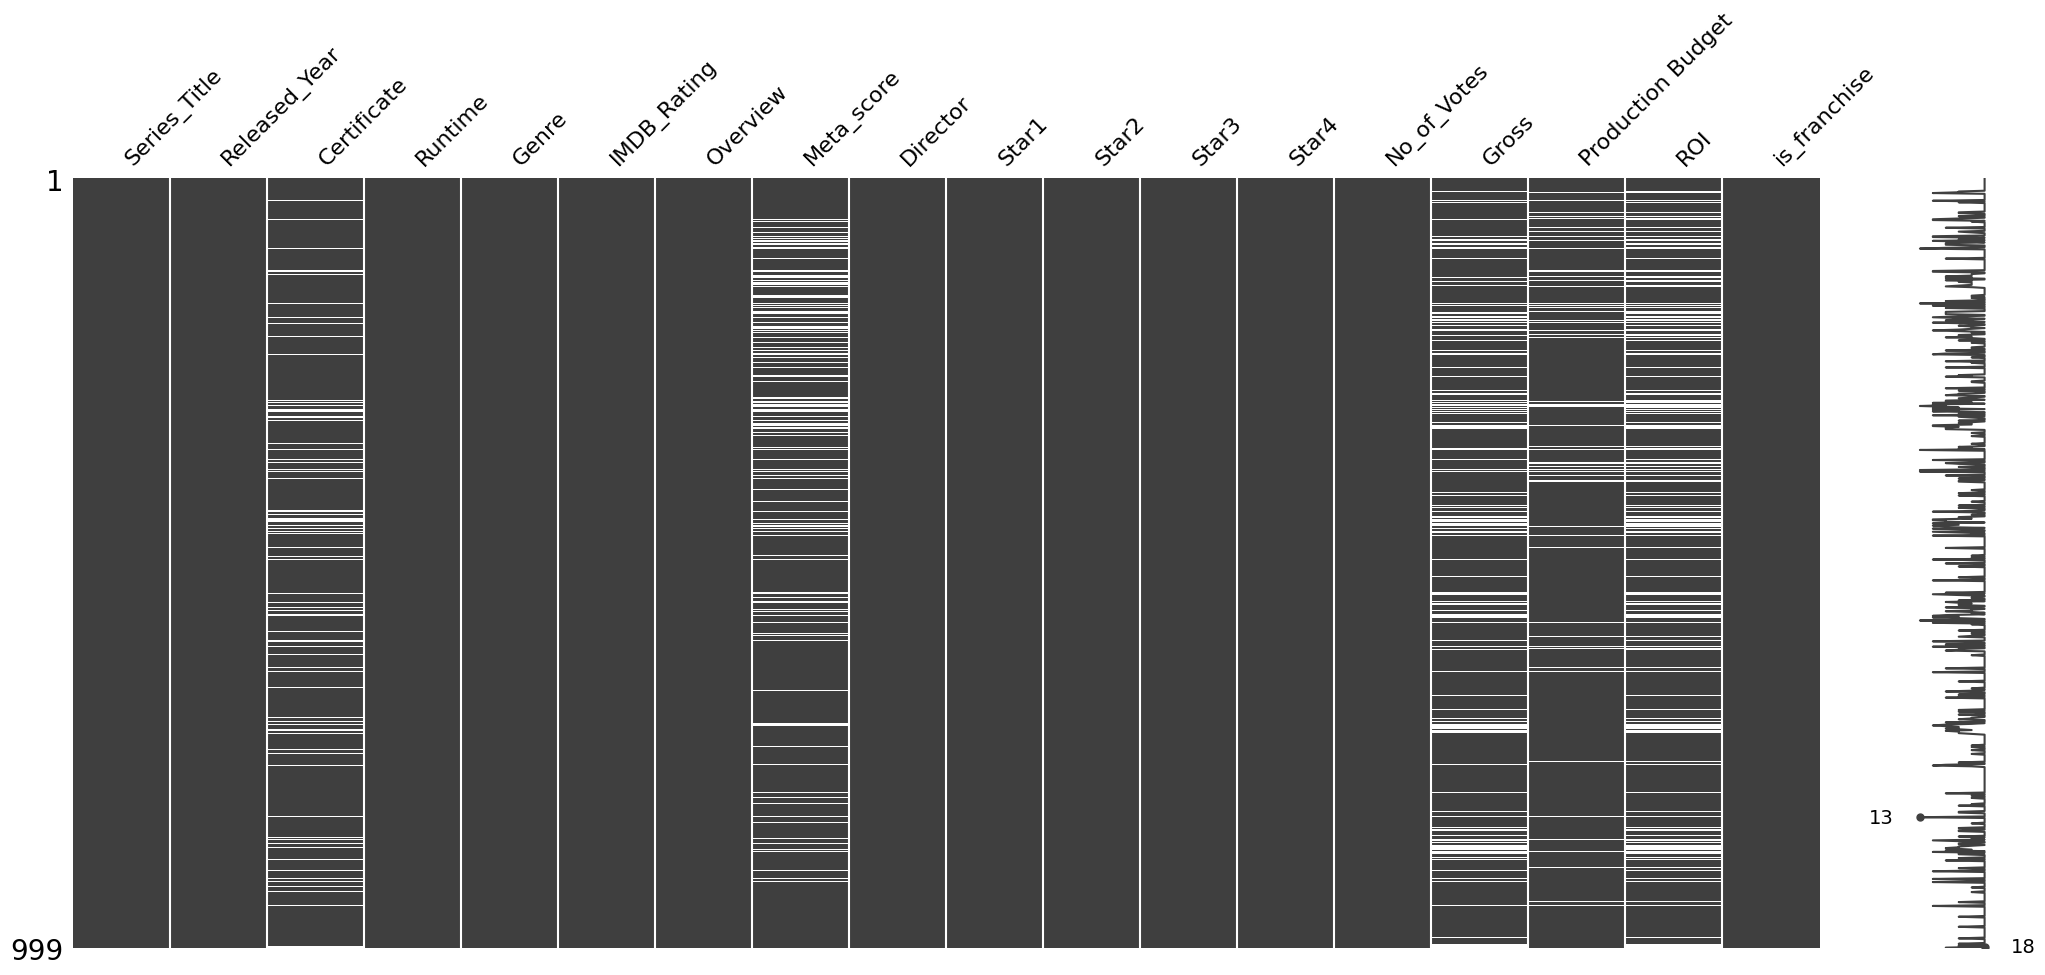

In [43]:
missingno.matrix(df_final);

A maioria das colunas está completa, o que é ótimo. No entanto, três delas têm uma quantidade considerável de dados faltando. A coluna Gross (Faturamento) é a que mais se destaca, com quase 17% dos dados ausentes. A de Meta_score também tem uma porcentagem alta, com 15,7% de valores faltantes. A coluna Certificate (Classificação etária) tem cerca de 10% de dados ausentes. Por fim, a variavel Production Budget com 7%.

Antes de qualquer análise mais detalhada, principalmente as que envolvem o desempenho financeiro ou as avaliações críticas dos filmes, será necessário tratar esses dados que estão faltando:

* Gross e Budget: essencial, remover linhas faltantes ou buscar dados externos.

* ROI: recalcular após preencher Gross/Budget.

* Meta_score: podemos preencher com a média ou a mediana, mas como nas análises posteriores identificamos muitos outliers, usaremos a mediana, por ser mais robusta a valores extremos.

* Certificate: iremos preencher com a moda.

* Outras colunas: as que não forem críticas, podemos deixar missing.

In [44]:
# Remover linhas sem Gross ou Budget
df_clean = df_final.dropna(subset=["Gross", "Production Budget"]).copy()

# Recalcular ROI
df_clean["ROI"] = df_clean["Gross"] / df_clean["Production Budget"]

# Preencher Meta_score com mediana
df_clean["Meta_score"].fillna(df_clean["Meta_score"].median(), inplace=True)

# Preencher Certificate com valor mais frequente
df_clean["Certificate"].fillna(df_clean["Certificate"].mode()[0], inplace=True)

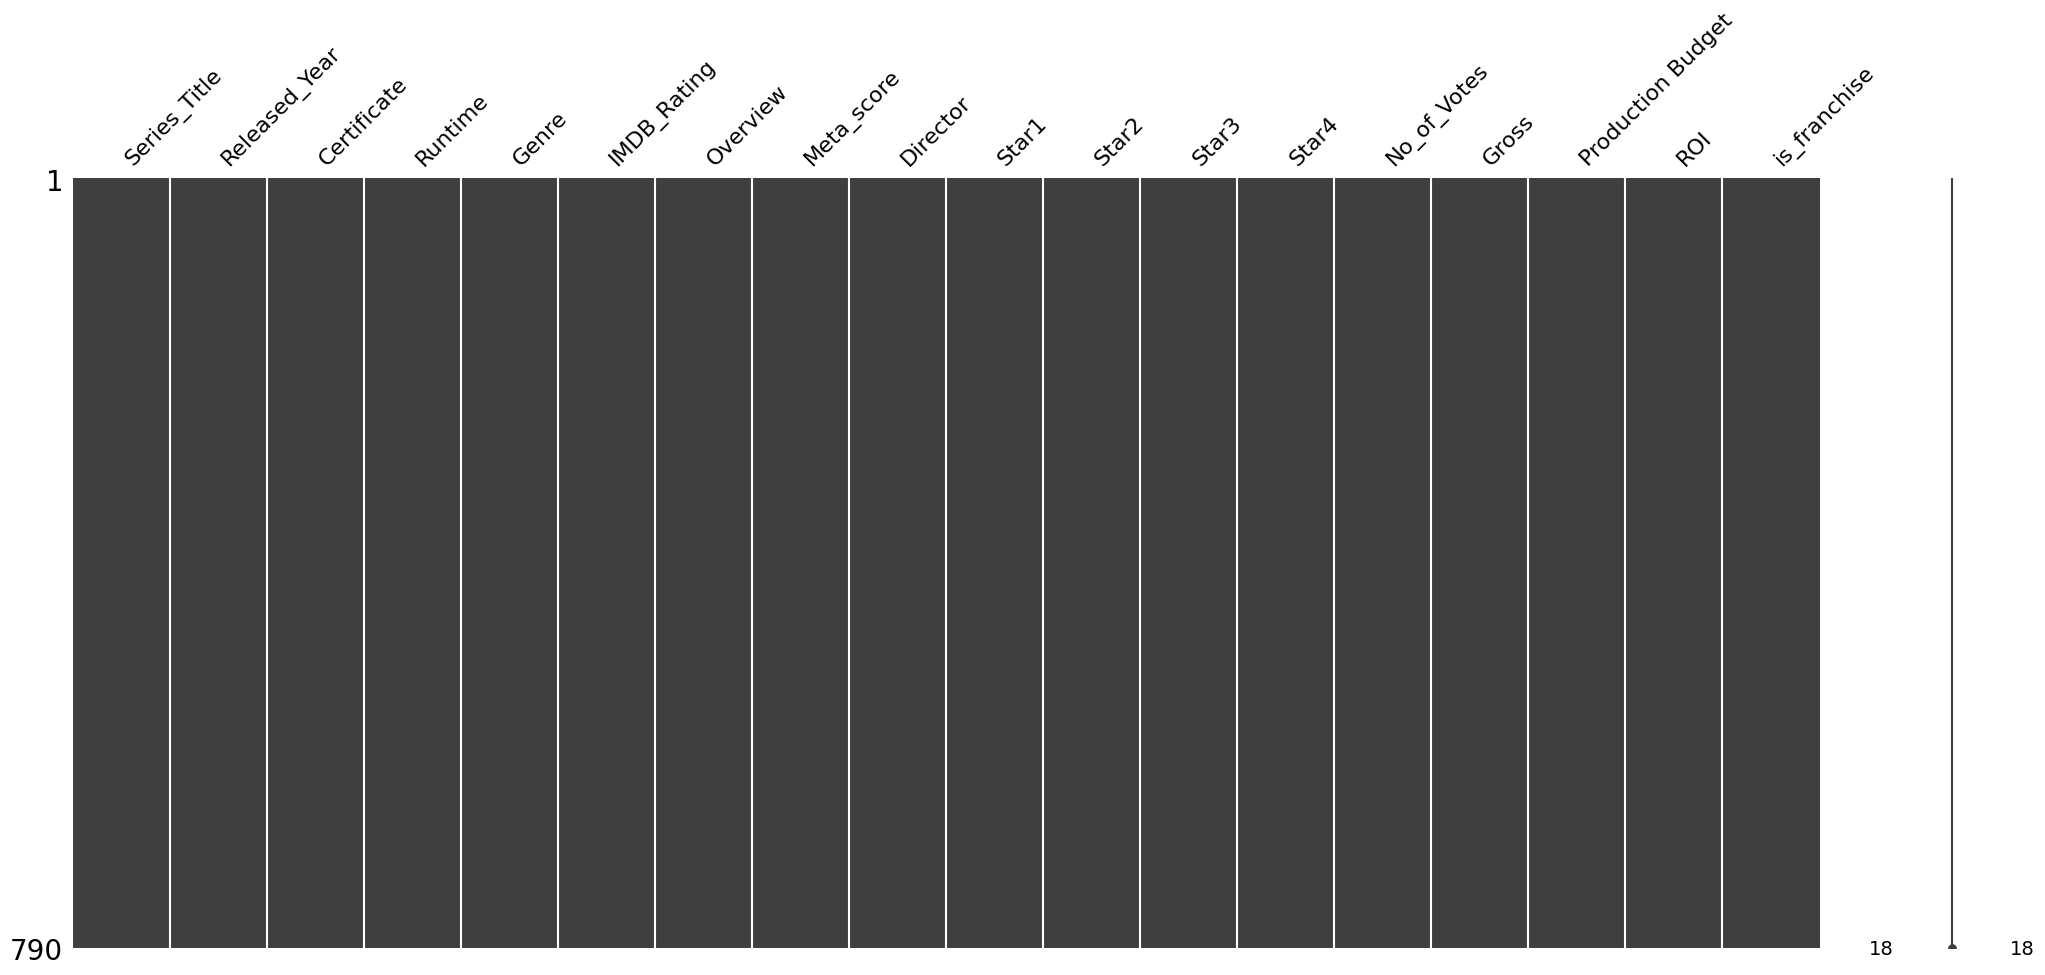

In [45]:
missingno.matrix(df_clean);

In [46]:
# Visualizar o tamanho do dataframe
print(f"Entradas: {df_clean.shape[0]}")
print(f"Colunas: {df_clean.shape[1]}")

Entradas: 790
Colunas: 18


Removemos 209 entradas com valores vazios.

## 1.3 - Estatísticas descritivas das variáveis numéricas

Vamos entender um pouco como as variáveis numéricas estão se comportando

In [47]:
num_cols = ["IMDB_Rating", "Meta_score", "Runtime", "No_of_Votes", "Gross", "Production Budget", "ROI"]
df_clean[num_cols].describe()

,IMDB_Rating,Meta_score,Runtime,No_of_Votes,Gross,Production Budget,ROI
count,790.000000,790.000000,790.000000,7.900000e+02,7.900000e+02,7.900000e+02,790.000000
mean,7.939494,77.420253,123.949367,3.222348e+05,7.120476e+07,6.786121e+07,3.670244
std,0.279389,12.053875,27.547631,3.408760e+05,1.116031e+08,1.047504e+08,9.665604
min,7.600000,28.000000,45.000000,2.508800e+04,1.305000e+03,2.700000e+04,0.000009
25%,7.700000,71.000000,104.000000,7.544125e+04,4.069150e+06,8.000000e+06,0.216313
50%,7.900000,78.000000,120.000000,1.981540e+05,2.579460e+07,2.800000e+07,1.362384
75%,8.100000,86.000000,137.000000,4.599180e+05,8.972977e+07,7.500000e+07,3.288792
max,9.200000,100.000000,242.000000,2.303232e+06,9.366622e+08,5.332000e+08,153.795302


Com essa estatística descritiva, notamos que o público concorda mais sobre as notas do que os críticos. A bilheteria média é um pouco menor que o orçamento, mas há uma enorme diferença entre filmes de sucesso e fracassos financeiros. A popularidade também varia muito, com alguns filmes tendo milhões de votos e outros poucos.

A duração dos filmes, varia drasticamente de 45 a 242 minutos. Isso mostra que o conjunto de dados inclui desde filmes curtos até produções muito longas.

A análise do ROI (Retorno sobre o Investimento) mostra que a indústria do cinema é um jogo de alto risco com potencial de alto retorno. Embora a média de lucro pareça positiva, ela é puxada para cima por alguns poucos grandes sucessos. A realidade é que, para cada filme que dá um lucro gigantesco, muitos outros geram pouco retorno ou acabam em prejuízo, como indicam os valores negativos.

## 1.4 - Histograma das variáveis numéricas

Nos histogramas que vamos criar a seguir iremos em busca de entender qual o padrão de comportamento de cada variável, como a maioria das notas, a duração ou a bilheteria dos filmes.

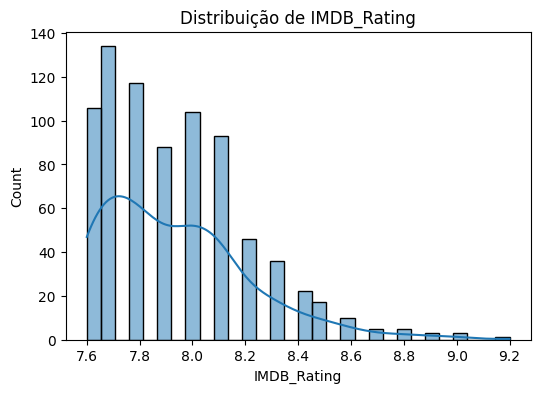

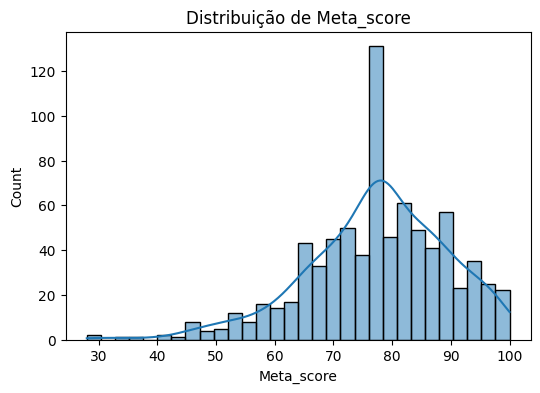

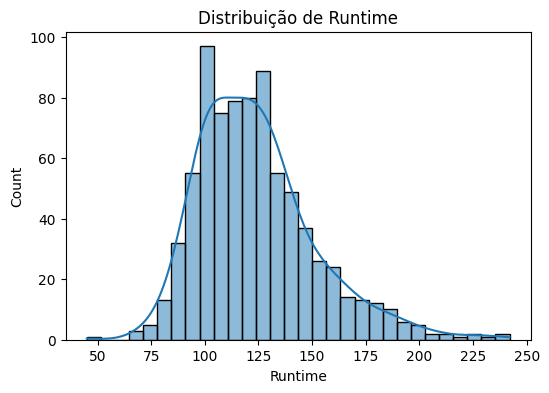

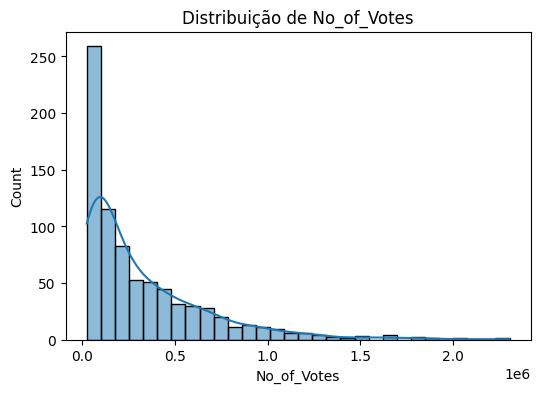

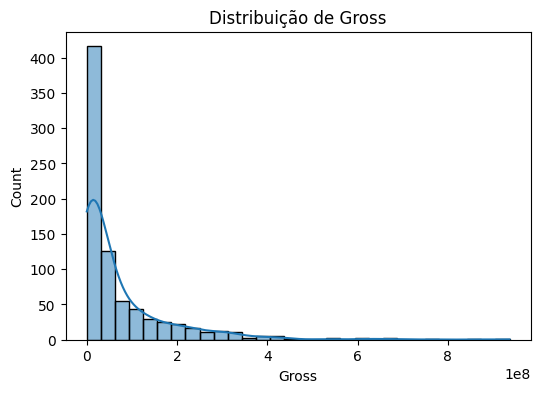

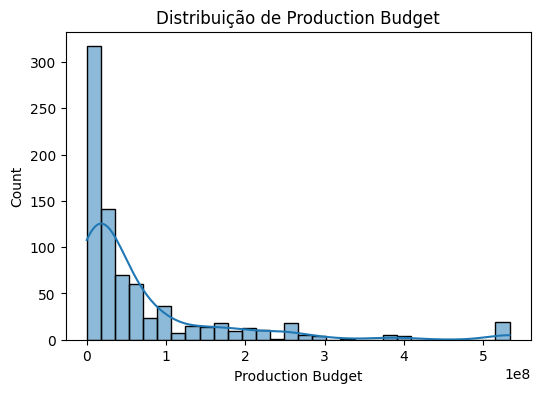

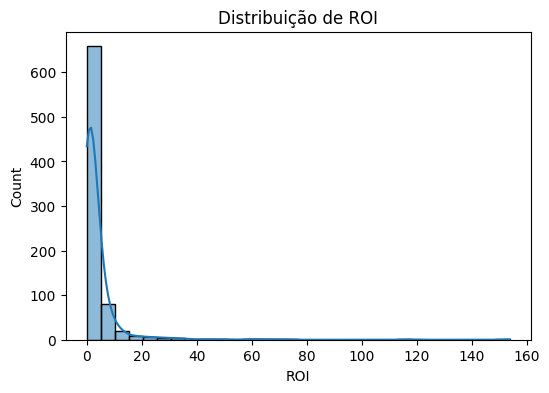

In [48]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_clean[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribuição de {col}")
    plt.show()

O histograma da nota IMDB nos mostra que todos os filmes dessa lista são muito bem avaliados, com notas que vão de 7.6 a 9.2. O mais interessante é que as notas não seguem um padrão único. Em vez de se agruparem em um só ponto, elas se concentram em duas faixas principais, uma em torno de 7.7 e outra em 8.0. Isso mostra que, mesmo dentro de um grupo de filmes de alta qualidade, a distribuição de notas não é uniforme.

Pelo histograma das notas da crítica, vemos que variam bem mais do que as do público, indo de notas baixas até a pontuação máxima de 100. A maioria dos filmes recebeu notas altas, entre 75 e 85. No entanto, o fato de ter uma cauda longa para as notas mais baixas mostra que alguns filmes, mesmo estando nesta lista, não agradaram tanto aos críticos.

O histograma do tempo de duração dos fimes, mostra que a maioria dura entre 100 e 110 minutos, o que é o padrão em cinema. A duração dos filmes varia bastante, com alguns bem curtos e outros que passam das 4 horas, mas são as exceções.

No histograma da bilheteria, mesmo sendo filmes bem avaliados, a maioria não fez uma bilheteria gigantesca. Na verdade, a grana se concentrou em poucos filmes que foram sucessos enormes, os chamados "blockbusters", que esticam o gráfico e fazem a média subir.

Assim como no histograma de bilheteria, este mostra que a maioria dos filmes tem um orçamento modesto. Só que uma pequena parte das produções é que custa muito caro, na casa das centenas de milhões de dólares. O formato do gráfico é bem parecido com o da bilheteria, o que sugere que, geralmente, orçamentos menores resultam em bilheterias menores, enquanto os grandes orçamentos miram bilheterias gigantescas.

O ROI nos demonstra que a qualidade artística não garante sucesso financeiro. O sucesso estrondoso, com bilheteria e ROI gigantescos, é um evento raro, limitado a uma pequena porcentagem dos filmes, que se destacam como outliers.

## 1.5 - Boxplots para identificar outliers

Vamos visualizar alguns boxplots com a intenção de ter uma visão rápida de como as notas, os orçamentos e as bilheterias se distribuem e identificar a presença de filmes que fogem muito do padrão.

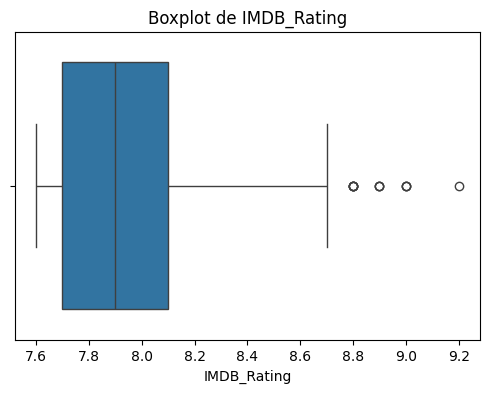

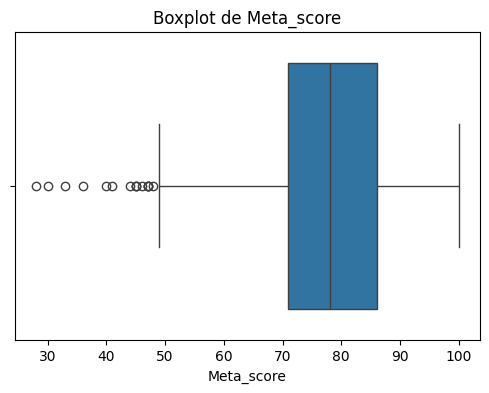

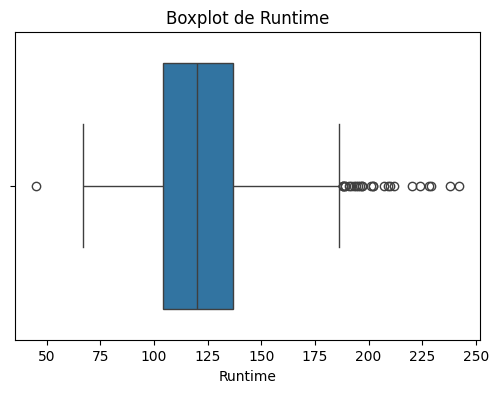

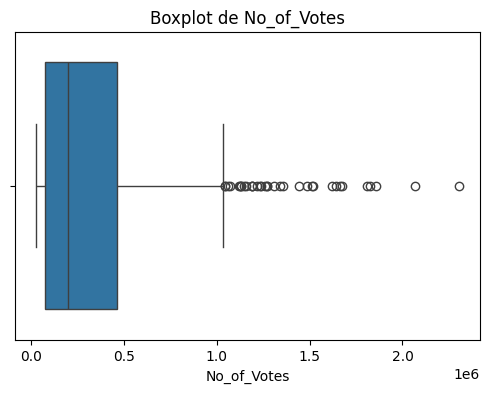

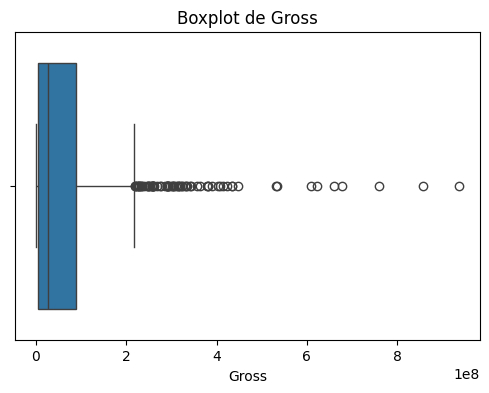

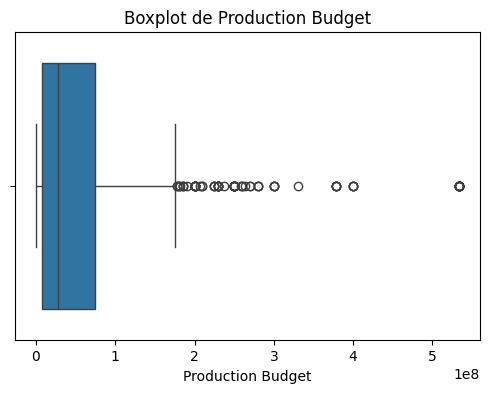

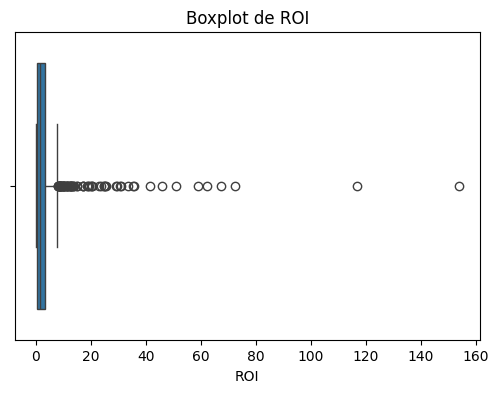

In [49]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_clean[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

* Para bilheteria, orçamento, votos e ROI, a maioria dos filmes fica com valores baixos. Já os grandes sucessos são poucos, mas se destacam tanto que criam uma enorme diferença nos dados.

* Já nas avaliações (tanto do público quanto da crítica), a maioria dos filmes tem notas altas. A principal diferença é que o público quase não dá notas baixas, enquanto os críticos ocasionalmente dão.

Não vamos precisar remover os outliers neste caso. Eles não são erros nos dados, pelo contrário, representam os valores reais de grandes sucessos e produções de alto orçamento que realmente ocorrem na indústria. Por isso, são informações importantes para o nosso estudo.

## 1.6 - Variáveis categóricas

Agora vamos ver alguns gráficos para termos uma visão geral de que tipo de filmes estamos lidando, antes de aprofundar nas análises.

In [50]:
cat_cols = ["Certificate", "Genre", "Director"]

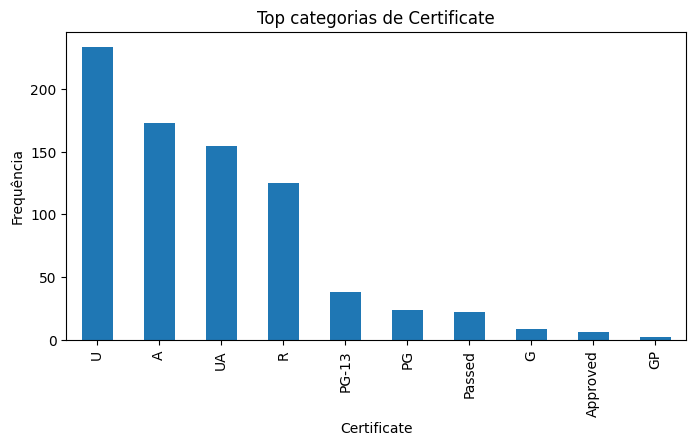

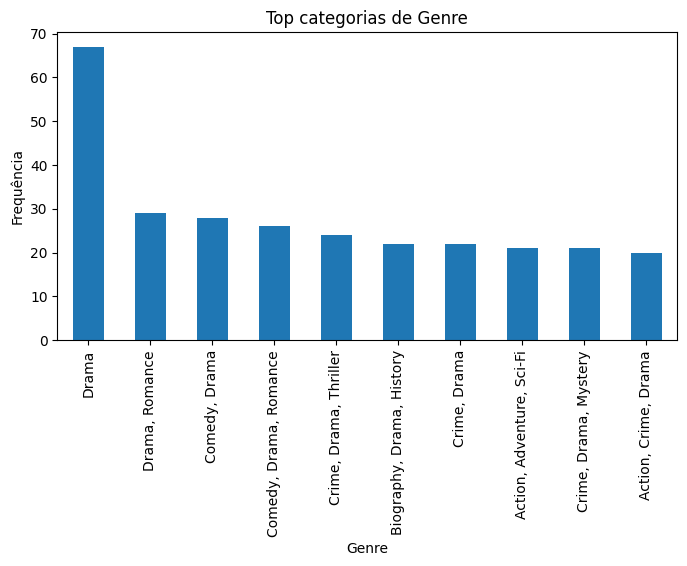

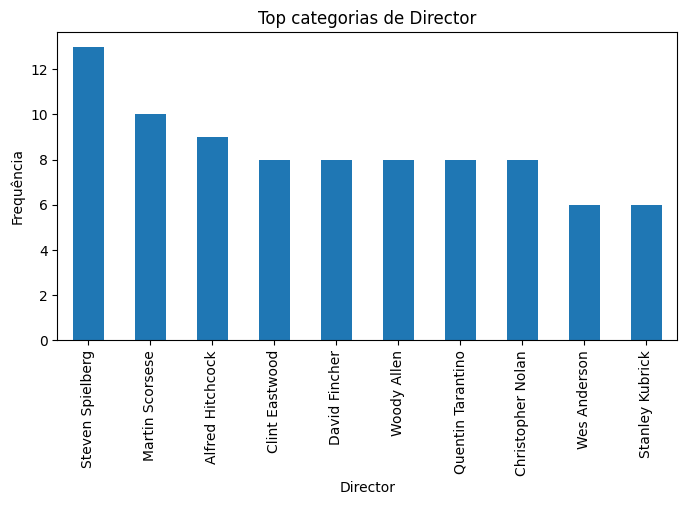

In [51]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    df_clean[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top categorias de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()

*Certificado*

Existe uma boa variedade de certificados de censura, o que indica que os filmes vêm de vários lugares diferentes. As classificações mais comuns são para o público geral, mostrando que o acervo tem filmes para todos os gostos.

*Gênero*

O gênero Drama é o que mais aparece na lista, muitas vezes misturado com outros como Romance e Comédia. Isso mostra que o publico está cheia de pessoas que gostam de filmes com temas mais sérios.

*Diretores*

A lista dos diretores mais frequentes é um show à parte, com nomes como Alfred Hitchcock e Steven Spielberg no topo. Ou seja, a coleção é repleta de filmes feitos por diretores muito famosos e respeitados.

## 1.7 - Variável textual

Vamos criar um histograma com o tamanho das reviews, pois ajudam a ver padrão de descrições

In [52]:
df_clean["overview_len"] = df_clean["Overview"].fillna("").apply(len)
print(df_clean["overview_len"].describe())

count    790.000000
mean     147.916456
std       43.626344
min       40.000000
25%      116.000000
50%      143.000000
75%      174.000000
max      313.000000
Name: overview_len, dtype: float64


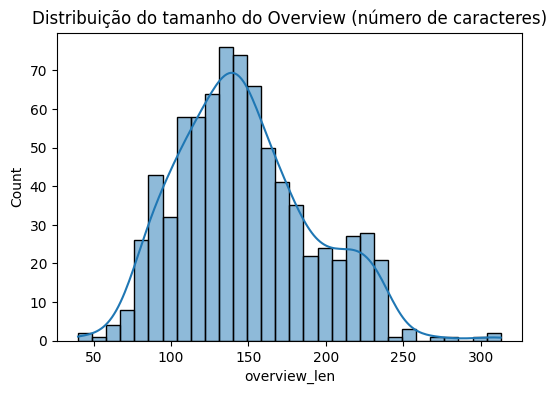

In [53]:
plt.figure(figsize=(6,4))
sns.histplot(df_clean["overview_len"], bins=30, kde=True)
plt.title("Distribuição do tamanho do Overview (número de caracteres)")
plt.show()

De maneira geral, a maioria dos resumos dos filmes tem um tamanho bem consistente, com cerca de 140 a 150 caracteres. Isso mostra que o padrão é ter um texto de um tamanho padronizado.

Embora o tamanho médio seja previsível, há uma variação considerável, com alguns resumos bem curtos e outros bem longos.

## 1.8 - Variável Booleana

Agora vamos analisar quantos filmes do nosso conjunto pertencem a franquias.

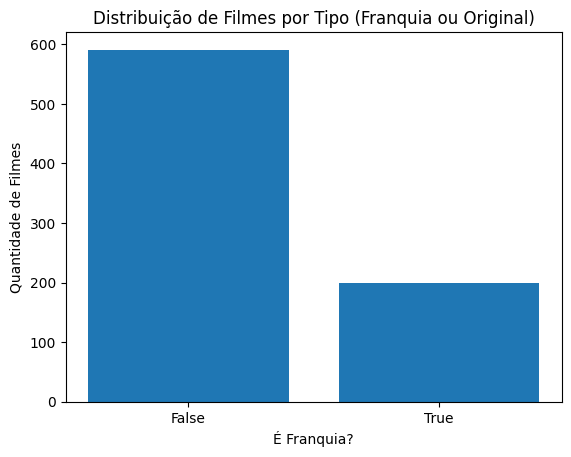

In [54]:
# Contagem dos valores da variável booleana
counts = df_clean["is_franchise"].value_counts()

# Criando o gráfico de barras
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribuição de Filmes por Tipo (Franquia ou Original)")
plt.xlabel("É Franquia?")
plt.ylabel("Quantidade de Filmes")
plt.show()

O gráfico nos mostra que a grande maioria dos filmes não fazem parte de uma franquia. Eles são obras originais ou únicas, o que é uma característica importante do conjunto.

# 2 - Análise Multivariada

Agora vamos analisar como as variáveis se relacionam entre si.

## 2.1 - Relação entre Orçamento (Budget) e Bilheteria (Gross)

Aqui queremos entender se filmes com orçamento maior tendem a ter maior bilheteria. Ou seja, existe correlação entre quanto se investe e quanto se arrecada?

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


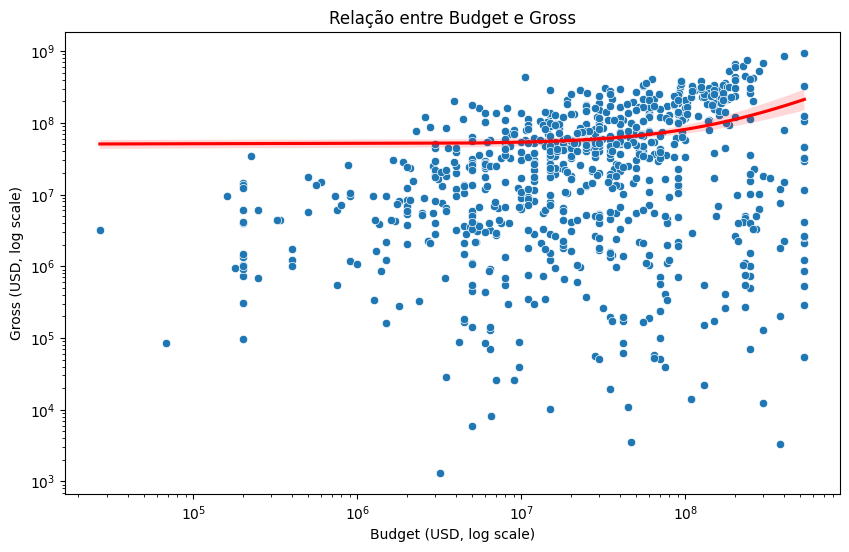

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="Production Budget", y="Gross")
sns.regplot(data=df_clean, x="Production Budget", y="Gross", scatter=False, color="red")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Budget (USD, log scale)")
plt.ylabel("Gross (USD, log scale)")
plt.title("Relação entre Budget e Gross")
plt.show();

O gráfico de dispersão entre orçamento e bilheteria mostra que, de modo geral, quanto maior o orçamento, maior a bilheteria. Filmes de baixo orçamento apresentam resultados muito variados, podendo ter tanto bilheterias baixas quanto surpreendentemente altas, representando risco e oportunidade. Já filmes com orçamentos altos tendem a ter bilheterias elevadas de forma mais previsível, com menor risco de fracasso financeiro.

Para confirmar as observações do gráfico, vamos realizar um teste de hipóteses.

Hipóteses:

* H0 (nula): Não existe correlação entre Budget e Gross.

* H1 (alternativa): Existe correlação positiva entre Budget e Gross.

In [56]:
# Calcula correlação
corr, p_value = pearsonr(df_clean["Production Budget"], df_clean["Gross"])

# Imprime resultado
print(f"Correlação: {corr:.2f}, p-valor: {p_value:.4f}")

# Interpretação do teste
alpha = 0.05  # nível de significância
if p_value < alpha:
    print("Resultado: Rejeitamos H0 → Existe correlação significativa entre Budget e Gross.")
else:
    print("Resultado: Não rejeitamos H0 → Não há evidência de correlação significativa entre Budget e Gross.")

Correlação: 0.28, p-valor: 0.0000
Resultado: Rejeitamos H0 → Existe correlação significativa entre Budget e Gross.


Com base no teste de Pearson, confirmamos a observação feita pelo gráfico de dispersão, filmes com orçamentos maiores tendem a apresentar bilheterias mais altas.

## 2.2 - Qual gênero tem maior ROI médio?

Aqui queremos entender quais gêneros são mais lucrativos proporcionalmente ao investimento.

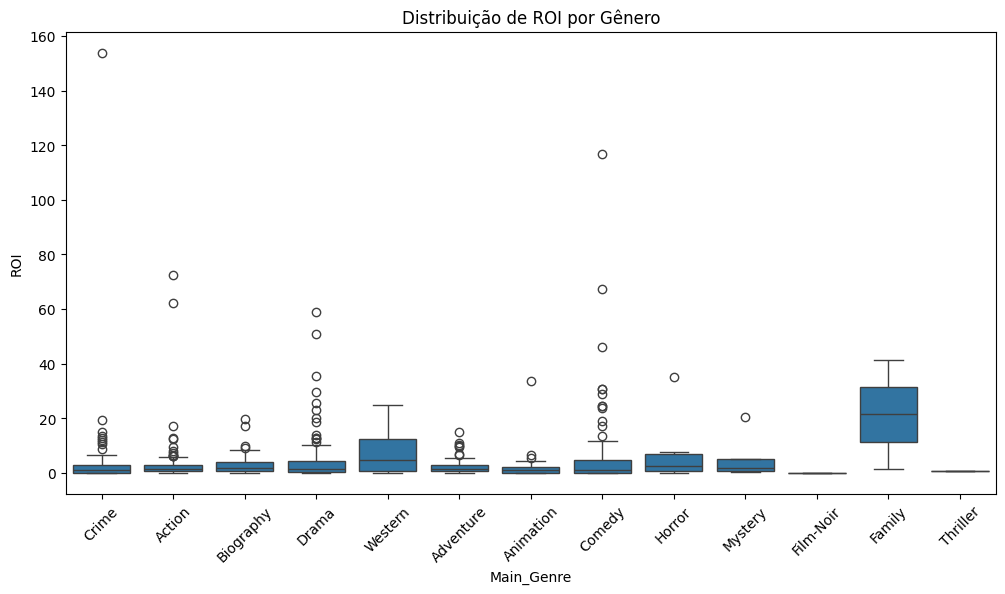

In [57]:
# Considerando o que gênero principal é o da primeira posição
df_clean["Main_Genre"] = df_clean["Genre"].str.split(",").str[0]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean, x="Main_Genre", y="ROI")
plt.xticks(rotation=45)
plt.title("Distribuição de ROI por Gênero")
plt.show()

Na maioria dos casos, os filmes apresentam retorno não tão alto, independentemente do gênero. Embora ocorram retornos muito altos em eventos raros, representados pelos outliers. O gênero 'Família' é o que se destaca, apresentando o ROI médio mais alto e consistente em comparação aos outros gêneros.

Vamos usar um teste ANOVA, para confirmamos que o ROI médio do genero 'Familia' é mais alto que os demais.

Hipóteses:

* H0: Todos os gêneros têm o mesmo ROI médio.

* H1: Pelo menos um gênero tem ROI médio diferente.

Para usar o ANOVA o ROI de cada gênero deve seguir aproximadamente uma distribuição normal.

Para isso vamos usar o teste de Shapiro, onde:

* H0: os dados são normais.

* Se p > 0.05, não rejeitamos H0 (dados parecem normais).

* Se p ≤ 0.05, rejeitamos H0 (dados não são normais).

In [58]:
for name, group in df_clean.groupby("Main_Genre"):
    stat, p_value = shapiro(group["ROI"].dropna())
    print(f"Gênero: {name}, p-valor: {p_value:.4f}")

Gênero: Action, p-valor: 0.0000
Gênero: Adventure, p-valor: 0.0000
Gênero: Animation, p-valor: 0.0000
Gênero: Biography, p-valor: 0.0000
Gênero: Comedy, p-valor: 0.0000
Gênero: Crime, p-valor: 0.0000
Gênero: Drama, p-valor: 0.0000
Gênero: Family, p-valor: nan
Gênero: Film-Noir, p-valor: nan
Gênero: Horror, p-valor: 0.0001
Gênero: Mystery, p-valor: 0.0006
Gênero: Thriller, p-valor: nan
Gênero: Western, p-valor: 0.1985


Como podemos ver, quase nenhum grupo segue uma normal, por isso vamos usar o teste de Kruskal

Só por desencargo de consciência, vamos testar também a homogeneidade das variâncias dos dados. Vale lembrar que, como eles não seguem uma distribuição normal, esse teste não seria obrigatório.

Para isso, iremos usar o test de levene, onde:

* H0: as variâncias são iguais.

* Se p > 0.05, não rejeitamos H0 (variâncias homogêneas).

* Se p ≤ 0.05, rejeitamos H0 (variâncias diferentes).

In [59]:
groups = [group["ROI"].dropna() for name, group in df_clean.groupby("Main_Genre")]
stat, p_value = levene(*groups)
print(f"Levene Test - stat: {stat:.2f}, p-valor: {p_value:.4f}")

Levene Test - stat: 1.70, p-valor: 0.0631


Como temos um p-valor, maior que 0.05, podemos concluir que as variancias são homogêneas.

Usando o teste de Kruskal

In [60]:
# Agrupando ROI por gênero principal
groups = [group["ROI"].dropna() for name, group in df_clean.groupby("Main_Genre")]

# Rodando ANOVA
stat, p_value = kruskal(*groups)
print(f"F-statistic: {stat:.2f}, p-valor: {p_value:.4f}")

# Interpretação do teste
alpha = 0.05  # nível de significância
if p_value < alpha:
    print("Resultado: Rejeitamos H0 → Existe diferença significativa do ROI entre os gêneros.")
else:
    print("Resultado: Não rejeitamos H0 → Não há evidência de diferença significativa do ROI entre os gêneros.")

F-statistic: 19.66, p-valor: 0.0739
Resultado: Não rejeitamos H0 → Não há evidência de diferença significativa do ROI entre os gêneros.


Ao contrário do que sugeria o boxplot, o teste ANOVA não encontrou evidências suficientes para afirmar que o ROI varia entre os gêneros. Ou seja, o retorno sobre investimento parece ser, em média, parecido para todos os tipos de filmes.

## 2.3 - Impacto do tempo de filme (Runtime) no ROI

Buscamos saber se filmes mais longos têm maior ROI ou isso não influencia?

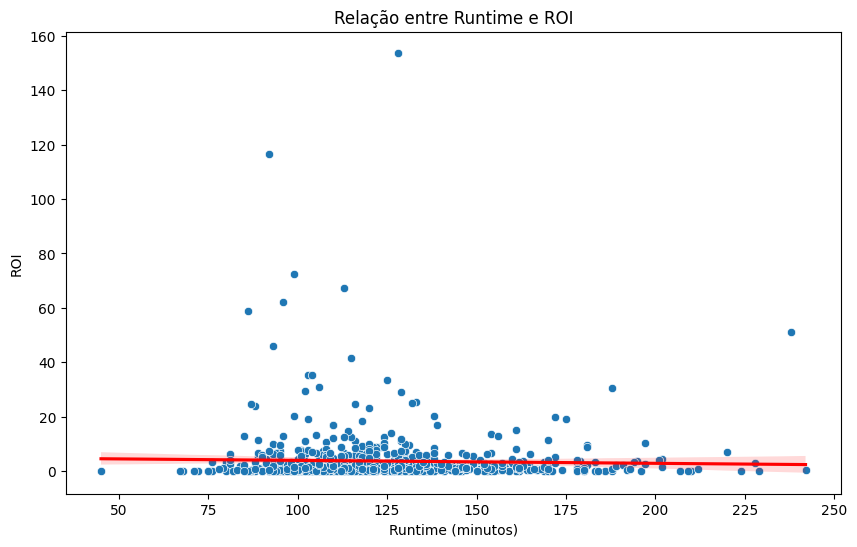

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="Runtime", y="ROI")
sns.regplot(data=df_clean, x="Runtime", y="ROI", scatter=False, color="red")
plt.xlabel("Runtime (minutos)")
plt.ylabel("ROI")
plt.title("Relação entre Runtime e ROI")
plt.show()

Podemos notar que não existe uma relação clara entre o tempo de um filme e seu retorno financeiro. A duração não é um bom preditor de sucesso, já que tanto filmes curtos quanto longos podem ter ROI baixo ou alto.

Para confirmar ou não o que podemos notar no gráfico, iremos realizar um teste de hipoteses, onde:

Hipóteses:

* H0: Runtime não tem efeito sobre ROI.

* H1: Runtime influencia o ROI.

In [62]:
# Correlação de Pearson
corr, p_value = pearsonr(df_clean["Runtime"], df_clean["ROI"])
print(f"Correlação: {corr:.2f}, p-valor: {p_value:.4f}")

# Teste de hipótese
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H0: Existe evidência de correlação significativa entre Runtime e ROI.")
else:
    print("Não rejeitamos H0: Não há evidência suficiente de correlação entre Runtime e ROI.")

Correlação: -0.03, p-valor: 0.3860
Não rejeitamos H0: Não há evidência suficiente de correlação entre Runtime e ROI.


O teste de hipóteses confirma que não há evidências de correlação significativa entre a duração do filme e o retorno sobre investimento. Em outras palavras, o tempo de um filme não influencia de forma relevante o seu desempenho financeiro.

## 2.4 - Efeito de diretores no ROI

Agora queremos descobrir se alguns diretores ou atores conseguem gerar maior ROI consistentemente?

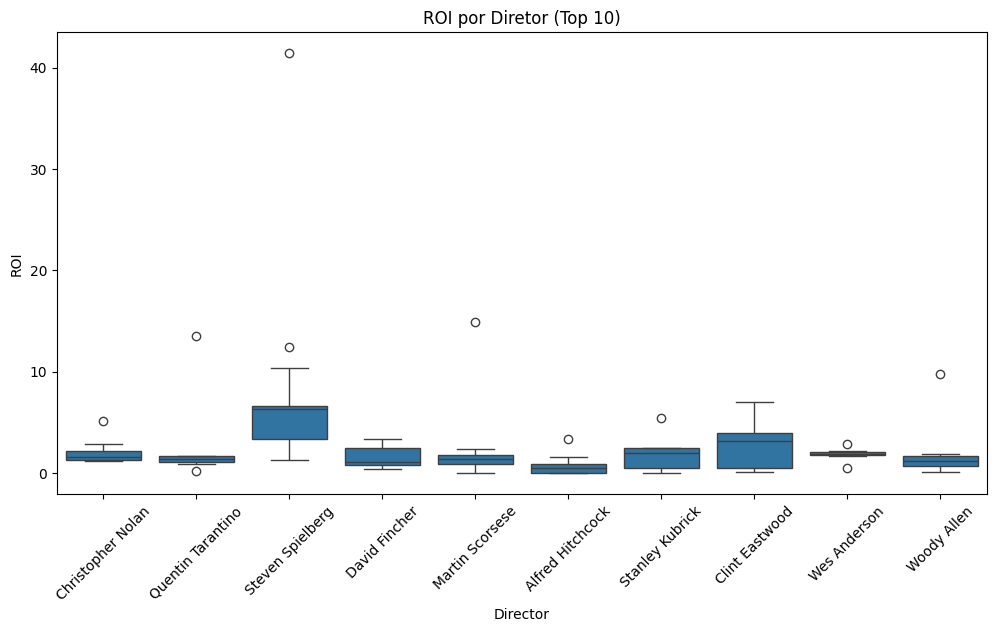

In [63]:
top_directors = df_clean["Director"].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean[df_clean["Director"].isin(top_directors)], x="Director", y="ROI")
plt.xticks(rotation=45)
plt.title("ROI por Diretor (Top 10)")
plt.show()

Podemos notar que, para a maioria deles, o retorno financeiro costuma ser não tão alto, mesmo em casos de grande reconhecimento. Ainda assim, quase todos têm alguns filmes que fogem à regra e alcançam grande sucesso, evidenciados pelos outliers. Entre eles, Steven Spielberg se destaca, já que seus filmes apresentam, em média, ROI mais alto e consistente, além de estar entre os que têm os maiores sucessos individuais.

Como no caso dos gêneros, vamos testar a normalidade e variancia dos dados, para sabermos se usaremos o teste ANOVA ou Kruskal.

Vamos iniciar com o teste de shapiro para verificar as normalidades dos dados para cada diretor.

In [64]:
df_top = df_clean[df_clean["Director"].isin(top_directors)]
# Agrupar ROI por diretor
groups = [group["ROI"].dropna() for _, group in df_top.groupby("Director")]

In [65]:
normalidade = {}
for director, group in df_top.groupby("Director"):
    stat, p = shapiro(group["ROI"].dropna())
    normalidade[director] = p
    print(f"{director}: p-valor = {p:.4f}")

Alfred Hitchcock: p-valor = 0.0079
Christopher Nolan: p-valor = 0.0070
Clint Eastwood: p-valor = 0.3079
David Fincher: p-valor = 0.1590
Martin Scorsese: p-valor = 0.0000
Quentin Tarantino: p-valor = 0.0000
Stanley Kubrick: p-valor = 0.3733
Steven Spielberg: p-valor = 0.0001
Wes Anderson: p-valor = 0.4676
Woody Allen: p-valor = 0.0002


A maioria dos diretores apresenta distribuições de ROI não normais, como o ANOVA é testes estatísticos que assume normalidade, iremos usar novamente o teste Kruskal.

In [66]:
# Rodar Kruskal-Wallis
stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis: estatística = {stat:.2f}, p-valor = {p_value:.4f}")

# Interpretação automática
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H₀: Pelo menos um diretor tem ROI médio diferente.")
else:
    print("Não rejeitamos H₀: Não há evidência suficiente de diferença de ROI entre os diretores.")

Kruskal-Wallis: estatística = 25.41, p-valor = 0.0025
Rejeitamos H₀: Pelo menos um diretor tem ROI médio diferente.


Como vimos nos gráficos, o teste Kruskal-Wallis comprova que há diferenças significativas no ROI médio entre os diretores analisados. Ou seja, pelo menos um diretor apresenta um retorno sobre investimento diferente dos demais.

## 2.5 - Efeito dos atores no ROI

Aqui buscamos identificar se os atores principais dos filmes, tem alguma influência no ROI, assim como fizemos para diretores, mas temos um problema, como são várias colunas de atores (Star1, Star2, Star3, Star4), o que iremos fazer para contornar isso é "desempilhar" fazer um melt esses dados em uma única coluna chamada, por exemplo, "Actor". Assim iremos junta todos os atores em uma lista única, mantendo o ROI associado ao filme.

In [67]:
# Reorganizar colunas de atores
actors_df = df_clean.melt(
    id_vars=["ROI"], 
    value_vars=["Star1", "Star2", "Star3", "Star4"], 
    var_name="Star_Position", 
    value_name="Actor"
)

In [68]:
# Filtrar top 10 atores mais frequentes
top_actors = actors_df["Actor"].value_counts().head(10).index
actors_top_df = actors_df[actors_df["Actor"].isin(top_actors)]

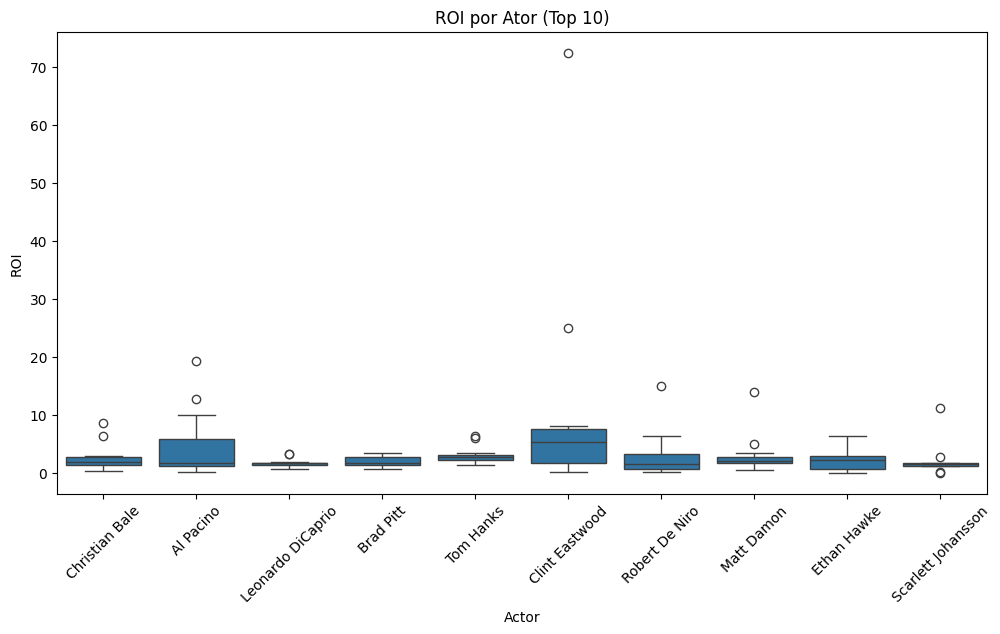

In [69]:
# Visualização
plt.figure(figsize=(12,6))
sns.boxplot(data=actors_top_df, x="Actor", y="ROI")
plt.xticks(rotation=45)
plt.title("ROI por Ator (Top 10)")
plt.show()

Os boxplots nos mostram que os filmes de Clint Eastwood se destacam, com ROI médio mais alto e consistente, além de incluir alguns dos maiores sucessos individuais. Mesmo para os atores mais famosos, um retorno elevado é a exceção, não a regra, com poucos filmes sendo os responsáveis por gerar os maiores lucros.

Vamor novamente testar a normalidade e variancia dos dados, assim com fizemos para os diretores.

In [70]:
normalidade = {}
for actor, group in actors_top_df.groupby("Actor"):
    stat, p_value = shapiro(group["ROI"].dropna())
    normalidade[actor] = p_value
    print(f"{actor}: p-valor = {p_value:.4f}")

alpha = 0.05
for actor, p_value in normalidade.items():
    if p_value > alpha:
        print(f"{actor}: distribuição do ROI parece normal.")
    else:
        print(f"{actor}: distribuição do ROI NÃO é normal.")

Al Pacino: p-valor = 0.0030
Brad Pitt: p-valor = 0.7701
Christian Bale: p-valor = 0.0040
Clint Eastwood: p-valor = 0.0000
Ethan Hawke: p-valor = 0.1909
Leonardo DiCaprio: p-valor = 0.0633
Matt Damon: p-valor = 0.0000
Robert De Niro: p-valor = 0.0002
Scarlett Johansson: p-valor = 0.0001
Tom Hanks: p-valor = 0.0038
Al Pacino: distribuição do ROI NÃO é normal.
Brad Pitt: distribuição do ROI parece normal.
Christian Bale: distribuição do ROI NÃO é normal.
Clint Eastwood: distribuição do ROI NÃO é normal.
Ethan Hawke: distribuição do ROI parece normal.
Leonardo DiCaprio: distribuição do ROI parece normal.
Matt Damon: distribuição do ROI NÃO é normal.
Robert De Niro: distribuição do ROI NÃO é normal.
Scarlett Johansson: distribuição do ROI NÃO é normal.
Tom Hanks: distribuição do ROI NÃO é normal.


A maioria dos atores apresenta distribuições de ROI não normais, testes não paramétricos podem ser mais adequados, por isso usaremos o teste Kruskal.

In [71]:
# Teste estatístico Kruskal-Wallis
groups = [group["ROI"].dropna() for name, group in actors_top_df.groupby("Actor")]
stat, p_value = kruskal(*groups)
print(f"F-statistic: {stat:.2f}, p-valor: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H0: Pelo menos um ator tem ROI médio diferente.")
else:
    print("Não rejeitamos H0: Não há evidência suficiente de diferença de ROI entre os atores.")

F-statistic: 10.48, p-valor: 0.3131
Não rejeitamos H0: Não há evidência suficiente de diferença de ROI entre os atores.


O teste nos indicou que não há evidências suficientes para afirmar que o ROI médio difere entre os atores analisados. Em outras palavras, o retorno sobre investimento parece ser, em média, semelhante para todos eles.

## 2.6 - Avaliar relação entre IMDB_Rating e ROI

Queremos aqui avaliar se filmes bem avaliados têm maior ROI?

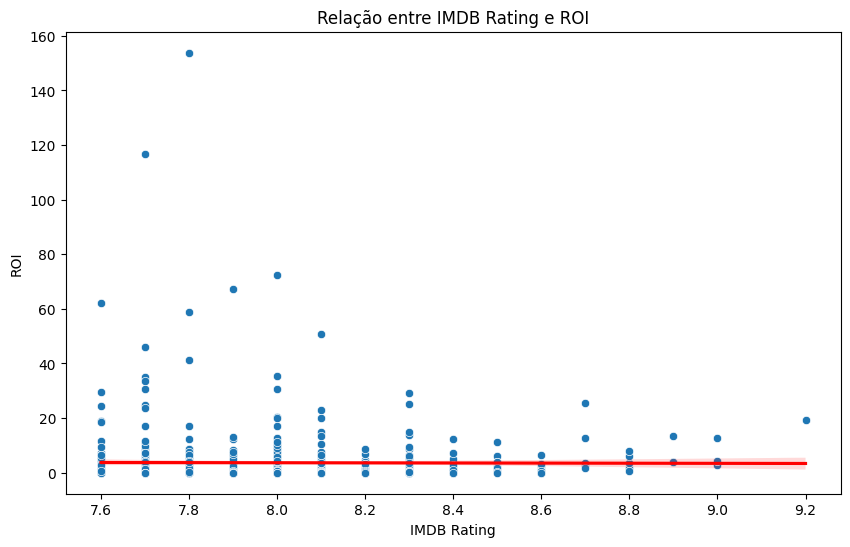

In [72]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="IMDB_Rating", y="ROI")
sns.regplot(data=df_clean, x="IMDB_Rating", y="ROI", scatter=False, color="red")
plt.xlabel("IMDB Rating")
plt.ylabel("ROI")
plt.title("Relação entre IMDB Rating e ROI")
plt.show()

O gráfico mostra que não há uma relação clara entre a avaliação do público e o retorno financeiro. Filmes com notas semelhantes podem ter ROI muito diferentes, e a maioria dos filmes apresenta retorno não tão alto. Os poucos casos de ROI elevado são raros e acontecem independentemente da nota, indicando que a percepção de qualidade não garante sucesso financeiro.

## 2.7 - Ser franquia influencia no ROI?

Aqui queremos investigar se filmes de franquia apresentão um retorno de investimento maior.

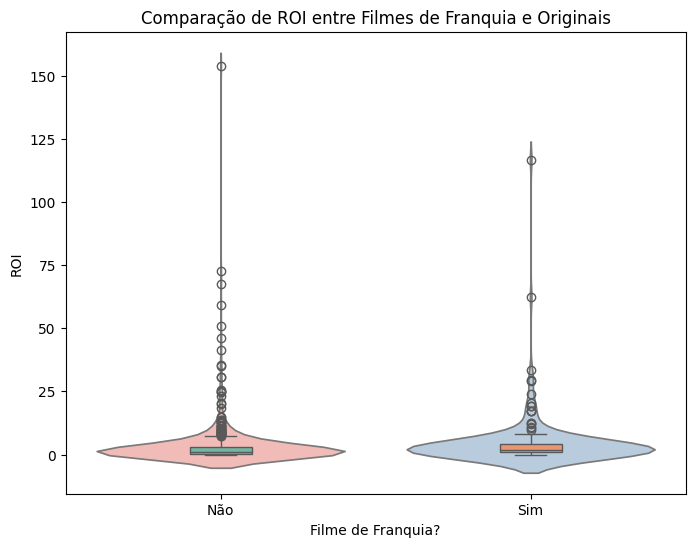

In [73]:
plt.figure(figsize=(8,6))

# Violino para mostrar distribuição
sns.violinplot(data=df_clean, x="is_franchise", y="ROI", inner=None, palette="Pastel1")

# Boxplot por cima do violino
sns.boxplot(data=df_clean, x="is_franchise", y="ROI", width=0.2, palette="Set2")

plt.xlabel("Filme de Franquia?")
plt.ylabel("ROI")
plt.xticks([0,1], ["Não", "Sim"])
plt.title("Comparação de ROI entre Filmes de Franquia e Originais")
plt.show()

Com o gráfico podemops notar que na maioria dos casos, ambos têm retorno financeiro baixo. Ainda assim, tanto filmes originais quanto de franquia podem se tornar grandes sucessos, já que existem alguns outliers com ROI muito alto. Filmes originais tendem a ter uma concentração maior de retornos baixos, mas também incluem os casos de ROI mais elevados.

# 3 - Análise Multivariada (IMDB)

## 3.1 - Relação entre Orçamento (Budget) e IMDB Rating

Queremos entender se filmes com orçamento maior tendem a receber notas mais altas no IMDB. Se existe correlação entre quanto se investe e a avaliação do público?

Para confirmar ou não, o que estamos buscando, além da visualização gráfica, vamos fazer um teste de hipoteses.

Hipoteses:

* H0: Não existe correlação entre Budget e IMDB_Rating.

* H1: Existe correlação significativa entre Budget e IMDB_Rating.

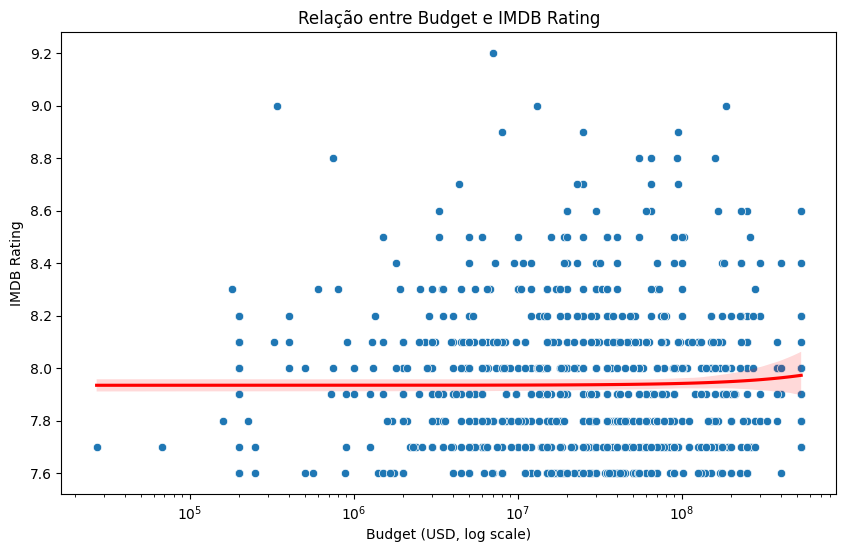

In [74]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="Production Budget", y="IMDB_Rating")
sns.regplot(data=df_clean, x="Production Budget", y="IMDB_Rating", scatter=False, color="red")
plt.xscale("log")
plt.xlabel("Budget (USD, log scale)")
plt.ylabel("IMDB Rating")
plt.title("Relação entre Budget e IMDB Rating")
plt.show()

Segundo nosso gráfico, gastar mais não garante nota alta no IMDB, filmes médios equilibram risco e qualidade. O sucesso talvez depende mais de roteiro, direção, elenco e marketing, essa hipotese iremos testar mais aidante. Uma possivel estratégia seria combinar filmes mid-budget de alto conceito, uma aposta maior com IP conhecida e projetos baratos de alto ROI.

In [75]:
corr, p_value = pearsonr(df_clean["Production Budget"].dropna(), df_clean["IMDB_Rating"].dropna())
if p_value < 0.05:
    print(f"Correlação: {corr:.2f}, p-valor: {p_value:.4f} Rejeitamos H0, existe relação significativa")
else:
    print(f"Correlação: {corr:.2f}, p-valor: {p_value:.4f} Não rejeitamos H0, não há relação significativa")

Correlação: 0.03, p-valor: 0.4540 Não rejeitamos H0, não há relação significativa


Não há evidência estatística de relação entre o orçamento do filme e a nota do IMDB. Podemos confirmar agora que, gastar mais não garante avaliações melhores, fortlecendo a hipotese de que fatores como roteiro, direção e elenco têm mais impacto na nota do que o valor investido.

## 3.2 - Relação entre Runtime e IMDB Rating

Agora queremos saber se filmes mais longos tendem a ser melhor avaliados? Queremos analisar se o tempo de duração influencia as notas do IMDB.

Hipóteses:

* H0: Runtime não tem efeito sobre IMDB_Rating.

* H1: Runtime influencia IMDB_Rating.

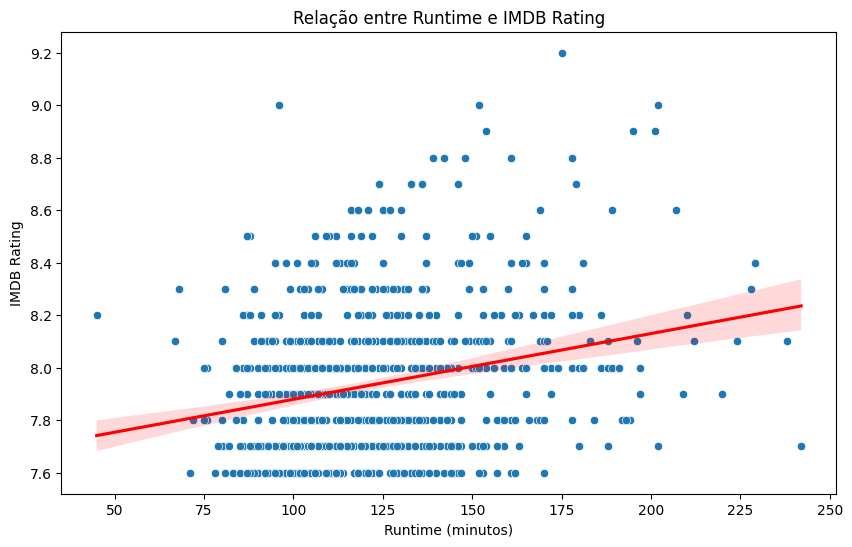

In [76]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="Runtime", y="IMDB_Rating")
sns.regplot(data=df_clean, x="Runtime", y="IMDB_Rating", scatter=False, color="red")
plt.xlabel("Runtime (minutos)")
plt.ylabel("IMDB Rating")
plt.title("Relação entre Runtime e IMDB Rating")
plt.show()

In [77]:
corr, p_value = pearsonr(df_clean["Runtime"].dropna(), df_clean["IMDB_Rating"].dropna())
if p_value < 0.05:
    print(f"Correlação: {corr:.2f}, p-valor: {p_value:.4f} Rejeitamos H0, existe relação significativa")
else:
    print(f"Correlação: {corr:.2f}, p-valor: {p_value:.4f} Não rejeitamos H0, não há relação significativa")

Correlação: 0.25, p-valor: 0.0000 Rejeitamos H0, existe relação significativa


A partir do gráfico e do teste de Pearson, podemos confirmar que filmes mais longos tendem a ter notas um pouco maiores no IMDB, mas o efeito é pequeno, não é porque um filme ganha 30 minutos a mais que a avaliação dispara. Filmes entre 100 e 140 minutos parecem ser os mais bem avaliados, oferecendo tempo suficiente para desenvolver personagens e trama sem cansar o público. Para a PProductions, o ideal é evitar extremos: curtas demais podem parecer superficiais e longos demais podem cansar. A faixa recomendada é de 110 a 150 minutos. 

Análisaremos também conforme uma hipotese, onde o gênero dramas, épicos e sci‑fi podem ser mais longos, enquanto comédias e terror funcionam melhor mais curtos. Tentando entender se no fim, o importante é como o tempo é usado, com ritmo e arcos narrativos bem planejados.

## 3.3 - Efeito do gênero e tempo no IMDB Rating

Queremos ver se determinados gêneros tendem a receber notas mais altas.

Como nos casos anteriores, para tornar nossa análise mais robusta, vamos confirmar os resultados com um teste de hipóteses.

Hipóteses:

* H0: Todos os gêneros têm o mesmo IMDB_Rating médio.

* H1: Pelo menos um gênero tem IMDB_Rating médio diferente.

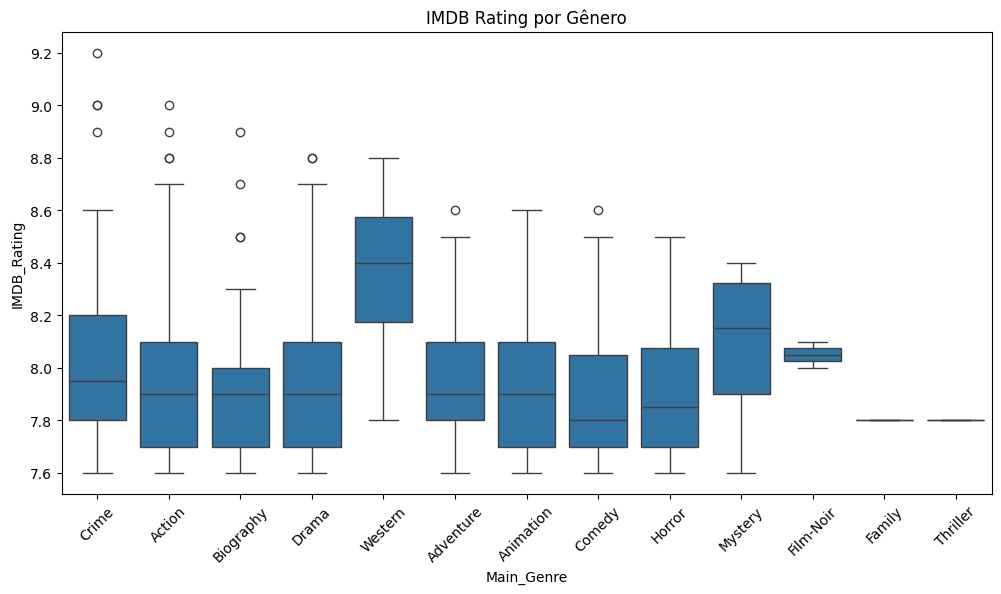

In [78]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean, x="Main_Genre", y="IMDB_Rating")
plt.xticks(rotation=45)
plt.title("IMDB Rating por Gênero")
plt.show()

Pelo gráfico podemos notar que, gêneros como Western, Mystery e Film-Noir costumam ter notas mais altas no IMDB, mas Mystery e Western têm avaliações bem variadas, indo de medianas a excelentes. Family e Thriller têm notas mais baixas e consistentes, com pouca variação. 

Para notas altas, apostar em Western, Mystery ou Film-Noir, para manter a consistência das notas, Family e Thriller.


Como estamos falando sobre médianas, teremos que usar o teste ANOVA ou Kruskal, para isso teremos que testar a normalidade doa dados.

In [79]:
# Teste de normalidade por gênero
normalidade = {}
for genre, group in df_clean.groupby("Main_Genre"):
    stat, p_value = shapiro(group["IMDB_Rating"].dropna())
    normalidade[genre] = p_value
    print(f"{genre}: p-valor = {p_value:.4f}")

# Interpretação
alpha = 0.05
for genre, p_value in normalidade.items():
    if p_value > alpha:
        print(f"{genre}: distribuição do IMDB_Rating parece normal.")
    else:
        print(f"{genre}: distribuição do IMDB_Rating NÃO é normal.")

Action: p-valor = 0.0000
Adventure: p-valor = 0.0126
Animation: p-valor = 0.0008
Biography: p-valor = 0.0000
Comedy: p-valor = 0.0000
Crime: p-valor = 0.0000
Drama: p-valor = 0.0000
Family: p-valor = nan
Film-Noir: p-valor = nan
Horror: p-valor = 0.1761
Mystery: p-valor = 0.1214
Thriller: p-valor = nan
Western: p-valor = 0.8994
Action: distribuição do IMDB_Rating NÃO é normal.
Adventure: distribuição do IMDB_Rating NÃO é normal.
Animation: distribuição do IMDB_Rating NÃO é normal.
Biography: distribuição do IMDB_Rating NÃO é normal.
Comedy: distribuição do IMDB_Rating NÃO é normal.
Crime: distribuição do IMDB_Rating NÃO é normal.
Drama: distribuição do IMDB_Rating NÃO é normal.
Family: distribuição do IMDB_Rating NÃO é normal.
Film-Noir: distribuição do IMDB_Rating NÃO é normal.
Horror: distribuição do IMDB_Rating parece normal.
Mystery: distribuição do IMDB_Rating parece normal.
Thriller: distribuição do IMDB_Rating NÃO é normal.
Western: distribuição do IMDB_Rating parece normal.


Como nem todas as categorias de filmes são normais, vamos usar o teste de Kruskal.

In [80]:
groups = [group["IMDB_Rating"].dropna() for name, group in df_clean.groupby("Main_Genre")]
stat, p_value = kruskal(*groups)
if p_value < 0.05:
    print(f"Kruskal-Wallis: estatística = {stat:.2f}, p-valor = {p_value:.4f} Rejeitamos H0, as medianas de IMDB são semelhantes entre gêneros")
else:
    print(f"Kruskal-Wallis: estatística = {stat:.2f}, p-valor = {p_value:.4f} NNão rejeitamos H0, as medianas de IMDB são semelhantes entre gêneros")

Kruskal-Wallis: estatística = 17.73, p-valor = 0.1243 NNão rejeitamos H0, as medianas de IMDB são semelhantes entre gêneros


Nosso teste de hipóteses não confirma que o gênero impacta significativamente as notas, mas vamos manter a conclusão inicial e continuar explorando essa variável nos próximos modelos de machine learning.

## 3.4 - Efeito de Diretores no IMDB Rating

Será que apenas o nome do diretor estar vinculado ao filme consegue gerar notas mais altas?

Hipóteses a serem testads:

* H0: O IMDB médio é o mesmo para todos os diretores.

* H1: Pelo menos um diretor tem IMDB médio diferente.

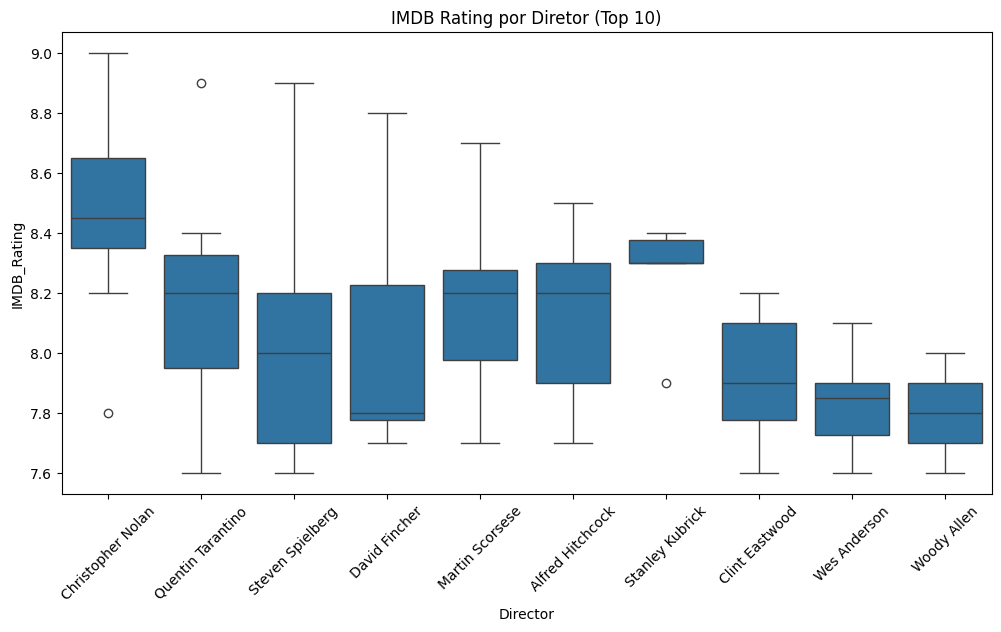

In [81]:
top_directors = df_clean["Director"].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean[df_clean["Director"].isin(top_directors)], x="Director", y="IMDB_Rating")
plt.xticks(rotation=45)
plt.title("IMDB Rating por Diretor (Top 10)")
plt.show()

In [82]:
groups = [group["IMDB_Rating"].dropna() for name, group in df_clean[df_clean["Director"].isin(top_directors)].groupby("Director")]
stat, p_value = kruskal(*groups)
if p_value < 0.05:
    print(f"Kruskal-Wallis: estatística = {stat:.2f}, p-valor = {p_value:.4f} Rejeitamos H0, pelo menos um diretor difere")
else:
    print(f"Kruskal-Wallis: estatística = {stat:.2f}, p-valor = {p_value:.4f} Não rejeitamos H0, IMDB médio é semelhante entre diretores")

Kruskal-Wallis: estatística = 23.78, p-valor = 0.0047 Rejeitamos H0, pelo menos um diretor difere


Podemos notar que Christopher Nolan se destaca com notas medianas altas e pouca variação no IMDb, indicando consistência na qualidade de seus filmes. Alfred Hitchcock, Stanley Kubrick e Quentin Tarantino também mantêm avaliações elevadas, mas com um pouco mais de dispersão. Diretores como Steven Spielberg e David Fincher apresentam maior variação nas notas, com alguns filmes muito elogiados e outros mais modestos. Já considerando o ROI, Spielberg lidera com grande retorno financeiro, seguido por Clint Eastwood e Tarantino, enquanto Hitchcock e Fincher têm retornos mais baixos. Wes Anderson e Woody Allen ficam com medianas mais baixas de nota e retornos modestos, mostrando que nem sempre filmes bem avaliados são os mais lucrativos.

## 3.5 - Efeito de Atores no IMDB Rating

Vamos averiguar se alguns atores geram filmes com notas mais altas?

Hipóteses que iremos testar:

* H0: O IMDB médio é o mesmo para todos os atores.

* H1: Pelo menos um ator tem IMDB médio diferente.

Iremos fazer o mesmo tratamento para lidar com as variáveis de atores, como fizemos anteriormente.

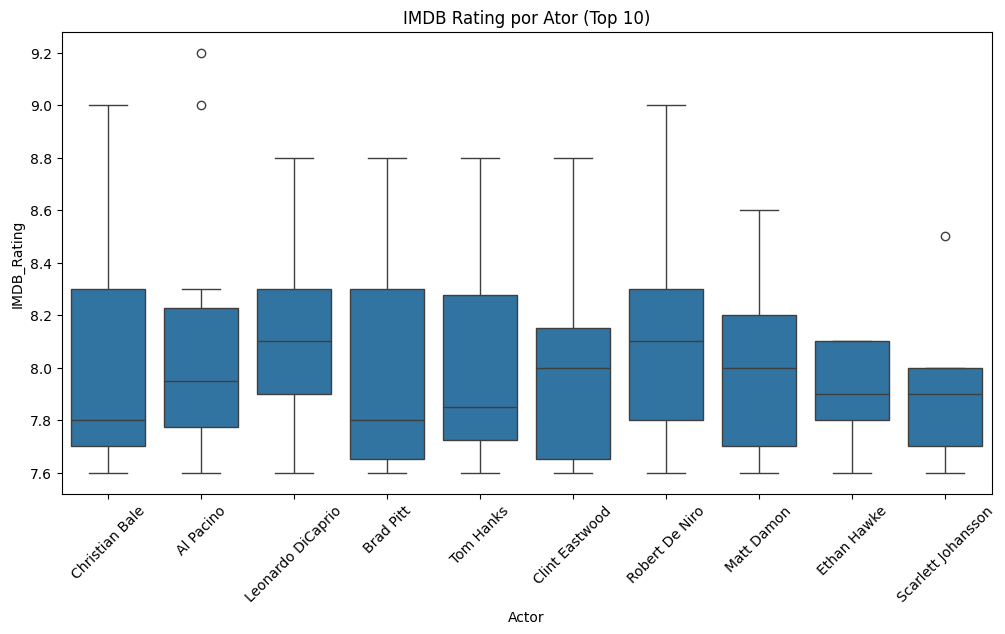

In [83]:
actors_df = df_clean.melt(
    id_vars=["IMDB_Rating"],
    value_vars=["Star1","Star2","Star3","Star4"],
    var_name="Star_Position", value_name="Actor"
)

top_actors = actors_df["Actor"].value_counts().head(10).index
actors_top_df = actors_df[actors_df["Actor"].isin(top_actors)]

plt.figure(figsize=(12,6))
sns.boxplot(data=actors_top_df, x="Actor", y="IMDB_Rating")
plt.xticks(rotation=45)
plt.title("IMDB Rating por Ator (Top 10)")
plt.show()

In [84]:
groups = [group["IMDB_Rating"].dropna() for name, group in actors_top_df.groupby("Actor")]
stat, p_value = kruskal(*groups)
if p_value < 0.05:
    print(f"Kruskal-Wallis: estatística = {stat:.2f}, p-valor = {p_value:.4f} Rejeitamos H0, pelo menos um ator difere")
else:
    print(f"Kruskal-Wallis: estatística = {stat:.2f}, p-valor = {p_value:.4f} Não rejeitamos H0, IMDB médio é semelhante entre atores")

Kruskal-Wallis: estatística = 4.67, p-valor = 0.8622 Não rejeitamos H0, IMDB médio é semelhante entre atores


Podemos observar, tanto pelo gráfico quanto pelo teste de hipóteses, que a presença de um determinado ator não influencia de forma significativa a nota do filme.

## 3.6 - Relação entre ROI e IMDB_Rating por franquia

Seria interessante saber se filmes de franquia com maior ROI recebem notas melhores? Com isso queremos entender se a lucratividade proporcional influencia a avaliação do público, e se isso muda para franquias versus filmes originais.

Hipóteses que iremos testar:

* H0: ROI não influencia IMDB_Rating, independentemente de ser franquia.

* H1: ROI influencia IMDB_Rating, e o efeito difere entre franquias e filmes originais.

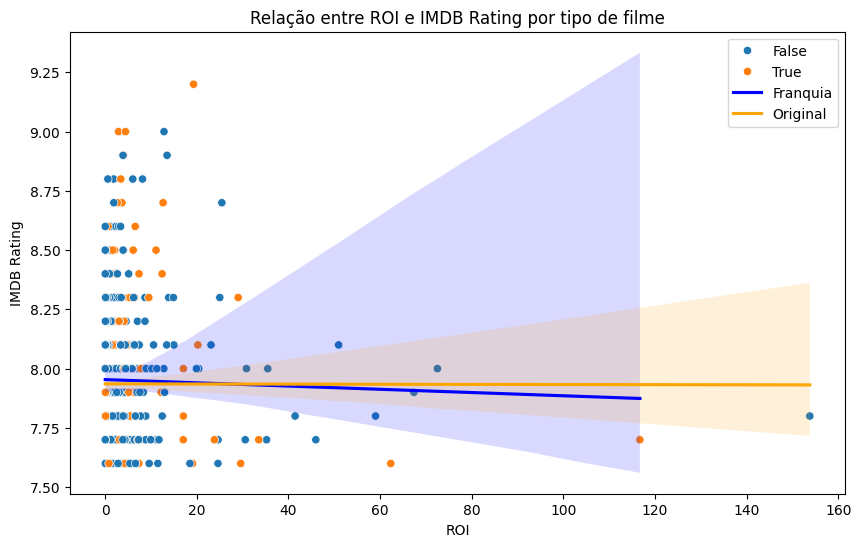

In [85]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="ROI", y="IMDB_Rating", hue="is_franchise")
sns.regplot(data=df_clean[df_clean["is_franchise"]==True], x="ROI", y="IMDB_Rating", scatter=False, color="blue", label="Franquia")
sns.regplot(data=df_clean[df_clean["is_franchise"]==False], x="ROI", y="IMDB_Rating", scatter=False, color="orange", label="Original")
plt.xlabel("ROI")
plt.ylabel("IMDB Rating")
plt.title("Relação entre ROI e IMDB Rating por tipo de filme")
plt.legend()
plt.show()

In [86]:
corr_franchise, p_franchise = spearmanr(df_clean[df_clean["is_franchise"]==True]["ROI"].dropna(),
                                        df_clean[df_clean["is_franchise"]==True]["IMDB_Rating"].dropna())
corr_original, p_original = spearmanr(df_clean[df_clean["is_franchise"]==False]["ROI"].dropna(),
                                      df_clean[df_clean["is_franchise"]==False]["IMDB_Rating"].dropna())

if p_franchise < 0.05:
    print(f"Franquia: Correlação = {corr_franchise:.2f}, p-valor = {p_franchise:.4f} Rejeitamos H0")
else:
    print(f"Franquia: Correlação = {corr_franchise:.2f}, p-valor = {p_franchise:.4f} Não rejeitamos H0")

if p_original < 0.05:
    print(f"Original: Correlação = {corr_original:.2f}, p-valor = {p_original:.4f} Rejeitamos H0")
else:
    print(f"Original: Correlação = {corr_original:.2f}, p-valor = {p_original:.4f} Não rejeitamos H0")

Franquia: Correlação = 0.11, p-valor = 0.1091 Não rejeitamos H0
Original: Correlação = -0.03, p-valor = 0.4684 Não rejeitamos H0


Pelo que podemos ver no gráfico e pelo teste de hipoteses que não há uma relação clara entre a nota de um filme e seu retorno financeiro, seja ele de franquia ou original. Filmes bem avaliados não garantem ROI alto, e os maiores sucessos financeiros aparecem em todas as faixas de nota, qualidade e sucesso financeiro nem sempre andam juntos.

## 3.7 - Efeito do Ano de Lançamento no IMDB Rating

Queremos saber se filmes mais recentes tendem a ter notas mais altas ou baixas no IMDB. Isso ajuda a verificar tendências de avaliação ao longo do tempo, além de capturar possíveis mudanças de padrão de produção e gosto do público.

Hipóteses que testaremos:

* H0: Não há relação entre Released_Year e IMDB_Rating.

* H1: Existe uma relação entre Released_Year e IMDB_Rating (filmes mais recentes têm notas diferentes dos antigos).

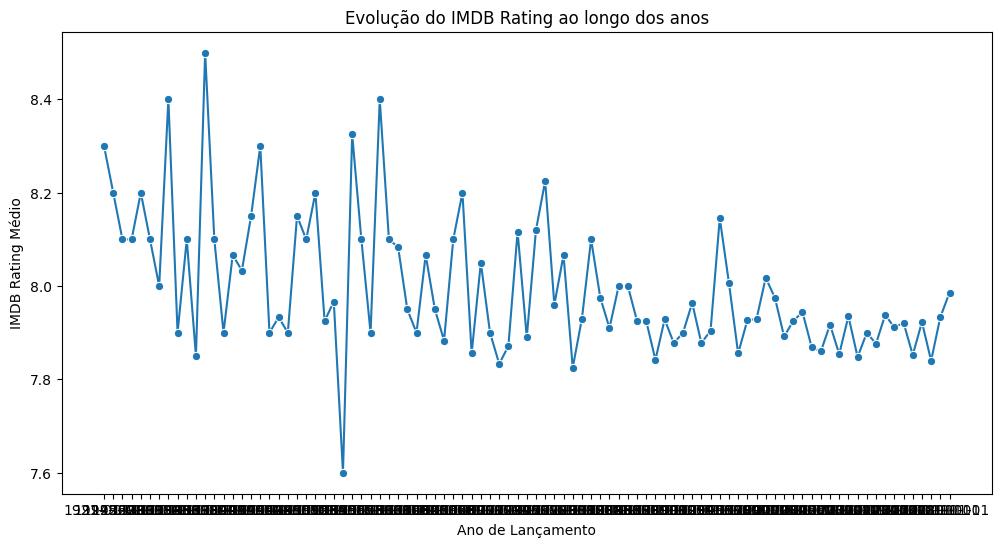

In [87]:
# Calcular a nota média por ano
df_yearly = df_clean.groupby("Released_Year")["IMDB_Rating"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_yearly, x="Released_Year", y="IMDB_Rating", marker="o")
plt.xlabel("Ano de Lançamento")
plt.ylabel("IMDB Rating Médio")
plt.title("Evolução do IMDB Rating ao longo dos anos")
plt.show()

O gráfico mostra que a nota média dos filmes no IMDb caiu um pouco ao longo dos anos, enquanto nos primeiros anos (1920-1950) a média ficava acima de 8,2, nas últimas décadas se estabilizou em torno de 7,9. Além disso, as avaliações eram mais instáveis no passado, com altos e baixos, enquanto recentemente a média anual tem se mantido mais estável.

In [88]:
df_clean["Released_Year"] = pd.to_datetime(df_clean["Released_Year"]).dt.year

corr, p_value = spearmanr(df_clean["Released_Year"], df_clean["IMDB_Rating"])

if p_value < 0.05:
    print(f"Correlação de Spearman = {corr:.2f}, p-valor = {p_value:.4f} → Rejeitamos H0: há relação significativa entre ano e IMDB Rating")
else:
    print(f"Correlação de Spearman = {corr:.2f}, p-valor = {p_value:.4f} → Não rejeitamos H0: não há relação significativa")

Correlação de Spearman = -0.16, p-valor = 0.0000 → Rejeitamos H0: há relação significativa entre ano e IMDB Rating


Podemos confirmar nossa hipótese obtida através da análise gráfica de que as notas estão decaindo ao longo doa anos.

## 3.8 - Efeito da Classificação Indicativa (Certificate) no IMDB Rating

Queremos saber aqui se a classificação indicativa pode influenciar a recepção crítica e do público. Por exemplo, filmes "A" (livre) podem ser mais voltados para toda a família, enquanto filmes "R" (restritos) podem atrair um público mais específico. Por isso queremos verificar se existe diferença estatisticamente significativa no IMDB Rating entre as categorias de Certificate.

Hipóteses que iremos testar:

* H0: Não há diferença significativa no IMDB Rating entre os diferentes Certificates.

* H1: Pelo menos uma categoria de Certificate apresenta IMDB Rating significativamente diferente.

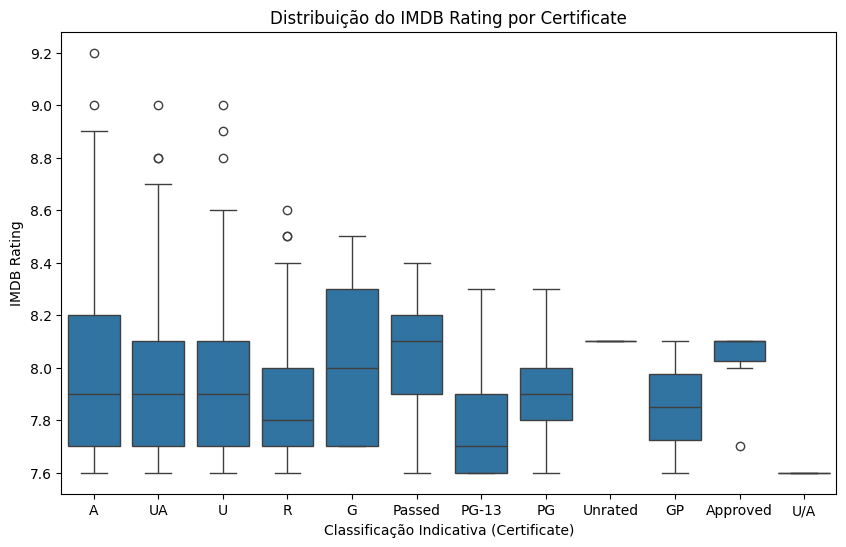

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean, x="Certificate", y="IMDB_Rating")
plt.title("Distribuição do IMDB Rating por Certificate")
plt.xlabel("Classificação Indicativa (Certificate)")
plt.ylabel("IMDB Rating")
plt.show()

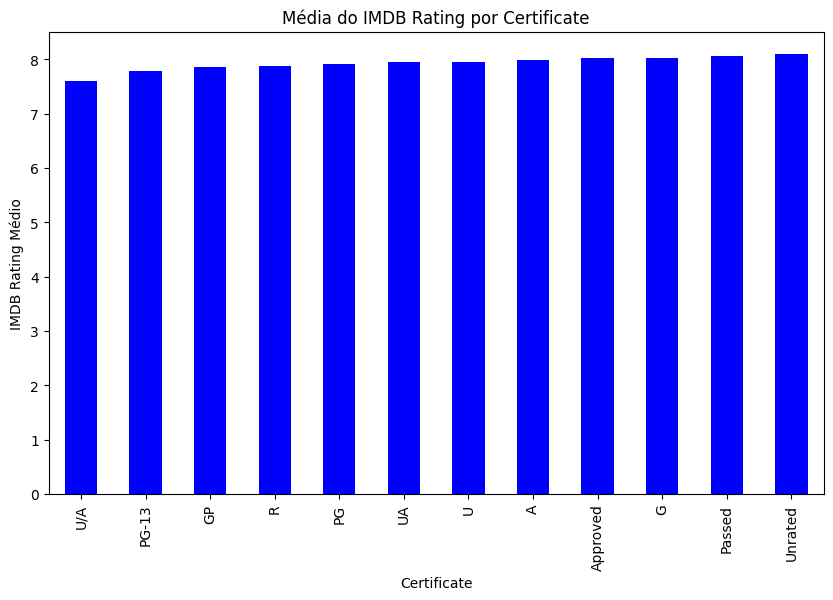

In [90]:
df_clean.groupby("Certificate")["IMDB_Rating"].mean().sort_values().plot(
    kind="bar", figsize=(10,6), color="blue"
)
plt.title("Média do IMDB Rating por Certificate")
plt.ylabel("IMDB Rating Médio")
plt.show()

Vemos nos gráficos que independente da classificação indicativa, os filmes costumam ter notas altas no IMDB. As medianas ficam bem próximas (entre 7.8 e 8.1), então não dá pra dizer que uma classificação tem qualidade melhor que outra. O que muda mais é a dispersão, algumas categorias como A, UA, U e R têm mais variação nas notas e aparecem com os outliers mais altos, mas no geral todas mantêm um padrão parecido de avaliação.


Vamos calcular a normalidade dos grupos, para sabermos se usaremos o teste ANOVA ou Kruskal.

In [91]:
for cert, group in df_clean.groupby("Certificate"):
    stat, p_value = shapiro(group["IMDB_Rating"])
    print(f"{cert}: W={stat:.3f}, p={p_value:.4f} -> {'Normal' if p_value>0.05 else 'Não normal'}")

A: W=0.906, p=0.0000 -> Não normal
Approved: W=0.634, p=0.0012 -> Não normal
G: W=0.842, p=0.0605 -> Normal
GP: W=nan, p=nan -> Não normal
PG: W=0.960, p=0.4445 -> Normal
PG-13: W=0.879, p=0.0007 -> Não normal
Passed: W=0.950, p=0.3173 -> Normal
R: W=0.907, p=0.0000 -> Não normal
U: W=0.927, p=0.0000 -> Não normal
U/A: W=nan, p=nan -> Não normal
UA: W=0.902, p=0.0000 -> Não normal
Unrated: W=nan, p=nan -> Não normal


A maioria das classes não seguem uma distribuição normal, logo usaremos o Kruskal.

In [92]:
groups = [group["IMDB_Rating"].dropna() for name, group in df.groupby("Certificate")]

# Primeiro checamos se todos são normais
normalidade = all(shapiro(group).pvalue > 0.05 for group in groups)

if normalidade:
    stat, p_value = f_oneway(*groups)
    teste = "ANOVA"
else:
    stat, p_value = kruskal(*groups)
    teste = "Kruskal-Wallis"

if p_value < 0.05:
    print(f"{teste}: Estatística={stat:.2f}, p={p_value:.4f} Rejeitamos H₀: há diferença significativa entre Certificates")
else:
    print(f"{teste}: Estatística={stat:.2f}, p={p_value:.4f} Não rejeitamos H₀: não há diferença significativa")

Kruskal-Wallis: Estatística=42.95, p=0.0002 Rejeitamos H₀: há diferença significativa entre Certificates


O teste de hipótese mais uma vez vai contra o que vimos no gráfico. Mais adiante, vamos aprofundar a análise com modelos de machine learning para entender melhor o quanto a classificação pode realmente impactar na nota do filme.

## 3.9 - Relação entre Número de Votos (No_of_Votes) e IMDB Rating

Buscamos agora tentar entender se filmes mais populares (com mais votos) tendem a ter notas diferentes no IMDb. 

A hipótese é que:

* Filmes com muitos votos podem ter uma nota mais representativa da opinião geral.

* Filmes com poucos votos podem ter maior variabilidade, influenciados por um público mais restrito.

* H0: Não existe correlação entre número de votos e IMDB Rating.

* H1: Existe correlação significativa entre número de votos e IMDB Rating.

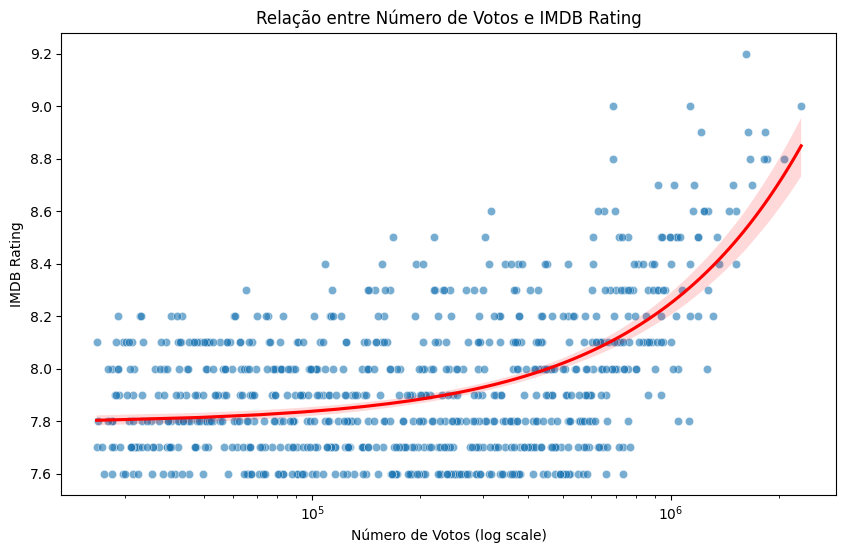

In [93]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="No_of_Votes", y="IMDB_Rating", alpha=0.6)
sns.regplot(data=df_clean, x="No_of_Votes", y="IMDB_Rating", scatter=False, color="red")
plt.xscale("log")
plt.xlabel("Número de Votos (log scale)")
plt.ylabel("IMDB Rating")
plt.title("Relação entre Número de Votos e IMDB Rating")
plt.show()

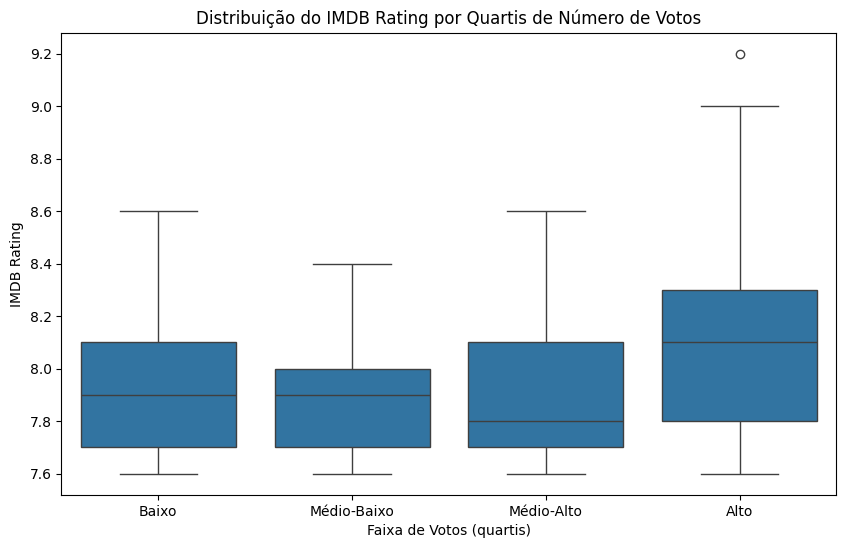

In [94]:
# Criar faixas de votos (quantis)
df["votes_bin"] = pd.qcut(df["No_of_Votes"], q=4, labels=["Baixo", "Médio-Baixo", "Médio-Alto", "Alto"])

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="votes_bin", y="IMDB_Rating")
plt.title("Distribuição do IMDB Rating por Quartis de Número de Votos")
plt.xlabel("Faixa de Votos (quartis)")
plt.ylabel("IMDB Rating")
plt.show()

O gráfico mostra que filmes com mais votos no IMDb tendem a ter notas um pouco mais altas. A linha de tendência sobe de leve, indicando que quanto maior a popularidade, melhor a percepção de qualidade. Esse efeito fica mais claro nos filmes com enorme número de votos, que geralmente têm notas mais concentradas em faixas altas, sugerindo um consenso positivo. Mas é bom mencionar que não é que muitos votos façam a nota subir, provavelmente, filmes bem avaliados atraem mais gente e, consequentemente, mais votos.

Vamos usar o teste de hipoteses de Spearman, pois ele não exige linearidade dos dados.

In [95]:
corr_s, p_s = spearmanr(df_clean["No_of_Votes"], df_clean["IMDB_Rating"])
print(f"Correlação de Spearman: r={corr_s:.3f}, p={p_s:.4f}")

if p_s < 0.05:
    print("Resultado: Rejeitamos H₀: Existe correlação significativa entre número de votos e IMDB Rating.")
else:
    print("Resultado: Não rejeitamos H₀: Não há evidência de correlação significativa.")

Correlação de Spearman: r=0.304, p=0.0000
Resultado: Rejeitamos H₀: Existe correlação significativa entre número de votos e IMDB Rating.


O teste confirma nossa hipotese visual, que a quantidade de avaliações feitas no filme, impactam sua nota final no IMDB.

## 3.10 - Relação entre tamanho do Resumo e IMDB Rating

Aqui a gente que saber se o tamanho do resumo do filme (overview) influencia na nota do IMDb.

Filmes com resumos mais longos podem dar mais contexto e atrair um público diferente.

* H0: Não existe correlação entre o comprimento do resumo (overview_len) e o IMDB Rating.

Filmes com resumos curtos podem ter descrições genéricas, talvez sem impactar tanto na percepção do público.

* H1: Existe correlação significativa entre o comprimento do resumo e o IMDB Rating.

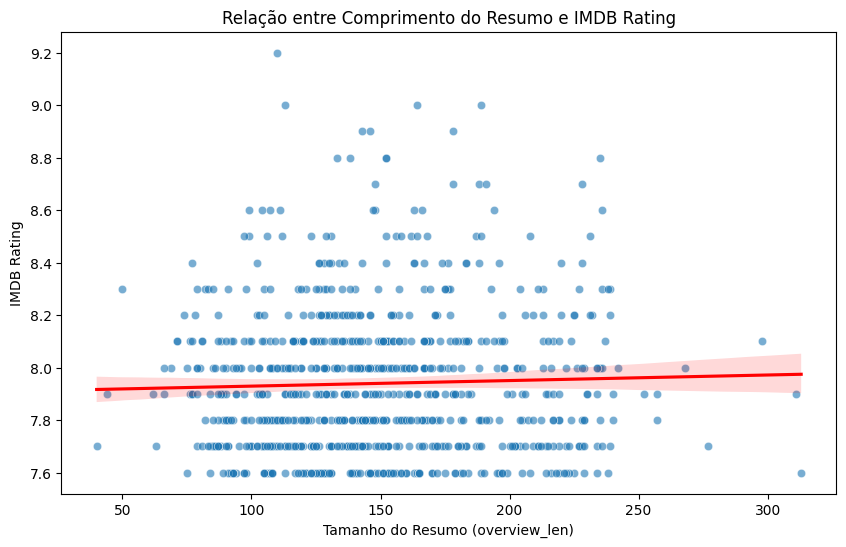

In [96]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="overview_len", y="IMDB_Rating", alpha=0.6)
sns.regplot(data=df_clean, x="overview_len", y="IMDB_Rating", scatter=False, color="red")
plt.xlabel("Tamanho do Resumo (overview_len)")
plt.ylabel("IMDB Rating")
plt.title("Relação entre Comprimento do Resumo e IMDB Rating")
plt.show()

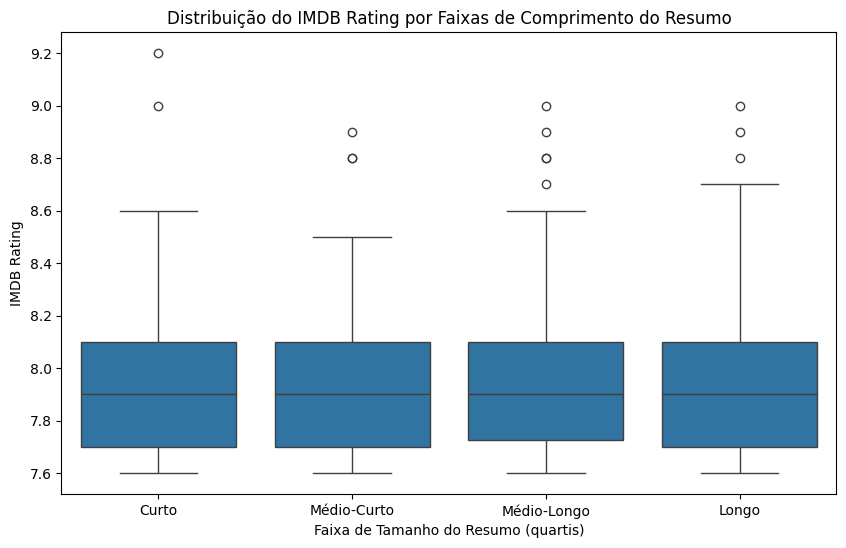

In [97]:
# Criar faixas (quartis)
df_clean["overview_bin"] = pd.qcut(df_clean["overview_len"], q=4, labels=["Curto", "Médio-Curto", "Médio-Longo", "Longo"])

plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean, x="overview_bin", y="IMDB_Rating")
plt.title("Distribuição do IMDB Rating por Faixas de Comprimento do Resumo")
plt.xlabel("Faixa de Tamanho do Resumo (quartis)")
plt.ylabel("IMDB Rating")
plt.show()

Visualmente não existe nenhuma relação entre o o tamanho do resumo do filme com suas notas IMDB, vamos confirmar ou negar isso com um teste de hipóteses.

In [98]:
corr_s, p_s = spearmanr(df_clean["overview_len"], df_clean["IMDB_Rating"])
print(f"Correlação de Spearman: r={corr_s:.3f}, p={p_s:.4f}")

if p_s < 0.05:
    print("Resultado: Rejeitamos H₀: Existe correlação significativa entre tamanho do resumo e IMDB Rating.")
else:
    print("Resultado: Não rejeitamos H₀: Não há evidência de correlação significativa.")

Correlação de Spearman: r=0.032, p=0.3620
Resultado: Não rejeitamos H₀: Não há evidência de correlação significativa.


Como visto na análise visual, não existe uma correlação entre as duas variáveis.

# 4 - EDA textual para a variável (Overview)

Vamos inicialmente preparar stopwords e funções de limpeza.

In [101]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ----------------- ---------------------- 5.5/12.8 MB 36.9 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 35.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [103]:
# garantir recursos do NLTK
nltk.download('stopwords'); nltk.download('vader_lexicon')
STOPWORDS = set(stopwords.words('english'))

# spaCy (lemmas)
nlp = spacy.load("en_core_web_sm", disable=["ner","parser"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\winic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\winic\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [104]:
def clean_text(s: str) -> str:
    if pd.isna(s): return ""
    s = s.lower()
    s = re.sub(r"[^a-z0-9\s']", " ", s) # remove pontuação não alfanumérica
    s = re.sub(r"\s+", " ", s).strip()
    return s

def lemmatize_doc(doc: str) -> str:
    sp = nlp(doc)
    toks = [t.lemma_ for t in sp if t.is_alpha and t.text not in STOPWORDS]
    return " ".join(toks)

In [105]:
# cria versão limpa/lematizada (se quiser acelerar, pule a lematização no primeiro ciclo)
df_clean["overview_clean"] = df_clean["Overview"].astype(str).map(clean_text).map(lemmatize_doc)

## 4.1 - Frequências e nuvem de palavras

Aqui queremos entender quais os temas recorrentes e diferenças por gênero.

Vamos usar TF-IDF , pois ele ajuda a identificar palavras informativas, e não apenas as mais frequentes. Por exemplo, “murder” é mais importante que “the” ou “and”.

In [106]:
# Frequências globais com TF-IDF (para ordenar termos informativos)
vec = TfidfVectorizer(max_features=5000, ngram_range=(1,2), min_df=3, max_df=0.8)
X = vec.fit_transform(df_clean["overview_clean"])
idf = dict(zip(vec.get_feature_names_out(), vec.idf_))
top_terms = sorted(idf.items(), key=lambda x: -x[1])[:30]  # termos + "raros"/informativos
pd.DataFrame(top_terms, columns=["term","idf"]).head(15)

,term,idf
0,abandon,6.287004
1,ability,6.287004
2,abuse,6.287004
3,accept,6.287004
4,activist,6.287004
5,actor,6.287004
6,actress,6.287004
7,adolf,6.287004
8,adolf hitler,6.287004
9,advisor,6.287004


Aqui vamos criar uma WordCloud com todos os resumos juntos. A nuvem de palavras mostra de forma visual quais termos aparecem mais, quanto maior a palavra, mais frequente ela é, dando uma ideia rápida dos temas principais dos filmes.

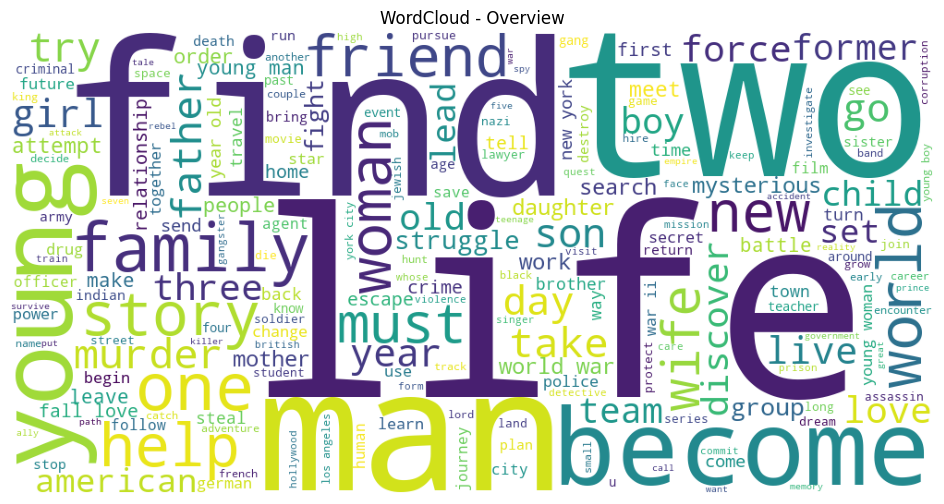

In [107]:
# Nuvem de palavras (global)
text_all = " ".join(df_clean["overview_clean"].tolist())
wc = WordCloud(width=1000, height=500, background_color="white").generate(text_all)
plt.figure(figsize=(12,6)); plt.imshow(wc); plt.axis("off"); plt.title("WordCloud - Overview"); plt.show()

Vamos agrupar os filmes por gênero e calcular a média do TF-IDF de cada palavra dentro de cada grupo. Com isso, podemos a identificar quais termos são mais representativos de cada gênero, por exemplo, “heist” e “detective” aparecem mais em Crime, enquanto “space” e “battle” são comuns em Action.

In [108]:
# Palavras destacadas por gênero (média TF-IDF por classe)
genre_means = {}
for g, sub in df_clean.groupby("Main_Genre"):
    if len(sub) < 10: continue
    Xg = vec.transform(sub["overview_clean"])
    genre_means[g] = np.asarray(Xg.mean(axis=0)).ravel()

In [109]:
genre_top = {}
terms = vec.get_feature_names_out()
for g, arr in genre_means.items():
    idx = arr.argsort()[::-1][:15]
    genre_top[g] = [terms[i] for i in idx]

In [110]:
pd.DataFrame.from_dict(genre_top, orient="index").T

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Horror
0,must,world,young,story,two,murder,life,two
1,one,find,girl,american,life,police,woman,convinced
2,man,friend,boy,life,day,crime,man,become convinced
3,fight,astronaut,toy,become,friend,young,young,child become
4,force,magical,set,lead,man,two,find,haunt
5,former,search,great,ii,young,life,love,old
6,team,encounter,world,year,love,man,two,house
7,assassin,across,princess,man,find,detective,war,run
8,war,school,must,world,fall,investigate,world,soon
9,find,trip,old,true story,new,family,new,young


Com nossa análise, podemos ver que cada gênero de filme tem temas e vocabulário próprios, ação, aventura e animação focam em combates, missões e exploração. Já drama, crime e terror lidam com relações humanas, conflitos e tensão, comédias mostram situações leves e amorosas, biografias contam histórias de vida e conquistas. Algumas palavras, como “young”, “man” e “life”, aparecem em vários gêneros, refletindo temas universais de personagens e até de crescimento.

## 4.2 - Classificar Main_Genre a partir do Overview

Agora estamos exclusivamente em busca da resposta de uma das perguntas do desafio, “é possível inferir o gênero do filme pelo resumo?”.

Para isso iremos testar as hipoteses:

* H0 = texto não contém informação suficiente

* H1 = contém (modelo supera o acaso)

Agora vamos pegar só os filmes com gênero definido e resumos preenchidos. O `X_text` vai ser nosso input (os resumos) e `y` o alvo (o gênero). Dividimos os dados em treino (80%) e teste (20%).

Assim garantimos que o modelo aprenda de forma justa, sem usar dados vazios ou sofrer com desequilíbrios entre os gêneros.

In [111]:
# alvo e split
mask = df_clean["Main_Genre"].notna() & df_clean["overview_clean"].str.len().gt(0)
X_text = df_clean.loc[mask, "overview_clean"].values
y = df_clean.loc[mask, "Main_Genre"].values

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42
)

Nesse passo vamor criar um pipeline que primeiro transforma os textos em números com TF-IDF e depois vai aplicar um classificador LinearSVC (SVM linear).

* `ngram_range=(1,2)`: usamos palavras isoladas e pares de palavras para capturar mais contexto.
* `min_df=3` e `max_df=0.8`: removemos palavras muito raras ou muito comuns.
* `class_weight="balanced"`: ajusta os pesos para lidar com gêneros desbalanceados.

Como o LinearSVC funciona bem com textos que têm muitas features, como acontece com TF-IDF, e o pipeline facilita fazer tudo em um passo só, que será transformar os dados e treinar o modelo.

In [113]:
# Pipeline: TF-IDF + classificador linear (robusto p/ texto)
clf = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), min_df=3, max_df=0.8)),
    ("clf", LinearSVC(class_weight="balanced", random_state=42))
])
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=3, ngram_range=(1, 2))),
                ('clf', LinearSVC(class_weight='balanced', random_state=42))])

Vamos usar o modelo para prever os gêneros no conjunto de teste e mostramos métricas detalhadas como precision, recall e F1-score, além da matriz de confusão, que irá nos mostrar quais gêneros foram confundidos.

Fazendo isso teremos ajuda a ver como o modelo está se saindo, entendendo onde acerta e onde erra. Com a matriz de confusão sendo útil na identificação de padrões de erro, por exemplo, quando o modelo confunde Action com Adventure.

              precision    recall  f1-score   support

      Action       0.25      0.30      0.27        23
   Adventure       0.44      0.70      0.54        10
   Animation       0.30      0.27      0.29        11
   Biography       0.20      0.27      0.23        11
      Comedy       0.24      0.21      0.23        28
       Crime       0.25      0.30      0.27        20
       Drama       0.56      0.38      0.45        53
      Family       0.00      0.00      0.00         0
   Film-Noir       0.00      0.00      0.00         1
      Horror       0.00      0.00      0.00         1
     Western       0.00      0.00      0.00         0

    accuracy                           0.33       158
   macro avg       0.20      0.22      0.21       158
weighted avg       0.36      0.33      0.34       158



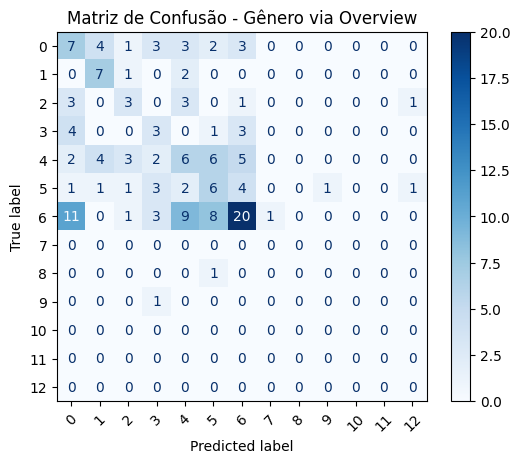

In [114]:
# Avaliação
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=np.unique(y))).plot(
    xticks_rotation=45, cmap="Blues", values_format='d'
)
plt.title("Matriz de Confusão - Gênero via Overview")
plt.show()

Agora vamos criar um modelo simples que sempre prevê o gênero mais comum e comparamos a acurácia do nosso modelo real com essa baseline.

Essa baseline serve para checar se o modelo realmente aprendeu algo. Se o LinearSVC tiver acurácia bem maior, quer dizer que os resumos realmente trazem informação sobre o gênero.

In [115]:
# Baseline para comparação
dummy = DummyClassifier(strategy="most_frequent")
pipe_dummy = Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,2), min_df=3, max_df=0.8)), ("dum", dummy)])
pipe_dummy.fit(X_train, y_train)
base_acc = pipe_dummy.score(X_test, y_test)
model_acc = clf.score(X_test, y_test)
print(f"Acurácia baseline (gênero mais comum): {base_acc:.3f}")
print(f"Acurácia modelo (LinearSVC): {model_acc:.3f}")

Acurácia baseline (gênero mais comum): 0.335
Acurácia modelo (LinearSVC): 0.329


Agora queremos validar estatisticamente se o desempenho excede o acaso ou não.

In [116]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score, perm_scores, pvalue = permutation_test_score(
    clf, X_text, y, scoring="f1_macro", cv=cv, n_permutations=200, n_jobs=-1, random_state=42
)
print(f"F1_macro (CV real): {score:.3f} | p-valor (permutações): {pvalue:.4f}")

if pvalue < 0.05:
    print("Rejeitamos H₀: o desempenho é maior que o esperado ao acaso.")
else:
    print("Não rejeitamos H₀: não há evidência de desempenho acima do acaso.")

F1_macro (CV real): 0.222 | p-valor (permutações): 0.0050
Rejeitamos H₀: o desempenho é maior que o esperado ao acaso.


O objetivo era verificar se os resumos dos filmes davam informação suficiente para identificar o gênero principal usando TF-IDF e LinearSVC. Inicialmente, o modelo não superou a baseline de sempre prever o gênero mais comum (acurácia de 32,9% contra 33,5%), com F1-scores baixos, principalmente para gêneros raros, sugerindo que os resumos eram genéricos e pouco discriminativos. Porém, ao aplicar o teste de permutação, obtivemos um p-valor de 0,005, permitindo rejeitar a hipótese nula. Isso indica que, apesar do desempenho limitado e do F1\_macro baixo (0,222), o modelo consegue capturar um sinal estatisticamente significativo nos resumos, mostrando que o texto realmente contém informação relevante sobre o gênero.

Para melhorar nosso modelo, poderiamos tentar algumas estratégias, como agrupar gêneros raros para reduzir o desbalanceamento, aumentar o tamanho do dataset para cada gênero, usar modelos de NLP mais avançados como BERT ou embeddings pré-treinados que capturam melhor o contexto semântico, e combinar as informações textuais com dados estruturados como duração, número de votos e ROI. Essas melhorias podem ajudar o modelo a identificar padrões mais claros e aumentar o desempenho geral.

## 4.3 - Interpretabilidade, os termos que mais pesam por gênero

Agora queremos descobrir quais palavras (ou n-grams) “puxam” a previsão para cada gênero, ou seja, buscamos entender o vocabulário característico que o modelo usa para decidir uma classe.

O pipeline irá pegar os textos, transformar em vetores TF-IDF e treinar uma regressão logística. O que queremos é usar esse modelo que é fácil de interpretar, já que cada coeficiente mostra como uma palavra influencia na chance de um gênero aparecer. Além disso, usamos `class_weight="balanced"` para lidar melhor com o desbalanceamento entre as classes.

In [117]:
# re-treinar com LogisticRegression One-vs-Rest (coeficientes interpretáveis)
interp = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), min_df=3, max_df=0.8)),
    ("lr", LogisticRegression(max_iter=500, n_jobs=-1, class_weight="balanced"))
])
interp.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=3, ngram_range=(1, 2))),
                ('lr',
                 LogisticRegression(class_weight='balanced', max_iter=500,
                                    n_jobs=-1))])

Aqui a gente pega o `tfidf` (que guarda o vocabulário e a ordem das features) e o `lr` (modelo treinado). O `terms` é a lista de todas as palavras e n-grams na mesma ordem da matriz TF-IDF, e `classes` são os gêneros. Fazemos isso porque precisamos ligar cada peso do modelo à palavra correspondente para conseguir interpretar os coeficientes.

In [118]:
tfidf = interp.named_steps["tfidf"]
lr = interp.named_steps["lr"]
terms = np.array(tfidf.get_feature_names_out())
classes = lr.classes_

Aqui a gente pega os coeficientes do modelo para um gênero específico, ordena do maior pro menor e mostra as k palavras com maior peso. As que têm coeficientes mais altos são as que mais “puxam” a previsão pra aquele gênero. E, se quiser ver as que jogam contra a classe, é só olhar os coeficientes mais negativos.

In [119]:
def top_terms_for_class(cidx, k=15):
    coefs = lr.coef_[cidx]
    idx = np.argsort(coefs)[::-1][:k]
    return list(zip(terms[idx], coefs[idx]))

In [120]:
for i, c in enumerate(classes):
    print(f"\nTop termos para classe: {c}")
    for term, weight in top_terms_for_class(i, 12):
        print(f"  {term:25s} {weight: .3f}")


Top termos para classe: Action
  fight                      0.694
  must                       0.674
  army                       0.632
  mission                    0.612
  mutant                     0.592
  assassin                   0.559
  team                       0.551
  agent                      0.545
  warrior                    0.529
  former                     0.523
  save                       0.502
  avenger                    0.501

Top termos para classe: Adventure
  magical                    0.890
  astronaut                  0.827
  encounter                  0.821
  mountain                   0.813
  trip                       0.806
  true                       0.725
  roman                      0.712
  gold                       0.684
  quest                      0.671
  undergo                    0.644
  possession                 0.611
  prospector                 0.594

Top termos para classe: Animation
  girl                       1.138
  young                

Vamos transformar o que a gente cconseguiu em gráficos de barras horizontais, no estilo de feature importance para cada classe.

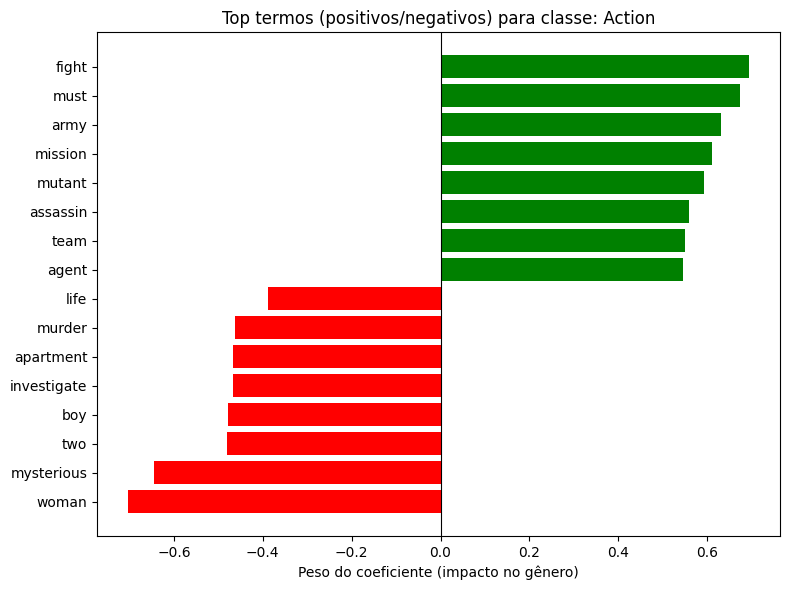

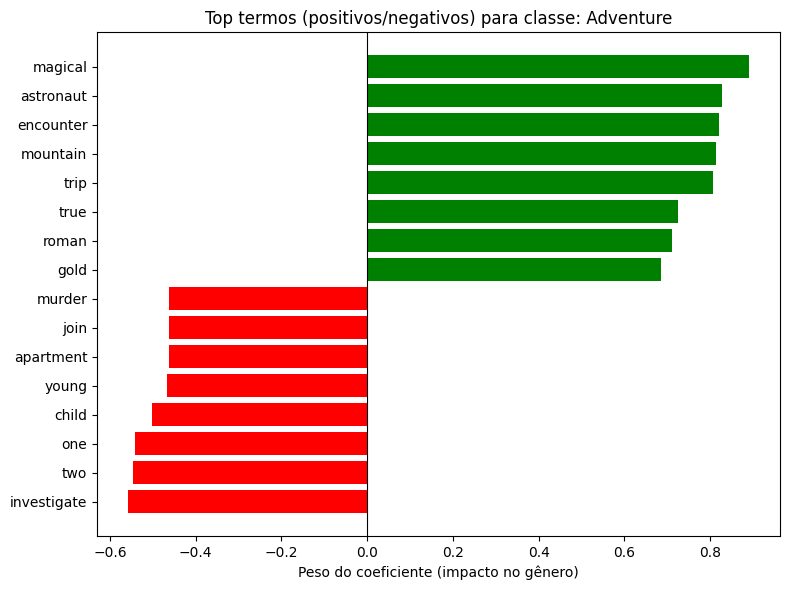

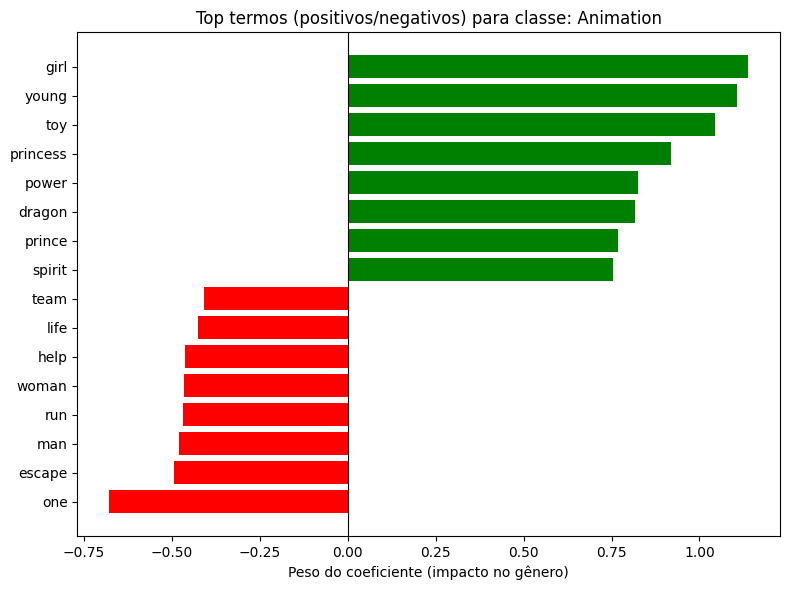

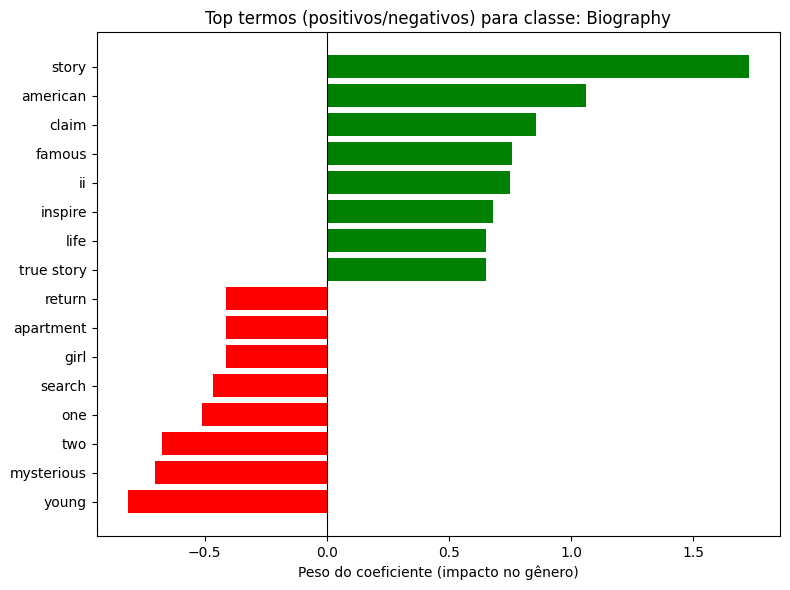

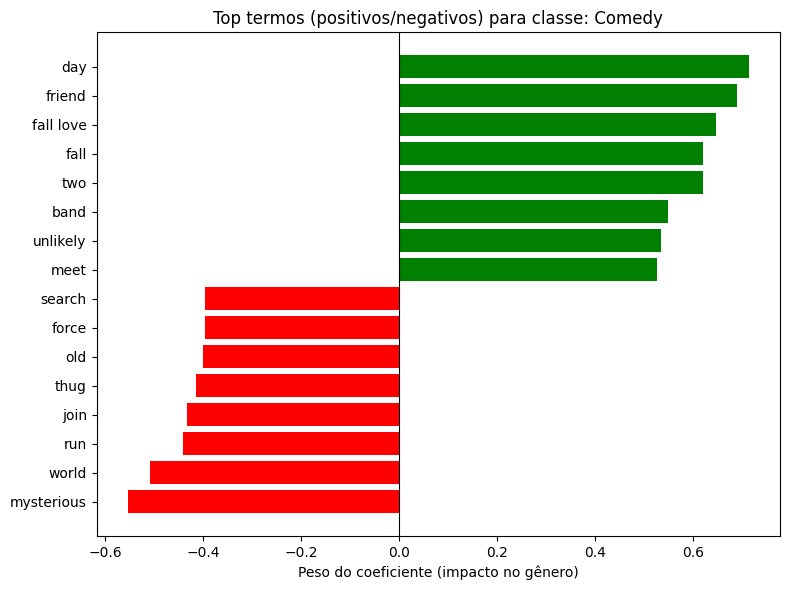

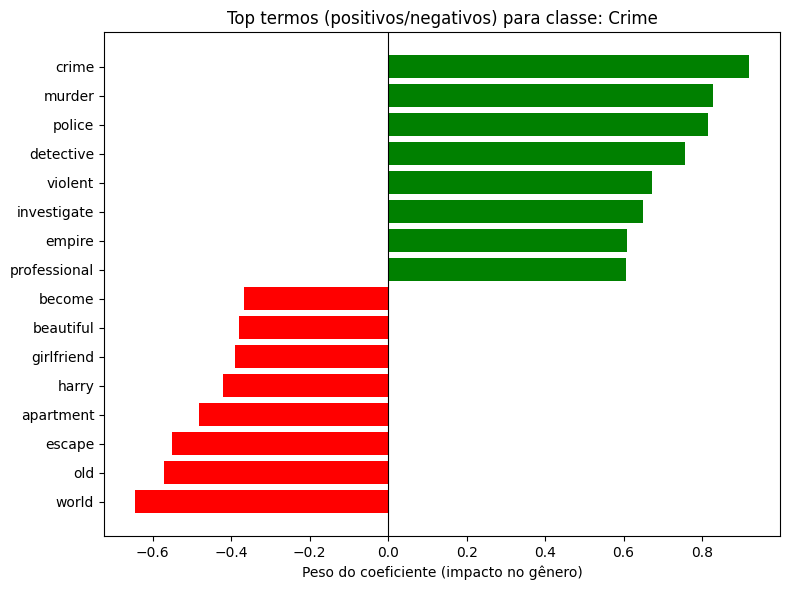

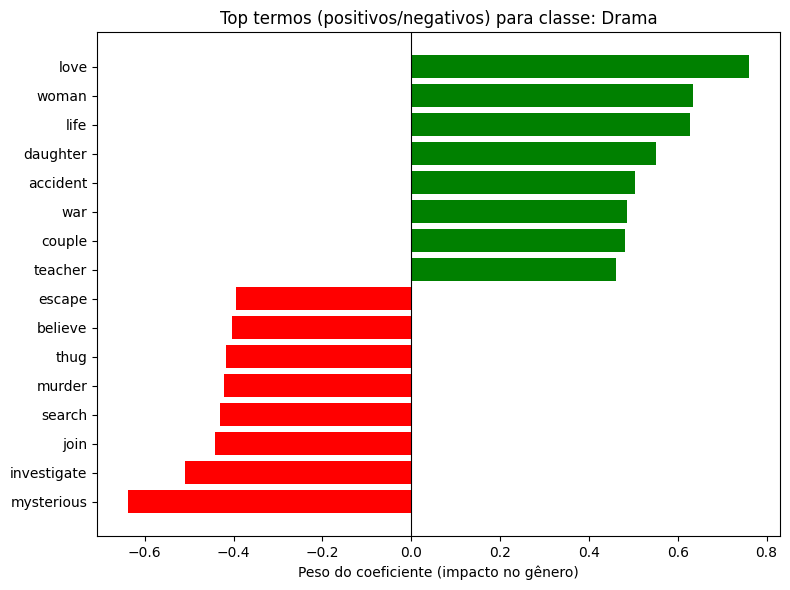

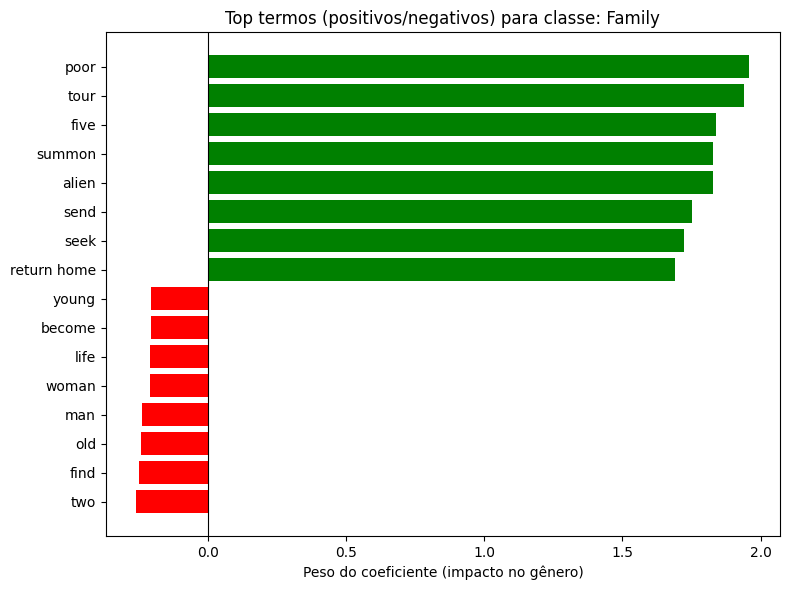

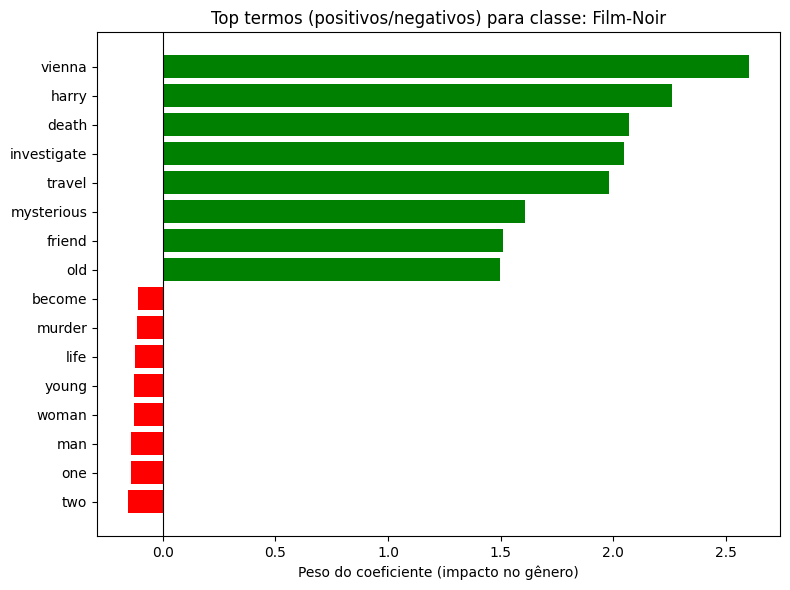

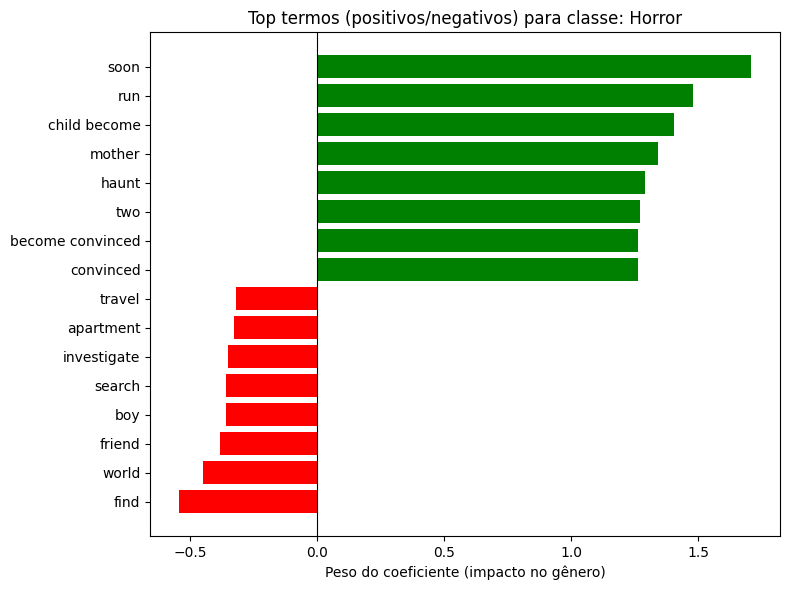

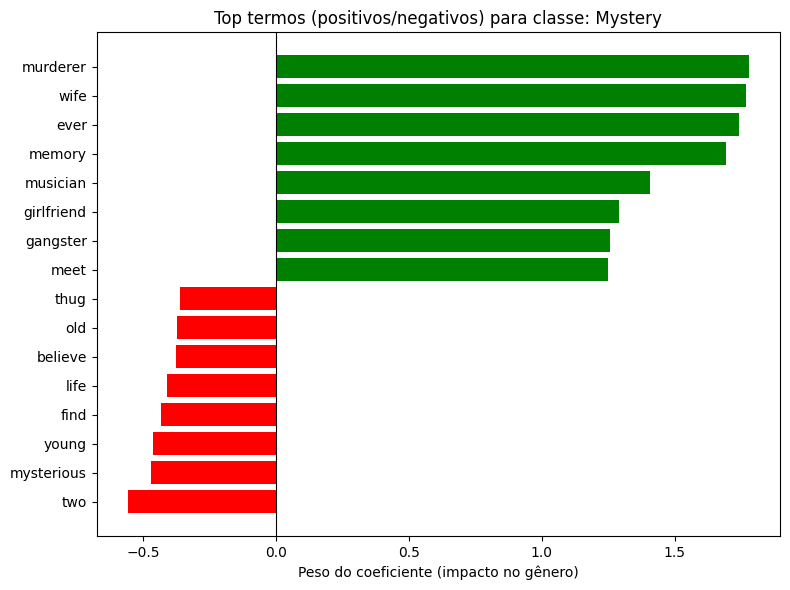

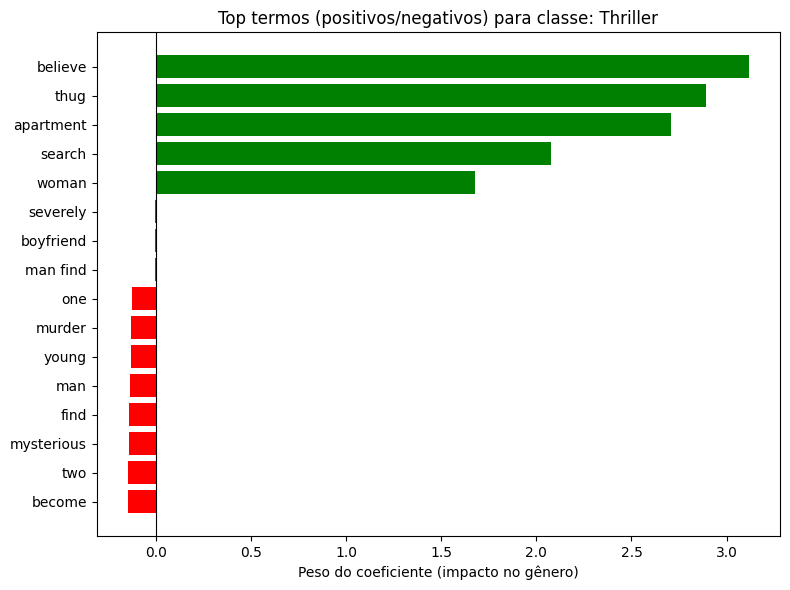

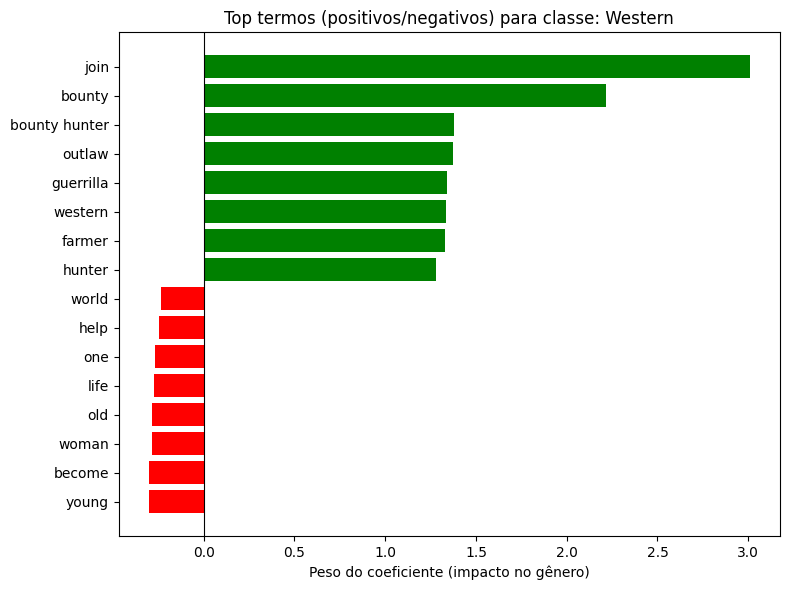

In [121]:
def plot_top_terms_for_class(cidx, k=8):
    """Plota os k termos mais positivos e negativos para uma classe."""
    coefs = lr.coef_[cidx]
    idx_pos = np.argsort(coefs)[-k:]          # maiores pesos (positivos)
    idx_neg = np.argsort(coefs)[:k]           # menores pesos (negativos)
    
    terms_pos = terms[idx_pos]
    terms_neg = terms[idx_neg]
    
    weights_pos = coefs[idx_pos]
    weights_neg = coefs[idx_neg]
    
    # juntar para plot
    all_terms = list(terms_neg) + list(terms_pos)
    all_weights = list(weights_neg) + list(weights_pos)
    colors = ["red"]*k + ["green"]*k
    
    plt.figure(figsize=(8,6))
    plt.barh(all_terms, all_weights, color=colors)
    plt.axvline(0, color="black", linewidth=0.8)
    plt.title(f"Top termos (positivos/negativos) para classe: {classes[cidx]}")
    plt.xlabel("Peso do coeficiente (impacto no gênero)")
    plt.tight_layout()
    plt.show()

# gerando gráficos para todas as classes
for i, c in enumerate(classes):
    plot_top_terms_for_class(i, k=8)

Ao análisar o gráfico do gênero Action podemos ver quais palavras mais influenciam na hora de classificar um filme como “Ação”. Os termos com maior peso positivo estão ligados a combate, missões e trabalho em equipe, como *fight*, *must*, *army* e *mission*, que são fortes indicadores desse gênero. Já os termos com peso negativo, como *woman*, *mysterious*, *boy* e *investigate*, aparecem mais em filmes de drama ou mistério e reduzem a chance de o filme ser classificado como ação. Logo, o modelo reconhece filmes de ação principalmente por palavras que remetem a confrontos e missões, diferenciando-os daqueles que trazem elementos mais dramáticos ou de investigação.

Não vou me aprofundar na análise dos outros gÇneros para economizar tempo, mas a lógica segue a mesma.

## 4.4 - Tópicos nos resumos e relação com IMDB/ROI

Agora queremos identificar temas ocultos nos resumos dos filmes que nem sempre correspondem aos gêneros oficiais, e ver como esses tópicos se relacionam com a nota do IMDb e o ROI, trazendo insights tanto editoriais quanto de negócio.

A seguir transformaremos os resumos em uma matriz TF-IDF, que dá mais peso a palavras informativas e menos às muito comuns. Isso ajuda a destacar termos discriminativos para modelos de tópicos. Usaremos `min_df=3` para ignorar palavras muito raras, `max_df=0.9` para remover as muito frequentes, e `ngram_range=(1,2)` para capturar tanto palavras isoladas quanto pares de palavras, como "true story".

In [122]:
# TF-IDF focado em tópicos
tfidf_topic = TfidfVectorizer(max_features=7000, min_df=3, max_df=0.9, ngram_range=(1,2))
X_topics = tfidf_topic.fit_transform(df_clean["overview_clean"])

Vamos agora fatorar a matriz TF-IDF em W e H para obter k tópicos interpretáveis. W mostra a força de cada tópico em cada documento, e H indica a importância de cada palavra em cada tópico. A escolha do número de tópicos (k) é importante e deve ser testada para encontrar a melhor.

In [123]:
# NMF
k = 8  # nº de tópicos; ajuste e compare coesão
nmf = NMF(n_components=k, random_state=42)
W = nmf.fit_transform(X_topics)  # docs x topics
H = nmf.components_               # topics x terms
terms = np.array(tfidf_topic.get_feature_names_out())

Vamos selecionar as palavras e bigrams com maior peso em cada tópico para entender seu tema. Essa lista servirá como descrição semântica, ajudando a nomear o tópico e identificar seu conteúdo, como por exemplo “space, battle” indicando sci-fi ou ação.

In [124]:
# Top palavras por tópico
for t in range(k):
    idx = np.argsort(H[t])[::-1][:12]
    print(f"\nTópico {t}: " + ", ".join(terms[idx]))


Tópico 0: find, father, murder, son, go, try, family, wife, friend, must, mysterious, daughter

Tópico 1: war, world, world war, ii, war ii, german, jewish, english, army, nazi, lead, occupy

Tópico 2: new, york, new york, city, york city, work, movie, cop, discover, frank, worker, go

Tópico 3: love, fall, fall love, become, human, become human, girl, friend, difference, relationship, money, ill

Tópico 4: young, man, woman, young man, become, young woman, mother, one, journey, world, together, break

Tópico 5: year, old, year old, boy, school, family, old girl, girl, student, high, home, house

Tópico 6: life, story, day, live, tell, age, angeles, los, los angeles, four, street, discover

Tópico 7: two, woman, help, child, team, battle, become, friendship, con, soldier, ultimate, two man


A partir daqui vamos comparar as distribuições de IMDB e ROI entre os tópicos usando boxplots para ver se certos temas tendem a ter notas ou retornos diferentes, queremos gerar insights editoriais e de negócio.

In [125]:
# Atribuir tópico dominante por filme
df_topics = df_clean.copy()
df_topics["topic_dom"] = W.argmax(axis=1)

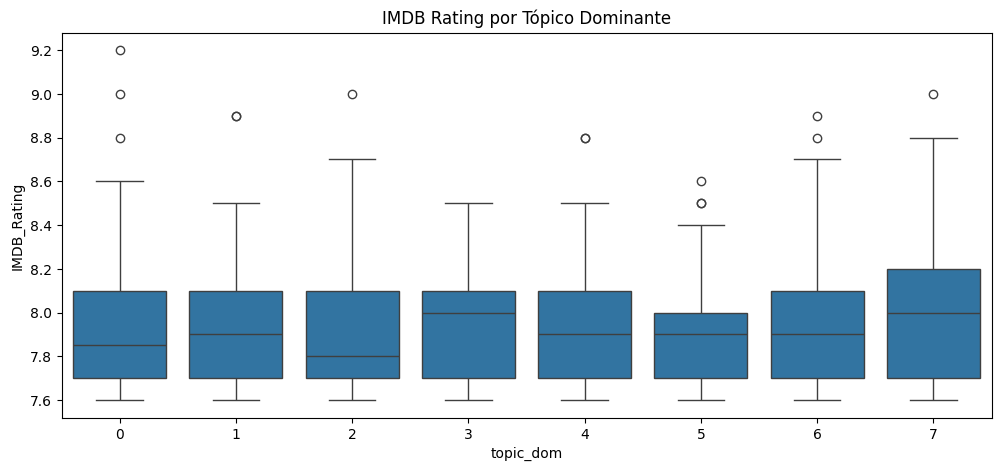

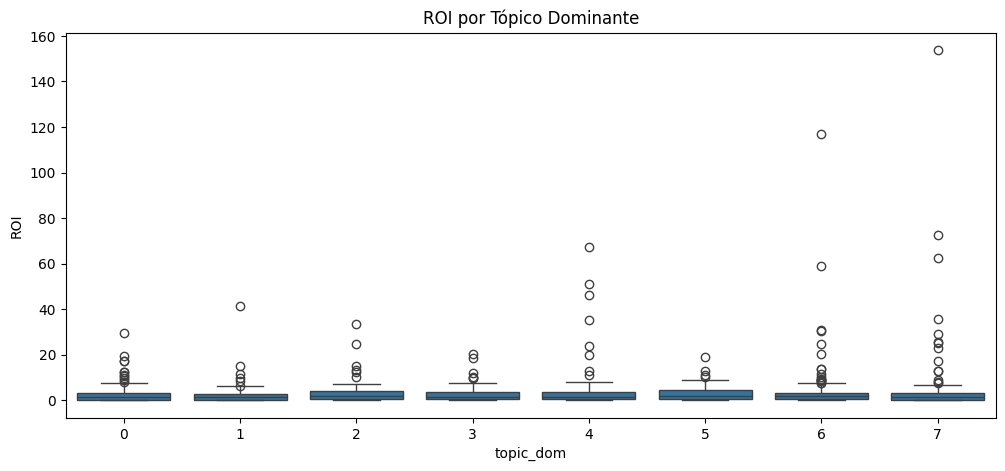

In [126]:
# Comparar IMDB/ROI por tópico dominante
plt.figure(figsize=(12,5))
sns.boxplot(data=df_topics, x="topic_dom", y="IMDB_Rating")
plt.title("IMDB Rating por Tópico Dominante"); plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=df_topics, x="topic_dom", y="ROI")
plt.title("ROI por Tópico Dominante"); plt.show()

Pelos gráficos, podemos ver que as notas médias no IMDB são altas para todos os tópicos, mostrando que a qualidade percebida pelo público não depende do tipo de história. Já o ROI é baixo na maioria dos filmes, mas alguns tópicos se destacam com potencial para retornos maiores, especialmente os tópicos 6 (com palavras como *life*, *story*, *los angeles*) e 7 (*battle*, *soldier*, *team*), que apresentam os outliers de ROI mais altos.

In [127]:
# Agrupar o ROI por tópico dominante
groups = [g["ROI"].dropna() for _, g in df_topics.groupby("topic_dom")]
# Teste Kruskal-Wallis
stat, p = kruskal(*groups)
# Imprimir resultado com interpretação
print(f"Kruskal-Wallis ROI ~ tópico: H={stat:.2f}, p={p:.4f}")

if p < 0.05:
    print("Rejeitamos H₀: há diferença significativa do ROI entre os tópicos.")
else:
    print("Não rejeitamos H₀: não há evidência de diferença significativa do ROI entre os tópicos.")

Kruskal-Wallis ROI ~ tópico: H=7.99, p=0.3339
Não rejeitamos H₀: não há evidência de diferença significativa do ROI entre os tópicos.


In [128]:
# Agrupar IMDB por tópico dominante
groups = [g["IMDB_Rating"].dropna() for _, g in df_topics.groupby("topic_dom")]
# Teste Kruskal-Wallis
stat, p = kruskal(*groups)
# Imprimir resultado com interpretação
print(f"Kruskal-Wallis IMDB ~ tópico: H={stat:.2f}, p={p:.4f}")

if p < 0.05:
    print("Rejeitamos H₀: há diferença significativa de IMDB entre os tópicos.")
else:
    print("Não rejeitamos H₀: não há evidência de diferença significativa de IMDB entre os tópicos.")

Kruskal-Wallis IMDB ~ tópico: H=6.00, p=0.5403
Não rejeitamos H₀: não há evidência de diferença significativa de IMDB entre os tópicos.


Aqui com os testes confirmamos que não existe influencia dos tópicos com a nota IMDB e ROI, apenas em casos extremos onde temos a presença de outliers.

## 4.5 - Overview em franquias

Será que filmes de franquia possuem sinopses maiores (mais detalhadas) ou menores (mais diretas)?

Para essa análise, vamos testar algumas hipóteses:

* H0: O tamanho médio da sinopse é igual para filmes de franquia e não franquia.

* H1: O tamanho médio da sinopse difere entre franquias e não franquias.

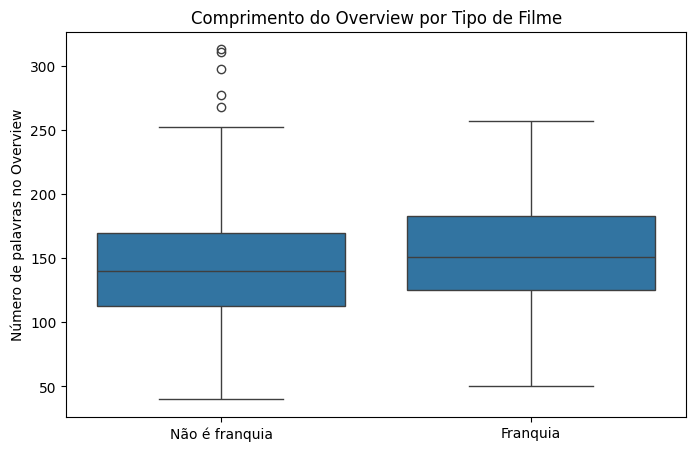

In [129]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x="is_franchise", y="overview_len")
plt.xticks([0,1], ["Não é franquia", "Franquia"])
plt.title("Comprimento do Overview por Tipo de Filme")
plt.ylabel("Número de palavras no Overview")
plt.xlabel("")
plt.show()

In [130]:
franchise_len = df_clean[df_clean["is_franchise"]==True]["overview_len"]
non_franchise_len = df_clean[df_clean["is_franchise"]==False]["overview_len"]

stat, p = ttest_ind(franchise_len, non_franchise_len, equal_var=False, nan_policy="omit")
if p < 0.05:
    print(f"Rejeitamos H₀: diferença significativa (p={p:.4f})")
else:
    print(f"Não rejeitamos H₀: sem diferença significativa (p={p:.4f})")

Rejeitamos H₀: diferença significativa (p=0.0128)


Vemos que os filmes de franquia costumam ter overviews mais longos que os originais, sugerindo que os estúdios dão mais detalhes para reforçar o enredo da saga. Essa diferença, embora sutil, foi confirmada pelo teste de hipóteses, que apontou significância estatística.

## 4.6 - Palavras-chave mais comuns em franquias vs não franquias

Uma idéia que me veio a cabeça é se em franquias se usam mais termos como hero, battle, war, return, saga, enquanto filmes independentes usam palavras outras palavras, será que mudam algo?

Aqui usamos o **CountVectorizer** para montar um vocabulário com as 50 palavras mais relevantes, ignorando as stopwords em inglês. A ideia é simplificar e destacar as palavras mais frequentes em cada grupo, para assim facilitar a visualização.

In [131]:
vec = CountVectorizer(stop_words="english", max_features=50)

Aqui aplicamos o **fit\_transform** em cada grupo (franquias e não franquias) para contar as palavras mais usadas. Gerando um ranking local de termos em cada conjunto.

In [132]:
franchise_words = vec.fit_transform(df_clean[df_clean["is_franchise"]==True]["overview_clean"])
non_franchise_words = vec.fit_transform(df_clean[df_clean["is_franchise"]==False]["overview_clean"])

Aqui iremos somar as ocorrências das palavras, e organizar em DataFrames, usaremos **sns.barplot** para mostrar as mais frequentes. O objetivo é destacar visualmente as diferenças de vocabulário entre filmes de franquias e não-franquias.

In [133]:
franchise_counts = np.asarray(franchise_words.sum(axis=0)).ravel()
non_franchise_counts = np.asarray(non_franchise_words.sum(axis=0)).ravel()

franchise_top = pd.DataFrame({"word": vec.get_feature_names_out(), "count": franchise_counts}).sort_values("count", ascending=False).head(15)
non_franchise_top = pd.DataFrame({"word": vec.get_feature_names_out(), "count": non_franchise_counts}).sort_values("count", ascending=False).head(15)

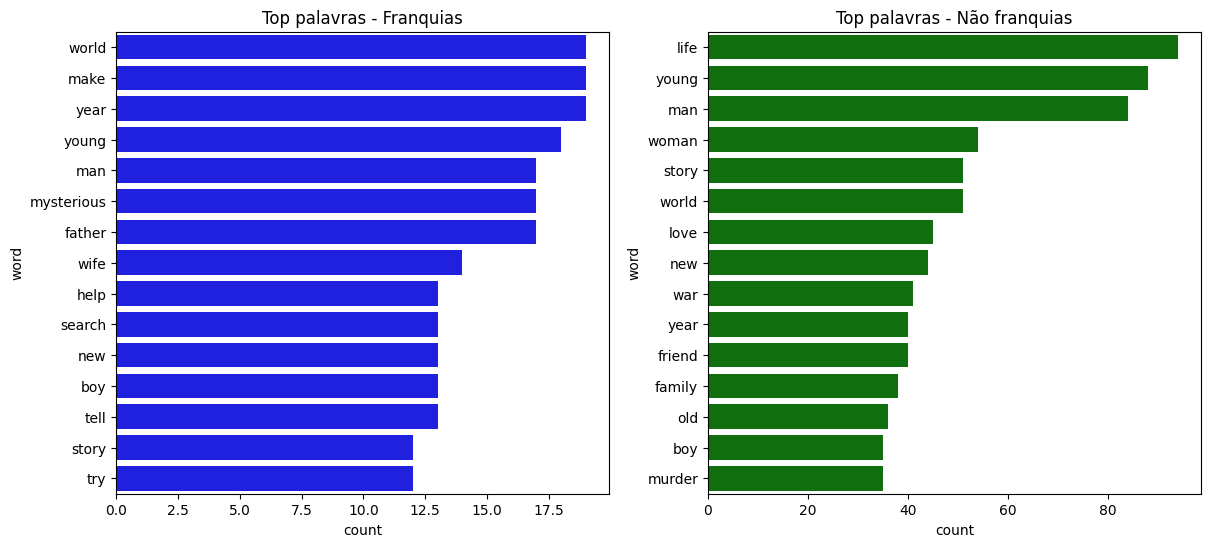

In [134]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
sns.barplot(data=franchise_top, x="count", y="word", ax=axes[0], color="blue")
axes[0].set_title("Top palavras - Franquias")
sns.barplot(data=non_franchise_top, x="count", y="word", ax=axes[1], color="green")
axes[1].set_title("Top palavras - Não franquias")
plt.show()

Podemos notar que há diferenças sutis, mas importantes, entre os temas mais comuns em filmes de franquias e não-franquias. Nos filmes de franquias, aparecem com frequência palavras ligadas a caçada, mistério e relações familiares, sugerindo enredos épicos com missões, universos complexos e personagens em busca de algo, muitas vezes dentro de dinâmicas familiares. Já nos filmes não-franquias, os termos mais recorrentes estão relacionados a emoções, relações humanas, temas sociais e a vida, indicando histórias mais pessoais, dramáticas ou voltadas para experiências de vida e conflitos sociais.

### 🎬 Comparação de Temas: Franquias vs. Não-Franquias

| Aspecto                  | Franquias                        | Não-Franquias                     |
|--------------------------|----------------------------------|-----------------------------------|
| **Temas principais**     | Aventura, mistério, jornada      | Emoções, relações, sociedade      |
| **Personagens centrais** | Jovens, figuras paternas         | Homens, mulheres, amigos, família |
| **Narrativa**            | Missão, busca, construção de mundo | Vida, amor, guerra, assassinato   |

## 4.7 - Conclusões

A análise da coluna Overview mostra que os resumos dos filmes trazem informações interessantes sobre os gêneros. Cada gênero tem seu próprio padrão de vocabulário: filmes de ação, aventura e animação falam mais de combates, missões e exploração; dramas, crimes e terror se concentram em relações humanas, conflitos e tensão; comédias abordam situações leves e relacionamentos; e biografias contam histórias de vida e conquistas. Algumas palavras, como “young”, “man” e “life”, aparecem em vários gêneros, mostrando temas universais sobre personagens e crescimento.

Mesmo que as Overview sejam muitas vezes genéricas, o modelo LinearSVC junto com TF-IDF conseguiu identificar sinais importantes sobre o gênero. O teste de permutação confirmou que esses sinais são estatisticamente significativos (p-valor = 0,005), mesmo que o desempenho geral do modelo seja limitado (F1_macro = 0,222). Algumas palavras ajudam muito na classificação: por exemplo, fight, army e mission indicam que o filme é de ação, enquanto woman, mysterious e investigate diminuem essa probabilidade.

Quando olhamos para os tópicos latentes nos resumos e seu impacto em avaliação e retorno financeiro, vemos que a nota média no IMDB é alta em todos os temas, mostrando que a percepção de qualidade não depende muito do tipo de história. Já o ROI costuma ser não tão alto na maioria dos filmes, mas alguns tópicos, ligados a palavras como life, story, battle, soldier e team, apresentam casos de retorno financeiro maior, indicando que certos temas podem gerar mais lucro.

Também percebemos diferenças entre filmes de franquias e filmes originais. Os resumos de franquias são, em média, mais longos, reforçando o enredo e os personagens de sagas complexas, com foco em aventura, mistério e relações familiares. Os filmes originais, por outro lado, exploram mais emoções, experiências de vida e conflitos sociais, trazendo narrativas mais pessoais e dramáticas.

No geral, os resumos trazem sinais importantes sobre gênero e temática, mas dá para melhorar a predição. Algumas ideias são: agrupar gêneros raros, aumentar a quantidade de dados, usar modelos de NLP mais avançados como BERT ou embeddings pré-treinados, e combinar os dados dos resumos com informações estruturadas, como duração, número de votos e ROI. Com isso, o modelo conseguiria identificar padrões mais claros e ter um desempenho melhor.

# 5 - Transformação dos dados para modelos de Machine Learning

## 5.1 - Remoção de variáveis não necessárias

No pré-processamento para a construção do modelo de **machine learning**, inicialmente decidi remover algumas variáveis que não fazem nenhum sentido manter no dataset por não serem relevantes ou por poderem prejudicar o desempenho do modelo. As variáveis removidas serão:

* **`overview_clean` e `Overview`**: contêm o texto completo do resumo dos filmes. Textos precisam ser tratados separadamente (por TF-IDF, embeddings ou outro método de NLP). eles não apresentaram nenhuma relação com a nota do IMDB nas nossas EDA.
* **`overview_bin`**: é uma versão binarizada do resumo, que não traz informação quantitativa suficiente para a predição do alvo.
* **`Gross`, `Production Budget` e `ROI`**: são informações financeiras que podem **vazar dados do futuro**, caso o modelo esteja sendo treinado para prever ROI ou desempenho do filme. Incluir essas variáveis poderia levar a um **data leakage**, comprometendo a validade do modelo.
* **`Series_Title`**: são informações de identificação que já serão representadas de outra forma (por exemplo, o gênero principal pode ser alvo ou codificado).
* **`Genre`**: é uma informação que já está duplicada, pois fizemos sua transformação em `Main_Genre`, que será a variável usada*
* **`Released_Year`**: mesmo que o ano de lançamento seja um bom preditor da nota do IMDB, não o utilizaremos, pois nosso objetivo é identificar quais variáveis influenciam mais as avaliações de novos lançamentos, ou seja, todos terão idade zero.
* **`Stars`**: vamos remover também as colunas com os atores dos filmes, pois posterioemente estava causando overfitting nos nossos modelos de machine learning, devido a adição dessas variáveis.


Com a remoção dessas variáveis estamos em busca de:

1. Reduzir ruído no modelo.
2. Evitar **data leakage**.
3. Garantir que o modelo use apenas informações que poderiam estar disponíveis **no momento da previsão**.
4. Facilitar a aplicação de técnicas de pré-processamento adequadas para cada tipo de dado (texto, numérico ou categórico).


In [135]:
df_model = df_clean.drop(columns=['overview_clean', 'overview_bin', 'Gross', 'Production Budget', 
                                  'ROI', 'Overview', 'Series_Title', 'Genre', 'Released_Year', 
                                  "Star1", "Star2", "Star3", "Star4"])

In [136]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 790 entries, 0 to 996
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Certificate   790 non-null    object 
 1   Runtime       790 non-null    int64  
 2   IMDB_Rating   790 non-null    float64
 3   Meta_score    790 non-null    float64
 4   Director      790 non-null    object 
 5   No_of_Votes   790 non-null    int64  
 6   is_franchise  790 non-null    bool   
 7   overview_len  790 non-null    int64  
 8   Main_Genre    790 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 56.3+ KB


In [137]:
df_model.head()

,Certificate,Runtime,IMDB_Rating,Meta_score,Director,No_of_Votes,is_franchise,overview_len,Main_Genre
0,A,175,9.2,100.0,Francis Ford Coppola,1620367,True,110,Crime
1,UA,152,9.0,84.0,Christopher Nolan,2303232,True,189,Action
2,A,202,9.0,90.0,Francis Ford Coppola,1129952,True,164,Crime
3,U,96,9.0,96.0,Sidney Lumet,689845,False,113,Crime
4,U,201,8.9,94.0,Peter Jackson,1642758,True,146,Action


## 5.2 - Transformações a serem realizadas

| Variável        | Tipo       | Transformação que usaremos                       | Por que usar isso?                                                                              |
| --------------- | ---------- | ----------------------------------------------- | ----------------------------------------------------------------------------------------------- |
| Runtime         | numérica   | Escalonamento (Standard/MinMax)                 | Pra que o tempo de filme não pese mais que outras variáveis no modelo.                          |
| Meta\_score     | numérica   | Escalonamento                                   | Mesmo motivo do Runtime: normalizar a escala ajuda o modelo a aprender melhor.                  |
| No\_of\_Votes   | numérica   | Log + Escalonamento                             | Reduz os valores muito altos, deixando a distribuição mais equilibrada e fácil de modelar.      |
| overview\_len   | numérica   | Log opcional + Escalonamento                    | Evita que filmes com resumos gigantes distorçam o modelo, além de ajudar a lidar com outliers.    |
| Certificate     | categórica | OneHotEncoder                                   | Transformar texto em números sem criar ordens falsas; cada categoria vira uma coluna.           |
| Director        | categórica | Target Encoding              | Reduz muitas categorias e mostra a relação do diretor com a nota média.                         |
| Star1-4         | categórica | Target Encoding              | Mesma ideia do diretor: atores principais podem influenciar, mas sem criar centenas de colunas. |
| Main\_Genre     | categórica | OneHotEncoder ou Target Encoding                | Mostra o gênero do filme sem assumir que um gênero é maior ou menor que outro.                  |
| is\_franchise   | booleana   | 0/1 direto                                      | Já é numérica e indica se o filme é de uma franquia; direto pro modelo.                         |

## 5.3 - Numéricas

Vamos trabalhar com as variáveis Runtime, Meta\_score, No\_of\_Votes e overview\_len. Runtime e Meta\_score apenas serão escalonadas, enquanto No\_of\_Votes e overview\_len terão antes uma transformação log(1+x) para diminuir o efeito de valores muito altos ou outliers, e depois também serão escalonadas.

In [138]:
# Função para log-transform
log_transformer = FunctionTransformer(np.log1p)

# Pipeline para as numéricas
num_pipeline = ColumnTransformer([
    ("runtime_meta", StandardScaler(), ["Runtime", "Meta_score"]),
    ("log_votes_len", Pipeline([
        ("log", log_transformer),
        ("scaler", StandardScaler())
    ]), ["No_of_Votes", "overview_len"])
])

## 5.4 - Categóricas para OneHotEncoder

Temos a variável Certificate, que vamos transformar em colunas binárias para cada categoria, sem assumir nenhuma ordem entre elas.

In [139]:
cat_ohe_pipeline = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

## 5.5 - Categóricas para Target Encoding

Temos as variáveis Director e Main_Genree, que vamos substituir pelo valor médio da nota do IMDB para cada categoria, reduzindo a dimensionalidade sem perder informação.

In [140]:
cat_te_pipeline = ce.TargetEncoder(cols=["Director", "Main_Genre"])

## 5.6 - Booleana

Temos a variável is\_franchise, que vamos transformar de True/False para 1/0.

In [141]:
bool_pipeline = FunctionTransformer(lambda x: x.astype(int))

## 5.7 - Montando o ColumnTransformer final

Estamos criando um `ColumnTransformer` que prepara todas as variáveis do dataset para o modelo. As numéricas (**Runtime, Meta\_score, No\_of\_Votes, overview\_len**) são escalonadas e algumas passam por log para reduzir outliers. **Certificate** vira colunas binárias, enquanto os nomes de diretores e estrelas (**Director, Star1-4**) são substituídos pelo valor médio de IMDB para reduzir dimensionalidade. Por fim, **is\_franchise** é transformada de True/False para 1/0. Assim, todos os dados ficam prontos para o modelo.

In [142]:
preprocessor = ColumnTransformer([
    ("num", num_pipeline, ["Runtime", "Meta_score", "No_of_Votes", "overview_len"]),
    ("cat_ohe", cat_ohe_pipeline, ["Certificate"]),
    ("cat_te", cat_te_pipeline, ["Director", "Main_Genre"]),
    ("bool", bool_pipeline, ["is_franchise"])
])

Vamos ajustar (fit) o preprocessor

In [143]:
# Sabendo que a variável alvo é IMDB_Rating
y = df_model["IMDB_Rating"]

preprocessor.fit(df_model, y=y)  # passando o y porque TargetEncoder precisa

ColumnTransformer(transformers=[('num',
                                 ColumnTransformer(transformers=[('runtime_meta',
                                                                  StandardScaler(),
                                                                  ['Runtime',
                                                                   'Meta_score']),
                                                                 ('log_votes_len',
                                                                  Pipeline(steps=[('log',
                                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                                  ('scaler',
                                                                                   StandardScaler())]),
                                                                  ['No_of_Votes',
                                                                   'overview_len'])]),
                                 ['Runtime', 'Meta_score', 'No_of_Votes',
                                  'overview_len']),
                                ('cat_ohe',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Certificate']),
                                ('cat_te',
                                 TargetEncoder(cols=['Director', 'Main_Genre']),
                                 ['Director', 'Main_Genre']),
                                ('bool',
                                 FunctionTransformer(func=<function <lambda> at 0x000001713E2799E0>),
                                 ['is_franchise'])])

In [144]:
df_transformed = preprocessor.transform(df_model)

In [145]:
print(df_transformed.shape)  # linhas x colunas transformadas

(790, 19)


Transformando de volta para um Dataframe

In [146]:
# Nomes das colunas numéricas
num_cols = ["Runtime", "Meta_score", "No_of_Votes", "overview_len"]

# Nomes das colunas OneHotEncoder
ohe_cols = preprocessor.named_transformers_["cat_ohe"].get_feature_names_out(["Certificate"])

# TargetEncoder mantém os nomes originais
te_cols = ["Director", "Main_Genre"]

# Booleana
bool_cols = ["is_franchise"]

# Todos juntos
all_cols = list(num_cols) + list(ohe_cols) + list(te_cols) + bool_cols

# Criar DataFrame final
df_transformed = pd.DataFrame(df_transformed, columns=all_cols)

In [147]:
df_transformed.head()

,Runtime,Meta_score,No_of_Votes,overview_len,Certificate_A,Certificate_Approved,Certificate_G,Certificate_GP,Certificate_PG,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated,Director,Main_Genre,is_franchise
0,1.854351,1.874422,1.981748,-0.835177,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.023502,8.033593,1.0
1,1.018904,0.546207,2.304967,0.958737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.060557,7.948551,1.0
2,2.835092,1.044288,1.650426,0.487880,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.023502,8.033593,1.0
3,-1.015226,1.542368,1.196873,-0.746171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.966456,8.033593,0.0
4,2.798769,1.376342,1.994362,0.102349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.023502,7.948551,1.0


In [148]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Runtime               790 non-null    float64
 1   Meta_score            790 non-null    float64
 2   No_of_Votes           790 non-null    float64
 3   overview_len          790 non-null    float64
 4   Certificate_A         790 non-null    float64
 5   Certificate_Approved  790 non-null    float64
 6   Certificate_G         790 non-null    float64
 7   Certificate_GP        790 non-null    float64
 8   Certificate_PG        790 non-null    float64
 9   Certificate_PG-13     790 non-null    float64
 10  Certificate_Passed    790 non-null    float64
 11  Certificate_R         790 non-null    float64
 12  Certificate_U         790 non-null    float64
 13  Certificate_U/A       790 non-null    float64
 14  Certificate_UA        790 non-null    float64
 15  Certificate_Unrated   7

# 6 - Seleção das variáveis para o modelo de Machine learning

Para escolher as variáveis mais importantes pra prever a nota do IMDB, vamos usar três métodos diferentes:

1. EDA (exploração dos dados):
Primeiro, olhamos os dados e as distribuições das variáveis, vendo quais parecem ter relação com a nota. Isso já ajuda a filtrar algumas que provavelmente não vão contribuir muito pro modelo.

2. Árvores de decisão (Feature Importance):
Depois, treinamos uma árvore de decisão. Ela mostra quais variáveis realmente ajudam a reduzir o erro na previsão. As mais importantes continuam no modelo, e as que quase não ajudam podem ser descartadas. Esse método também pega relações mais complexas entre as variáveis.

3. Information Value (IV):
Por fim, usamos o IV, que mede o poder preditivo das variáveis, principalmente as categóricas. Quanto maior o IV, mais relevante é a variável pra separar notas altas e baixas.

A ideia é combinar esses três métodos: EDA pra visão geral, árvore pra capturar efeitos e interações, e IV pra confirmar o que realmente separa bem o alvo. No fim, a gente fica com as variáveis que realmente importam pra prever o IMDB.

## 6.1 - EDA (exploração dos dados)

Abaixo deixarei uma tabela com as variáveis selecionadas através da EDA.

| Prioridade | Variável        | Tipo       | Por que incluir?                                                              |
| ---------- | --------------- | ---------- | ----------------------------------------------------------------------------- |
| 1          | Runtime         | Numérica   | Filmes entre 100–140 min tendem a ter notas melhores; captura duração ideal.  |
| 2          | No\_of\_Votes   | Numérica   | Reflete popularidade; mais votos indicam leve tendência a notas altas.        |
| 3          | Meta\_score     | Numérica   | Críticas profissionais geralmente correlacionam com a nota IMDB.              |
| 4          | Main\_Genre     | Categórica | Alguns gêneros (Western, Mystery, Film-Noir) têm notas mais altas.            |
| 5          | Director        | Categórica | Diretores consistentes (Nolan, Tarantino) influenciam positivamente a nota.   |
| 6          | is\_franchise   | Booleana   | Franquias podem ter efeito indireto via popularidade e ROI.                   |
| 7          | Certificate     | Categórica | Pode mostrar algum padrão, mesmo que pequeno, entre notas e classificação.    |

## 6.2 - Árvores de decisão (Feature Importance)

Agora vamos preparar os dados, separando-os em conjuntos de treino e teste, que serão usados em todos os modelos de machine learning daqui em diante.

In [149]:
X = df_transformed
y

# Dividir em treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Agora iremos iniciar o treinamento do modelo Decision Tree

In [150]:
dt = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,          # limita a profundidade da árvore para evitar overfitting
    min_samples_split=10, # número mínimo de amostras para dividir um nó
    min_samples_leaf=5,   # número mínimo de amostras em uma folha
    max_features="sqrt"   # considera apenas a raiz quadrada do total de features em cada split
)

dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, random_state=42)

Agora é hora de extrair feature importances

In [151]:
importances = dt.feature_importances_
fi_df = pd.DataFrame({
    "feature": X.columns, 
    "importance": importances
}).sort_values(by="importance", ascending=False)

In [152]:
fi_df.head(15)  # mostrar top 15

,feature,importance
2,No_of_Votes,0.395104
16,Director,0.261453
0,Runtime,0.122162
3,overview_len,0.061609
1,Meta_score,0.061457
17,Main_Genre,0.043775
11,Certificate_R,0.020410
18,is_franchise,0.013174
6,Certificate_G,0.009699
10,Certificate_Passed,0.006576


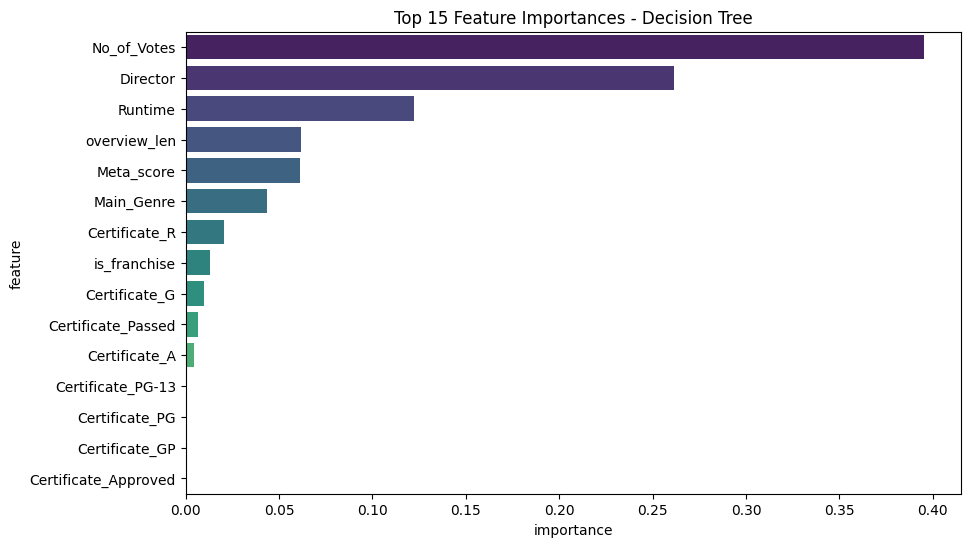

In [153]:
plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=fi_df.head(15), palette="viridis")
plt.title("Top 15 Feature Importances - Decision Tree")
plt.show()

Abaixo deixarei uma tabela com as variáveis mais bem avaliadas pela feature importances.

| Variável      | Tipo inicial | Por que usamos?                                                                                              |
| ------------- | ------------ | ------------------------------------------------------------------------------------------------------------ |
| No\_of\_Votes | Numérica     | Indica popularidade; filmes com mais votos tendem a ter notas um pouco mais altas.                           |
| Director      | Categórica   | Diretores renomados ou consistentes na qualidade dos filmes ajudam a prever melhor o IMDB.                   |
| Runtime       | Numérica     | Filmes dentro de uma duração equilibrada (100–150 min) têm melhor performance de avaliação.                  |
| overview\_len | Numérica     | Tamanho do resumo do filme; pouco efeito direto, mas pode indicar complexidade da história.                  |
| Meta\_score   | Numérica     | Avaliação da crítica; influencia levemente a nota do IMDB, mas não é o fator principal.                      |
| Main\_Genre   | Categórica   | Alguns gêneros, como Drama, Mystery e Film-Noir, apresentam notas médias mais altas e consistentes.          |
| is\_franchise | Booleana     | Franquias podem ter efeito indireto via popularidade                                                  |

## 6.3 - Information Value (IV)

Vamos iniciar transformando o target em binário, pois para IV precisamos de um target binário.

In [154]:
# Criar target binário
y_bin = (y >= 8).astype(int)

Agora iremos calcular o IV para cada variável do nosso dataframe df_transformed. Para isso, vou criar uma função que já funciona para todas as variáveis de uma vez.

In [155]:
def calc_iv_df(df, target, bins=10):
    iv_dict = {}
    
    for col in df.columns:
        x = df[col]
        
        # Se numérico, criar bins
        if np.issubdtype(x.dtype, np.number):
            try:
                x_binned = pd.qcut(x, q=bins, duplicates='drop')
            except:
                x_binned = x  # se não der pra cortar, usar a variável original
        else:
            x_binned = x.astype(str)
        
        # Tabela cruzada
        grouped = pd.crosstab(x_binned, target)
        
        # Adicionar colunas dist_good e dist_bad
        grouped['dist_good'] = grouped.get(1, 0) / grouped.get(1, 0).sum()
        grouped['dist_bad']  = grouped.get(0, 0) / grouped.get(0, 0).sum()
        
        # WOE e IV
        grouped['woe'] = np.log((grouped['dist_good']+1e-6) / (grouped['dist_bad']+1e-6))
        grouped['iv'] = (grouped['dist_good'] - grouped['dist_bad']) * grouped['woe']
        
        iv = grouped['iv'].sum()
        iv_dict[col] = iv
        
    # Retornar DataFrame ordenado
    iv_df = pd.DataFrame.from_dict(iv_dict, orient='index', columns=['IV']).sort_values('IV', ascending=False)
    return iv_df

Agra vamos usar a função

In [156]:
iv_results = calc_iv_df(df_transformed, y_bin)
iv_results.head(15)  # top 15 variáveis por IV

,IV
Director,2.670975
No_of_Votes,0.648582
Meta_score,0.611439
Runtime,0.147136
overview_len,0.073853
Main_Genre,0.060392
Certificate_A,0.000000
Certificate_GP,0.000000
Certificate_PG,0.000000
Certificate_Approved,0.000000


As variáveis que serão usadas segundo o IV estarão listadas abaixo:

| Variável          | Tipo Inicial | Por que usar?                                                                        |
| ----------------- | ------------ | ------------------------------------------------------------------------------------ |
| **Director**      | Categórica   | Diretores de destaque puxam para cima ou para baixo a avaliação dos filmes.          |
| **No\_of\_Votes** | Numérica     | Popularidade do filme (número de votos) está relacionada com notas mais altas.       |
| **Meta\_score**   | Numérica     | Nota dos críticos ajuda a prever a avaliação do público.                             |
| **Runtime**       | Numérica     | Tempo de duração tem efeito médio, mas contribui para o modelo.                      |
| **overview\_len** | Numérica     | Comprimento do resumo pode indicar complexidade da história e atrair público.        |
| **Main\_Genre**   | Categórica   | Captura diferenças de estilo entre filmes; alguns gêneros tendem a notas mais altas. |


## 6.4 - Resumo das variáveis selecionadas

Entre os três métodos, as variáveis que apareceram em comum foram **Runtime, No\_of\_Votes, Meta\_score, Main\_Genre e Director**, aparecendo em EDA, Feature Importances e IV. Algumas variáveis surgiram apenas em análises exploratórias, como **Certificate**, enquanto **overview\_len** se destacou apenas em Feature Importances e IV.


| Variável          | EDA | Feature Importances | IV |
| ----------------- | --- | ------------------- | -- |
| **Runtime**       | X   | X                   | X  |
| **No\_of\_Votes** | X   | X                   | X  |
| **Meta\_score**   | X   | X                   | X  |
| **Main\_Genre**   | X   | X                   | X  |
| **Director**      | X   | X                   | X  |
| **is\_franchise** | X   | X                   |    |
| **Certificate**   | X   |                     |    |
| **overview\_len** |     | X                   | X  |

# 7 - Escolhendo o modelo de Machine learning

Agora vamos comparar o desempenho de quatro modelos de **regressão** na predição das notas do IMDb dos filmes, usando validação cruzada (K-Fold com 5 splits). O que buscamos é verificar qual modelo consegue explicar melhor a variação das notas, fornecendo um **R² médio** como métrica de desempenho, além da dispersão entre os folds.

Os modelos que serão testados testados são:

* **Random Forest Regressor**: ensemble de árvores de decisão, robusto a variáveis não lineares.
* **SVM (SVR)**: Support Vector Regressor, capaz de capturar relações complexas com regularização.
* **Ridge Regression**: regressão linear com penalização L2, útil para reduzir overfitting.
* **Decision Tree Regressor**: árvore de decisão simples, interpretável e fácil de ajustar.

Estamos lidando agora com um problema de **regressão** porque nosso alvo (`y`) é uma variável contínua, a nota do IMDb, e não categorias discretas. Diferente de um problema de classificação, onde preveríamos rótulos como “bom/ruim” ou “alta/baixa nota”, aqui queremos **estimar valores numéricos exatos**, justificando o uso de métricas e modelos específicos para regressão.

Ao fim do nosso código será gerado um gráfico que mostra de forma visual como cada modelo se sai na previsão das notas, facilitando a escolha do melhor algoritmo para o nosso conjunto de dados.

Random Forest: 0.668 (0.045)
SVM: 0.380 (0.040)
Ridge: 0.466 (0.033)
Decision Tree: 0.529 (0.111)


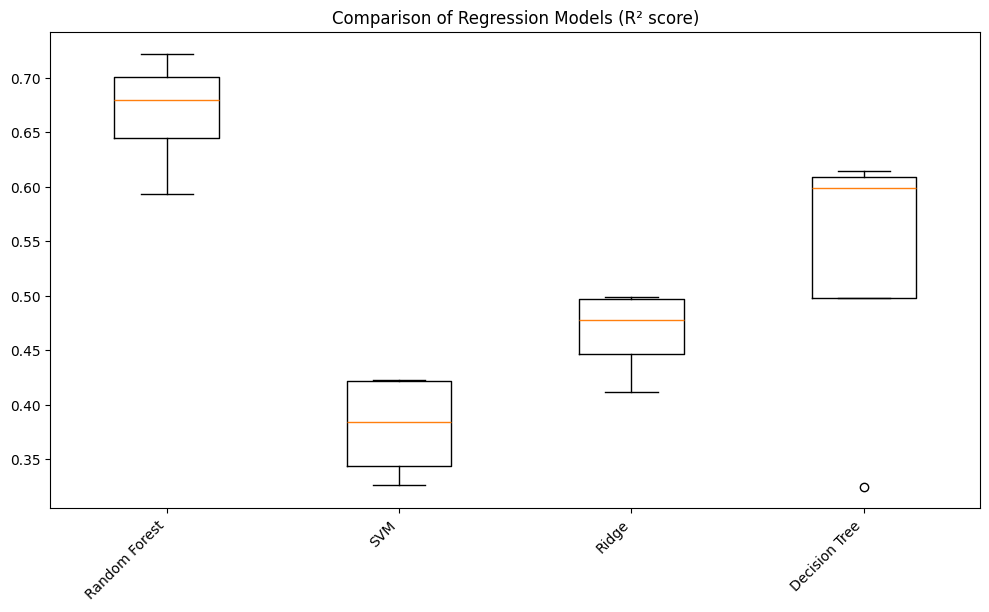

In [157]:
# Modelos de regressão
RF = RandomForestRegressor(random_state=1234, n_estimators=100)
SVM = SVR()  # SVM para regressão
RidgeReg = Ridge(random_state=1234)
DTC = DecisionTreeRegressor(random_state=1234, max_depth=15, min_samples_leaf=5)

models = [RF, SVM, RidgeReg, DTC]
model_names = ["Random Forest", "SVM", "Ridge", "Decision Tree"]

results = []

# K-Fold CV
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

# Treina os modelos
for model in models:
    pipe = Pipeline([('model', model)])
    cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    msg = f"{model_names[models.index(model)]}: {cv_results.mean():.3f} ({cv_results.std():.3f})"
    print(msg)

# Plot comparativo
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(results)
ax.set_xticklabels(model_names)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.title('Comparison of Regression Models (R² score)')
plt.show()

Os resultados nos mostram que a Random Forest foi o modelo que melhor previu as notas do IMDb, explicando cerca de 67% da variação e sendo bem consistente entre os folds. A Decision Tree teve desempenho intermediário, mas é mais instável, indicando que uma árvore sozinha tende a overfitting. A Ridge Regression, modelo linear, foi consistente, mas não capturou toda a complexidade dos dados, e a SVM teve o pior desempenho. No geral, a Random Forest se destaca por conseguir lidar melhor com relações não lineares e interações entre as variáveis, enquanto os modelos lineares ou de árvore simples ficam atrás.

Para o nosso estudo de previsão de notas do IMDb, o modelo Ranodom Forest apresenta vantagens e algumas limitações:

**Prós:**

* **Alta acurácia:** Por combinar muitas árvores, consegue capturar relações não lineares e interações complexas entre variáveis.
* **Robusto a outliers:** Pequenas variações ou erros nos dados têm pouco impacto no modelo final.
* **Mede importância de variáveis:** Permite identificar quais variáveis mais influenciam a predição, útil para interpretação.
* **Pouco overfitting comparado a uma árvore única:** Por agregar várias árvores e usar amostras e features diferentes, reduz a chance de memorizar os dados de treino.

**Contras:**

* **Mais lento para treinar e prever:** Comparado a modelos lineares ou a uma única árvore, exige mais processamento.
* **Menos interpretável:** Embora dê importância das variáveis, o modelo em si é uma “caixa-preta”, difícil de explicar árvore por árvore.
* **Pode exigir ajuste de hiperparâmetros:** Número de árvores, profundidade máxima, tamanho das folhas, etc., precisam ser testados para desempenho ótimo.
* **Não extrapola bem:** Se os dados de teste tiverem valores fora do que o modelo viu no treino, o Random Forest pode não prever corretamente.


| Aspecto            | Prós                                                      | Contras                                                     |
| ------------------ | --------------------------------------------------------- | ----------------------------------------------------------- |
| Acurácia           | Captura relações complexas e não lineares entre variáveis |                                                             |
| Robustez           | Resistente a outliers e ruídos nos dados                  |                                                             |
| Interpretabilidade | Permite avaliar importância das variáveis                 | Difícil de interpretar individualmente (caixa-preta)        |
| Overfitting        | Menor risco que uma árvore única                          |                                                             |
| Desempenho         |                                                           | Treinamento e previsão mais lentos                          |
| Hiperparâmetros    |                                                           | Necessita ajuste de parâmetros para performance ótima       |
| Extrapolação       |                                                           | Não lida bem com valores fora do padrão observado no treino |

# 8 - Testando as variáveis selecionadas pelos três métodos

## 8.1 - Random Forest usando variáveis da EDA

Aqui estamos pegando apenas as colunas que a EDA indicou como relevantes para prever a nota do IMDb.

In [158]:
# Variáveis selecionadas na EDA
features_eda = ["Runtime", "No_of_Votes", "Meta_score", "Main_Genre", "Director", "is_franchise",
                "Certificate_A", "Certificate_Approved", "Certificate_G", "Certificate_GP",
                "Certificate_PG", "Certificate_PG-13", "Certificate_Passed", "Certificate_R",
                "Certificate_U", "Certificate_U/A", "Certificate_UA", "Certificate_Unrated"]

X_eda = df_transformed[features_eda]
y_eda = y  #variável target já definida

Vamos agora fazxer a divisão em treino e teste

In [159]:
X_train_eda, X_test_eda, y_train_eda, y_test_eda = train_test_split(
    X_eda, y_eda, test_size=0.2, random_state=1234)

Vamos agora definir o Random Forest e o grid de parâmetros

In [160]:
rf = RandomForestRegressor(random_state=1234)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'max_features': ['sqrt', 'log2', None]
}

Aqui vamos criar o GridSearchCV

In [161]:
grid_search_eda = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                  # 5-fold cross-validation
    scoring='r2',          # avalia usando R²
    n_jobs=-1,             # usa todos os núcleos do processador
    verbose=2
)

Agora iremos treinar o modelo com GridSearch

In [162]:
grid_search_eda.fit(X_train_eda, y_train_eda)

# Melhor conjunto de parâmetros
print("Melhores parâmetros:", grid_search_eda.best_params_)

# Melhor score no treino (CV)
print("Melhor R² médio (CV):", grid_search_eda.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores parâmetros: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Melhor R² médio (CV): 0.6680986058814573


e agora vamos fazer a avaliação do modelo em nosso conjunto de teste:

In [163]:
# Previsões
y_pred_eda = grid_search_eda.predict(X_test_eda)

# Métricas
r2 = r2_score(y_test_eda, y_pred_eda)
rmse = np.sqrt(mean_squared_error(y_test_eda, y_pred_eda))
mae = mean_absolute_error(y_test_eda, y_pred_eda)
mape = (np.abs((y_test_eda - y_pred_eda) / y_test_eda).mean()) * 100  # em %

print(f"R² no teste: {r2:.3f}")
print(f"RMSE no teste: {rmse:.3f}")
print(f"MAE no teste: {mae:.3f}")
print(f"MAPE no teste: {mape:.2f}%")

R² no teste: 0.729
RMSE no teste: 0.134
MAE no teste: 0.097
MAPE no teste: 1.21%


* **R² = 0.729** → O modelo consegue explicar cerca de 73% da variação das notas do IMDB com as variáveis que escolhemos. É um bom valor, indicando que ele captura bem o padrão geral, mas ainda há 30% da variação que não está sendo explicada.
* **RMSE = 0.134** → Em média, o erro quadrático do modelo é baixo, ou seja, as previsões estão bem próximas dos valores reais.
* **MAE = 0.097** → O erro absoluto médio é pequeno; em média, o modelo erra pouco mais de 0.1 ponto na nota do filme, o que é aceitável considerando a escala do IMDB (0 a 10).
* **MAPE = 1.21%** → O erro percentual médio é bem baixo, mostrando que as previsões do modelo estão muito próximas dos valores reais em termos relativos.

O modelo está indo muito bem com essas variáveis da EDA. Ele consegue capturar a maior parte do padrão das notas, erra pouco em média e tem um desempenho consistente. Ainda existem fatores que ele não explica, mas para um modelo inicial, esses resultados são sólidos.


| Método de seleção          | R²    | RMSE  | MAE   | MAPE  | Observação/Comentário                                    |
| -------------------------- | ----- | ----- | ----- | ----- | -------------------------------------------------------- |
| **EDA**                    | 0.729 | 0.134 | 0.097 | 1.21% | Resultados obtidos com as variáveis selecionadas via EDA |
| **Feature Importances**    |       |       |       |       |                                                          |
| **IV (Information Value)** |       |       |       |       |                                                          |
| **Melhor resultado**       | 0.729 | 0.134 | 0.097 | 1.21% | Até agora, melhor resultado obtido com EDA               |


## 8.2 - Random Forest usando variáveis da Feature importances

Escolhemos agora apenas as variáveis destacadas pelo método Feature Importances.

In [164]:
features_fi = ["No_of_Votes", "Director", "Runtime", "overview_len", "Meta_score", "Main_Genre", "is_franchise"]
X_fi = df_transformed[features_fi]
y_fi = y  # target já definida

Agora separamos os dados em treino e teste, 80% treino e 20% teste para avaliar o modelo de forma justa

In [165]:
X_train_fi, X_test_fi, y_train_fi, y_test_fi = train_test_split(
    X_fi, y_fi, test_size=0.2, random_state=1234
)

Vamos definir o modelo e os hiperparâmetros (Grid Search), e criando uma Random Forest, onde iremos testar combinações de hiperparâmetros em busca de encontrar a melhor configuração usando 5-fold cross-validation.

In [166]:
rf = RandomForestRegressor(random_state=1234)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'max_features': ['sqrt', 'log2', None]
}

grid_search_fi = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)

Aqui iremos treinar o modelo com todas as combinações do Grid Search, onde ele vai selecionar automaticamente os melhores hiperparâmetros.

In [167]:
grid_search_fi.fit(X_train_fi, y_train_fi)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1234),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

vamos Ffzer previsões no conjunto de teste, usando o modelo treinado para prever as notas no conjunto de teste.

In [168]:
y_pred_fi = grid_search_fi.predict(X_test_fi)

Calcularemos as métricas de desempenho

In [169]:
r2 = r2_score(y_test_fi, y_pred_fi)
rmse = np.sqrt(mean_squared_error(y_test_fi, y_pred_fi))
mae = mean_absolute_error(y_test_fi, y_pred_fi)
mape = np.mean(np.abs((y_test_fi - y_pred_fi) / y_test_fi)) * 100

print(f"R² no teste: {r2:.3f}")
print(f"RMSE no teste: {rmse:.3f}")
print(f"MAE no teste: {mae:.3f}")
print(f"MAPE no teste: {mape:.2f}%")

R² no teste: 0.728
RMSE no teste: 0.134
MAE no teste: 0.099
MAPE no teste: 1.23%


| Método de seleção          | R²    | RMSE  | MAE   | MAPE  | Observação/Comentário                                                      |
| -------------------------- | ----- | ----- | ----- | ----- | -------------------------------------------------------------------------- |
| **EDA**                    | 0.729 | 0.134 | 0.097 | 1.21% | Resultados obtidos com as variáveis selecionadas via EDA                   |
| **Feature Importances**    | 0.728 | 0.134 | 0.099 | 1.23% | Desempenho próximo ao da EDA, variáveis importantes do modelo foram usadas |
| **IV (Information Value)** |       |       |       |       | Ainda não aplicado                    |
| **Melhor resultado**       | 0.728 | 0.134 | 0.097 | 1.21% | Até agora, melhor resultado obtido com EDA                                 |

## 8.3 - Random Forest usando variáveis da IV

Vamos dfinir as variáveis selecionadas pelo IV, então vamos criar um DataFrame X_iv apenas com essas colunas:

In [170]:
# Selecionando variáveis de IV
iv_features = ["Director", "No_of_Votes", "Meta_score", "Runtime", "overview_len", "Main_Genre"]
X_iv = df_transformed[iv_features]
y_iv = y  # variável target já definida

Vamos dividir em treino e teste, usamos o mesmo split 80/20 que antes

In [171]:
X_train_iv, X_test_iv, y_train_iv, y_test_iv = train_test_split(
    X_iv, y_iv, test_size=0.2, random_state=1234
)

Agora vamos criar o pipeline com Random Forest, como nos casos anteriores, vamos usar GridSearchCV para ajustar hiperparâmetros

In [172]:
rf = RandomForestRegressor(random_state=1234)

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 15, 20],
    'model__min_samples_split': [5, 10],
    'model__min_samples_leaf': [2, 5],
    'model__max_features': ['sqrt', 'log2', None]
}

pipe_iv = Pipeline([
    ('model', rf)
])

grid_search_iv = GridSearchCV(
    pipe_iv, param_grid, cv=5, scoring='r2', n_jobs=-1
)

# Treino do modelo
grid_search_iv.fit(X_train_iv, y_train_iv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestRegressor(random_state=1234))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 15, 20],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__min_samples_leaf': [2, 5],
                         'model__min_samples_split': [5, 10],
                         'model__n_estimators': [100, 200, 300]},
             scoring='r2')

Agora vamos avaliar o modelo depois de treinado, avaliamos usando as métricas que já usamos: R², RMSE, MAE, MAPE.

In [173]:
# Previsões
y_pred_iv = grid_search_iv.predict(X_test_iv)

# Métricas
r2_iv = r2_score(y_test_iv, y_pred_iv)
rmse_iv = np.sqrt(mean_squared_error(y_test_iv, y_pred_iv))
mae_iv = mean_absolute_error(y_test_iv, y_pred_iv)
mape_iv = np.mean(np.abs((y_test_iv - y_pred_iv) / y_test_iv)) * 100

print(f"R² no teste: {r2_iv:.3f}")
print(f"RMSE no teste: {rmse_iv:.3f}")
print(f"MAE no teste: {mae_iv:.3f}")
print(f"MAPE no teste: {mape_iv:.2f}%")

R² no teste: 0.724
RMSE no teste: 0.135
MAE no teste: 0.099
MAPE no teste: 1.23%


| Método de seleção          | R²    | RMSE  | MAE   | MAPE  | Observação/Comentário                                                                            |
| -------------------------- | ----- | ----- | ----- | ----- | ------------------------------------------------------------------------------------------------ |
| **EDA**                    | 0.729 | 0.134 | 0.097 | 1.21% | Resultados obtidos com as variáveis selecionadas via EDA                                         |
| **Feature Importances**    | 0.728 | 0.134 | 0.099 | 1.23% | Desempenho próximo ao da EDA, variáveis importantes do modelo foram usadas                       |
| **IV (Information Value)** | 0.724 | 0.135 | 0.099 | 1.23% | Bom desempenho, quase igual ao da EDA, variáveis escolhidas via IV se mostraram muito relevantes |
| **Melhor resultado**       | 0.729 | 0.134 | 0.097 | 1.21% | Até agora, melhor resultado obtido com EDA                                                       |


## 8.4 - Conclusões

A partir dessa tabela, podemos tirar algumas conclusões importantes sobre o impacto da seleção de variáveis no desempenho do modelo de regressão:

1. **Todas as abordagens funcionam bem**: Tanto as variáveis escolhidas pela EDA, pelo Feature Importances quanto pelo IV resultaram em modelos com **R² alto (acima de 0.72)** e erros relativamente baixos, mostrando que há boas variáveis preditoras no conjunto de dados.

2. **EDA ainda leva vantagem**: A seleção baseada na análise exploratória (EDA) entregou o **melhor desempenho geral**, com R² ligeiramente maior (0.729) e os menores RMSE e MAE. Isso indica que o conhecimento prévio sobre o comportamento das variáveis ajuda bastante na escolha das features certas.

3. **Feature Importances e IV são competitivos**: O método de Feature Importances ficou praticamente empatado com a EDA, perdendo apenas 0.001 no R². O IV também teve resultado próximo, o que mostra que métricas de importância e poder preditivo das variáveis podem guiar escolhas eficazes.

4. **Diferenças sutis**: Os erros (RMSE, MAE e MAPE) mostram diferenças muito pequenas entre os métodos. Ou seja, embora a EDA tenha uma ligeira vantagem, **todos os métodos geram modelos sólidos**.

5. **Decisão prática**: Para futuros projetos, podemos optar por EDA quando houver tempo e contexto, ou usar Feature Importances/IV para automação, pois ambos produzem resultados quase equivalentes.

Uma boa dica é usar o MLflow, que é uma ferramenta para acompanhar e gerenciar experimentos de Machine Learning. Ele registra modelos, métricas, parâmetros e resultados automaticamente, facilitando comparar diferentes testes. Aqui, como só testamos três modelos, decidi criar tabelas para organizar os resultados e poupar tempo. Mas se tivéssemos muitos modelos, parâmetros ou datasets, o MLflow seria a escolha certa, porque automatiza todo o acompanhamento, mostra relatórios claros e ajuda a achar rapidamente o melhor modelo. Além disso, ele ainda facilita levar os modelos do experimento para produção de forma organizada.

Para concluir, vamos adotar o **Random Forest** com as variáveis selecionadas pela **EDA** como nosso modelo principal. Porém, vale destacar que **qualquer uma das outras seleções de variáveis também entregaria um bom desempenho**, então estaríamos bem servidos com qualquer escolha.


# 9 - Predição da nota IMDB do desafio

Aqui iremos criar um novo Dataframe com as informações do desafio.

In [174]:
# Dicionário com as informações do filme
data = {
    'Series_Title': ['The Shawshank Redemption'],
    'Released_Year': ['1994'],
    'Certificate': ['A'],
    'Runtime': ['142 min'],
    'Genre': ['Drama'],
    'Overview': ['Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'],
    'Meta_score': [80.0],
    'Director': ['Frank Darabont'],
    'Star1': ['Tim Robbins'],
    'Star2': ['Morgan Freeman'],
    'Star3': ['Bob Gunton'],
    'Star4': ['William Sadler'],
    'No_of_Votes': [2343110],
    'Gross': ['28,341,469']
}

# Criando o DataFrame
df_desafio = pd.DataFrame(data)

In [175]:
df_desafio

,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


Calculando o tamanho do overview

In [176]:
df_desafio["overview_len"] = df_desafio["Overview"].fillna("").apply(len)

Agora iremos filtrar apenas as variáveis selecionadas na etapa de EDA, que serão usadas no modelo de Machine Learning.

In [177]:
# Selecionando apenas as colunas desejadas
cols = ["Runtime", "No_of_Votes", "Meta_score", "Genre", 
        "Director" , "Certificate", "overview_len"]

df_desafio = df_desafio[cols]

Como no filme temos apenas um gênero, ele será o genero principal, e será adicionada a variavel para saber se o filme é de franquia ou não, como não se trata de uma franquia, será 0. e transformaremos a variavel Runtime para int.

In [178]:
# Renomeando a coluna "Genre" para "Main_Genre"
df_desafio = df_desafio.rename(columns={'Genre': 'Main_Genre'})

# Adicionando a coluna "is_franchise" com valor 0, por o filme não se tratar de uma franquia
df_desafio['is_franchise'] = 0

# Remover o " min" e converter para inteiro
df_desafio["Runtime"] = df_desafio["Runtime"].str.replace(" min", "").astype(int)

In [179]:
df_desafio

,Runtime,No_of_Votes,Meta_score,Main_Genre,Director,Certificate,overview_len,is_franchise
0,142,2343110,80.0,Drama,Frank Darabont,A,118,0


Vamos agora aplicar o processamento das variáveis do desafio, para fazer a aplicação no nosso modelo treinado de Machine Learning

In [180]:
df_desafio_transformed = preprocessor.transform(df_desafio)

Aqui estamos retornando o vetor em dataframe.

In [181]:
# Nomes das colunas numéricas
num_cols = ["Runtime", "Meta_score", "No_of_Votes", "overview_len"]

# Nomes das colunas OneHotEncoder
ohe_cols = preprocessor.named_transformers_["cat_ohe"].get_feature_names_out(["Certificate"])

# TargetEncoder mantém os nomes originais
te_cols = ["Director", "Main_Genre"]

# Booleana
bool_cols = ["is_franchise"]

# Todos juntos
all_cols = list(num_cols) + list(ohe_cols) + list(te_cols) + bool_cols

# Criar DataFrame final
df_desafio_transformed = pd.DataFrame(df_desafio_transformed, columns=all_cols)

In [182]:
df_desafio_transformed

,Runtime,Meta_score,No_of_Votes,overview_len,Certificate_A,Certificate_Approved,Certificate_G,Certificate_GP,Certificate_PG,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated,Director,Main_Genre,is_franchise
0,0.655667,0.214154,2.320744,-0.602906,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.025431,7.927189,0.0


Agora estamos selecionando as variáveis para nosso modelo.

In [183]:
features_desafio = ["Runtime", "No_of_Votes", "Meta_score", "Main_Genre", "Director", "is_franchise",
                    "Certificate_A", "Certificate_Approved", "Certificate_G", "Certificate_GP",
                    "Certificate_PG", "Certificate_PG-13", "Certificate_Passed", "Certificate_R",
                    "Certificate_U", "Certificate_U/A", "Certificate_UA", "Certificate_Unrated"]

X_desafio = df_desafio_transformed[features_desafio]

Fazendo a predição

In [184]:
y_pred_desafio = grid_search_eda.predict(X_desafio)

In [185]:
y_pred_desafio

array([8.71217704])

A nota IMDB para esse filme, segundo o nosso modelo é 8.7.

# 10 - Salvando o modelo usado em pkl

In [186]:
import joblib

# Salvando o melhor modelo encontrado no GridSearch para as variáveis da EDA
joblib.dump(grid_search_eda.best_estimator_, "modelo_rf_eda.pkl")

print("Modelo salvo com sucesso em modelo_rf_eda.pkl")

Modelo salvo com sucesso em modelo_rf_eda.pkl


Para carregar o modelo salvo depois

```python
# Carregar o modelo salvo
modelo_carregado = joblib.load("modelo_rf_eda.pkl")

# Fazer previsão com novos dados
y_pred = modelo_carregado.predict(novo_dado)
print(f"Predição da nota IMDB: {y_pred[0]:.2f}")

In [187]:
# Gerando um arquivo requirements.txt com todas as versões dos pacotes
!python -m pip freeze > requirements.txt